# Import neccessary libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read Data Using Pandas

In [25]:
core_data = pd.read_excel(r"C:\Users\OMO_MUSHIN\Documents\Volve-Core_Data_2.xlsx", na_values=' ')
core_data.head()

,CORE_NO,Sample,Depth,CKGH,INV_PMH,CKH,CKGV,INV_PMV,CKV,CPOR,CPOR_VERT,SUM_POR,So,Sw,RHOD,GRAIN_RHO,Lithological description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,3837.00,13.8,0.662,11.5,,,,17,,,,,2.66,,Sst.lt-Brn.M-gr.Ang.W-cmt.Fr-srt.mtrx.frac.w/M...
3,1.0,2.0,3837.25,NaN,,NaN,,,,14.8,,,,,2.67,,"A.A.fis.Cl/Mic-lam.w/o frac.w/Dol,Sid,Cl."
4,1.0,3.0,3837.55,25.2,0.746,21.4,3.94,0.495,3.16,10.8,,,,,2.69,,A.A.VW-cmt.w/o fis.Cl/Mic-lam.incr Dol.


# Drop Irrelevant rows and columns

In [26]:
indexes_to_drop =[0, 1]

core_data.drop(index=indexes_to_drop, inplace=True)
core_data.drop(['Lithological description', 'CORE_NO', 'Sample', 'INV_PMH',\
                'INV_PMV','CKGV','CKGH', 'CKV', 'CPOR_VERT', 'SUM_POR', 'GRAIN_RHO',\
               'So', 'Sw'], axis=1, inplace=True)
core_data.reset_index()

core_data.head()


,Depth,CKH,CPOR,RHOD
2,3837.00,11.5,17,2.66
3,3837.25,NaN,14.8,2.67
4,3837.55,21.4,10.8,2.69
5,3837.80,0.694,12.8,2.7
6,3837.88,,,


# Exploratory Data Analysis

In [27]:
core_data

,Depth,CKH,CPOR,RHOD
2,3837.00,11.5,17,2.66
3,3837.25,NaN,14.8,2.67
4,3837.55,21.4,10.8,2.69
5,3837.80,0.694,12.8,2.7
6,3837.88,,,
...,...,...,...,...
725,3998.85,4850,28.9,2.65
726,3999.00,3350,20.7,2.66
727,3999.25,3490,20.9,2.64
728,3999.50,163,17.3,2.64


In [34]:
core_data.dropna()


,Depth,CKH,CPOR,RHOD
2,3837.00,11.5,17,2.66
4,3837.55,21.4,10.8,2.69
5,3837.80,0.694,12.8,2.7
6,3837.88,,,
7,3838.00,491,16.4,2.69
...,...,...,...,...
725,3998.85,4850,28.9,2.65
726,3999.00,3350,20.7,2.66
727,3999.25,3490,20.9,2.64
728,3999.50,163,17.3,2.64


In [35]:
core_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,728.0,3920.153338,46.902816,3837.0,3881.98,3921.125,3960.4875,3999.75


In [36]:
# core_data.corr()
core_data[:5]

,Depth,CKH,CPOR,RHOD
2,3837.00,11.5,17,2.66
3,3837.25,NaN,14.8,2.67
4,3837.55,21.4,10.8,2.69
5,3837.80,0.694,12.8,2.7
6,3837.88,,,


In [37]:
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 2 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   728 non-null    float64
 1   CKH     691 non-null    object 
 2   CPOR    727 non-null    object 
 3   RHOD    728 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.9+ KB


In [39]:
core_data = core_data.apply(pd.to_numeric, errors='coerce')


# core_data['Sw'].fillna(method='bfill', inplace=True)
# core_data['So'].fillna(method='bfill', inplace=True)

core_data = core_data.dropna()


core_data.info()

core_data.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 2 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   557 non-null    float64
 1   CKH     557 non-null    float64
 2   CPOR    557 non-null    float64
 3   RHOD    557 non-null    float64
dtypes: float64(4)
memory usage: 21.8 KB


,Depth,CKH,CPOR,RHOD
Depth,1.000000,-0.226088,-0.392780,0.020786
CKH,-0.226088,1.000000,0.308584,-0.068682
CPOR,-0.392780,0.308584,1.000000,-0.290100
RHOD,0.020786,-0.068682,-0.290100,1.000000


# Applying a multiple regression fit to CPOR and CKH (uncleaned Data)

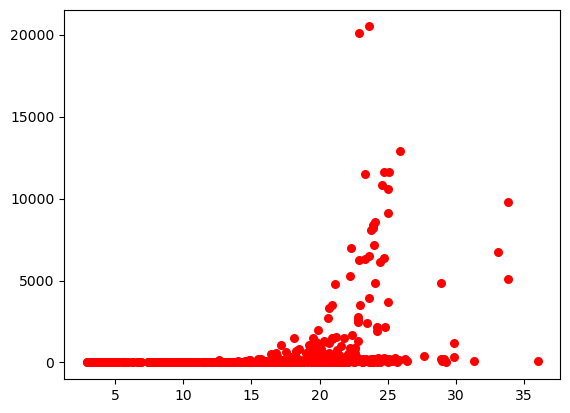

In [40]:
plt.scatter(core_data['CPOR'], core_data['CKH'], c='red', s=30)
plt.show()

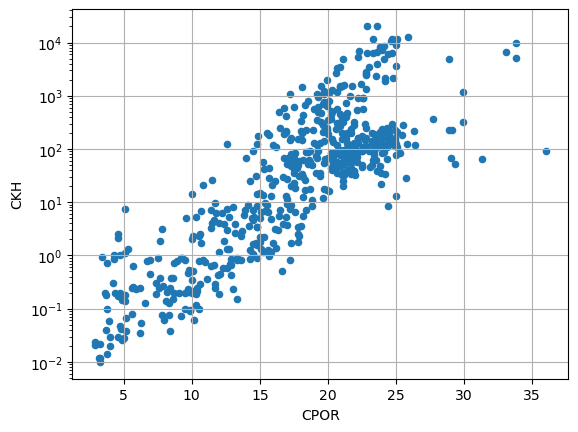

In [41]:
core_data.plot(kind="scatter", x="CPOR", y="CKH")
plt.yscale('log')
plt.grid(True)

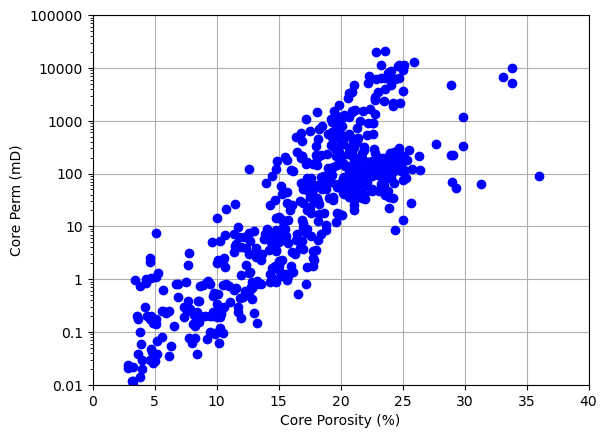

In [42]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 40, 0.01, 100000])
ax.plot(core_data['CPOR'], core_data['CKH'][core_data['CKH'] > 0], 'bo')
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
    
plt.grid(True)

plt.show()


In [43]:
poro_perm = core_data[['CPOR', 'CKH']].copy()

poro_perm.dropna(inplace=True)

poro_perm_polyfit = np.polyfit(core_data['CPOR'], np.log10(core_data['CKH']), 1)

In [44]:
import statsmodels.api as sm

x = core_data['CPOR']
x = sm.add_constant(x)
y = np.log(core_data['CKH'])



In [45]:
model = sm.OLS(y, x, missing='drop')
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CKH   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1362.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          1.72e-151
Time:                        13:49:27   Log-Likelihood:                -1088.2
No. Observations:                 557   AIC:                             2180.
Df Residuals:                     555   BIC:                             2189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1249      0.210    -19.641      0.000      -4.537      -3.712
CPOR           0.4214      0.011     36.901      0.000       0.399       0.444
==============================================================================
Omnibus:                        5.570   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.596
Skew:                           0.223   Prob(JB):                       0.0609
Kurtosis:                       2.793   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

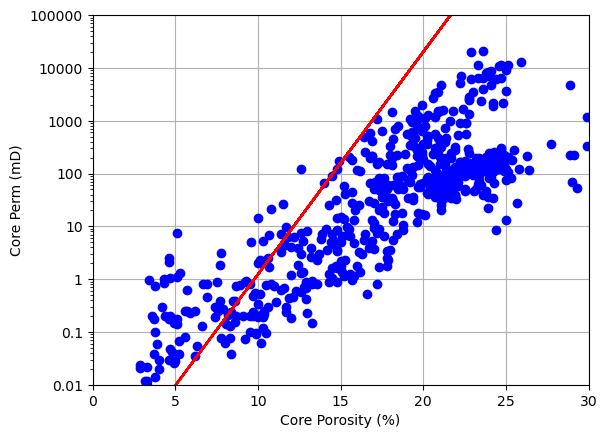

In [46]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 30, 0.01, 100000])
ax.semilogy(core_data['CPOR'], core_data['CKH'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['CPOR'], 10**(results.params[1] * core_data['CPOR'] + results.params[0]), 'r-')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
    
plt.grid(True)

plt.show()

In [47]:
results.params[1]

0.4213727845571487

# Data Pre-Processing

In [48]:
core_data.head(20)

,Depth,CKH,CPOR,RHOD
2,3837.00,11.500,17.0,2.66
4,3837.55,21.400,10.8,2.69
5,3837.80,0.694,12.8,2.70
7,3838.00,491.000,16.4,2.69
8,3838.25,253.000,16.5,2.66
9,3838.50,1080.000,17.2,2.66
10,3838.75,412.000,16.9,2.66
12,3839.00,16.300,20.1,2.66
13,3839.20,0.189,10.3,2.93
14,3839.40,5.360,12.7,3.03


Observation of Data Skewness

In [49]:
core_data_skewed = core_data.skew(numeric_only=True)
core_data_skewed

Depth   -0.053632
CKH      5.419010
CPOR    -0.438877
RHOD     2.561817
dtype: float64

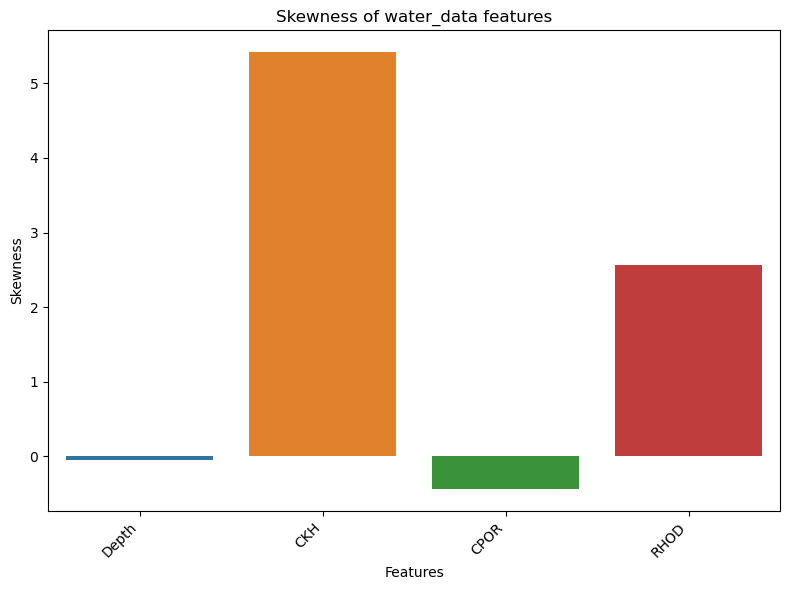

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x=core_data_skewed.index, y=core_data_skewed)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of water_data features')
plt.tight_layout()
plt.show()

# Outliers Detection and Removal

In [51]:
 for feature in core_data.columns.values:
    Q1 = core_data[feature].quantile(0.25)
    
    Q3 = core_data[feature].quantile(0.75)
    
    IQR = Q3- Q1
    
    step = 1.5 * IQR
    
    outliers = core_data[(core_data[feature] < Q1 - step) | (core_data[feature] > Q3 + step)]
display(outliers)    
good_data = core_data.drop(outliers.index)


,Depth,CKH,CPOR,RHOD
5,3837.80,0.694,12.8,2.70
13,3839.20,0.189,10.3,2.93
14,3839.40,5.360,12.7,3.03
17,3840.00,0.092,9.9,2.91
48,3846.25,0.725,8.7,2.71
...,...,...,...,...
669,3987.00,0.233,5.9,2.73
678,3988.75,6.840,10.7,2.71
688,3991.00,0.039,3.7,2.73
689,3991.25,0.024,2.9,2.74


In [52]:
good_data

,Depth,CKH,CPOR,RHOD
2,3837.00,11.5,17.0,2.66
4,3837.55,21.4,10.8,2.69
7,3838.00,491.0,16.4,2.69
8,3838.25,253.0,16.5,2.66
9,3838.50,1080.0,17.2,2.66
...,...,...,...,...
725,3998.85,4850.0,28.9,2.65
726,3999.00,3350.0,20.7,2.66
727,3999.25,3490.0,20.9,2.64
728,3999.50,163.0,17.3,2.64


In [53]:
core_data = good_data

# Feature Scaling

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(core_data)


scale = StandardScaler()

X = df[['CPOR',  'RHOD']]
y = df['CKH']

X_scaled = scale.fit_transform(X)

X = pd.DataFrame(X_scaled)
X.columns = ['CPOR', "RHOD"]
X

,CPOR,RHOD
0,-0.233762,0.707900
1,-1.319266,2.528214
2,-0.338811,2.528214
3,-0.321303,0.707900
4,-0.198746,0.707900
...,...,...
487,1.849706,0.101129
488,0.414039,0.707900
489,0.449055,-0.505643
490,-0.181238,-0.505643


# Model Selection

Fitting and Visualizing a Linear regression model on the data

Coefficients: [557.20581279  22.78364557]
Intercept: 597.1019929861998


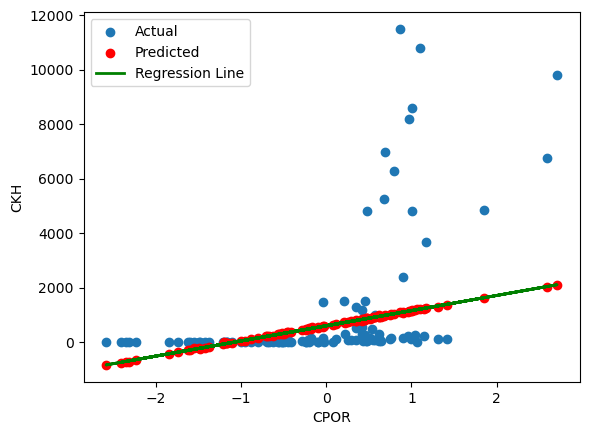

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.scatter(X_test['CPOR'], y_pred, label='Predicted', color='red')
plt.plot(X_test['CPOR'], intercept + coefficients[0] * X_test['CPOR'], color='green', linewidth=2, label='Regression Line')
plt.xlabel('CPOR')
plt.ylabel('CKH')

# plt.yscale('log')
plt.legend()
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

5513958.658215354


2348.18199001171

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.1329963968775092

In [58]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

mae

1212.7376146740644

# Fitting and Visualizing A multiple regression  model on the data

Coefficients: [   0.         1289.95468497  101.8529629   682.51402802  -15.6775238
 -359.71567975  -95.56265574  -28.17400431 -447.44446971  -89.36000723
  -77.03733099  -41.74337712 -107.4034749   107.28172319   83.28534367]
Intercept: 392.40417416605123


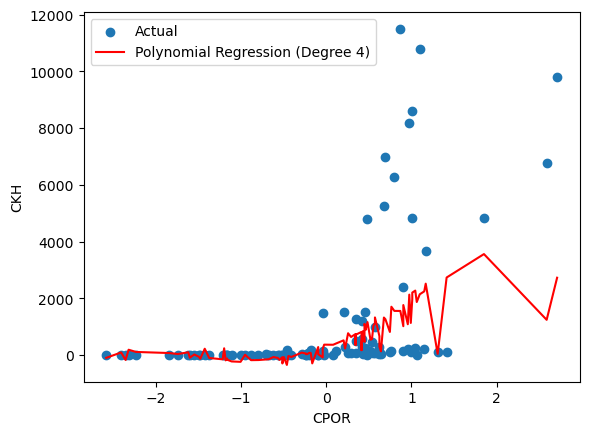

In [59]:

df = pd.DataFrame(core_data)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Polynomial Regression with degree 2
degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
X_test_sorted = X_test.sort_values(by='CPOR')  # Sort for better visualization
y_pred_poly = model.predict(poly.transform(X_test_sorted))
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.plot(X_test_sorted['CPOR'], y_pred_poly, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('CPOR')
plt.ylabel('CKH')
# plt.yscale('log')
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.25848592465265896

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

mae

1057.837233693732

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

4715871.930894816


2171.60584151333

In [63]:
# core_data['CKH'].mean()

# Using TensorFlow

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

from tensorflow.keras.layers import Dense

Model 1

In [65]:
from keras.optimizers import Adam


model = keras.Sequential([
    Dense(200, activation='relu', input_shape=(2,)),
    Dense(150, activation='relu'),
    Dense(75, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='relu')
], name="my_model")

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
epochs = 50  # You can adjust the number of epochs
batch_size = 32  # You can adjust the batch size
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# You can also make predictions using the trained model
predictions = model.predict(X_test)




Epoch 1/50


12/12 [==============================] - 4s 42ms/step - loss: 5218042.0000 - accuracy: 0.0000e+00 - val_loss: 2921316.5000 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 5215911.0000 - accuracy: 0.0000e+00 - val_loss: 2917638.2500 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 5208868.0000 - accuracy: 0.0000e+00 - val_loss: 2905996.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 5194029.5000 - accuracy: 0.0000e+00 - val_loss: 2881097.2500 - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 5155800.5000 - accuracy: 0.0000e+00 - val_loss: 2830790.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 5081281.0000 - accuracy: 0.0000e+00 - val_loss: 2715725.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
12/12 [============

12/12 [==============================] - 0s 8ms/step - loss: 4312691.5000 - accuracy: 0.0000e+00 - val_loss: 2403613.5000 - val_accuracy: 0.0000e+00
Epoch 47/50
12/12 [==============================] - 0s 8ms/step - loss: 4309160.0000 - accuracy: 0.0000e+00 - val_loss: 2405056.2500 - val_accuracy: 0.0000e+00
Epoch 48/50
12/12 [==============================] - 0s 8ms/step - loss: 4321359.0000 - accuracy: 0.0000e+00 - val_loss: 2386694.5000 - val_accuracy: 0.0000e+00
Epoch 49/50
12/12 [==============================] - 0s 8ms/step - loss: 4310912.5000 - accuracy: 0.0000e+00 - val_loss: 2394715.7500 - val_accuracy: 0.0000e+00
Epoch 50/50
4/4 [==============================] - 0s 4ms/step - loss: 4792648.0000 - accuracy: 0.0000e+00
Test Loss: 4792648.0, Test MAE: 0.0
4/4 [==============================] - 0s 3ms/step


Model 2

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)

print(f'Test MAE (Random Forest): {mae_rf}')
print(f'Test MSE (Random Forest): {mse_rf}')


Test MAE (Random Forest): 1020.6764432587419
Test MSE (Random Forest): 5472531.908003934


In [67]:
r_squared = r2_score(y_test, rf_predictions)
print(f'R-squared (Random Forest): {r_squared}')

R-squared (Random Forest): 0.13951025451143317


# Model 3

In [68]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)


model = keras.Sequential([
    tf.keras.Input(shape=(2, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer = regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=100, verbose=2)

model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)



print('Done')

Epoch 1/100
40/40 - 2s - loss: 4980043.5000 - mae: 604.5561 - 2s/epoch - 43ms/step
Epoch 2/100
40/40 - 0s - loss: 4939828.0000 - mae: 589.5344 - 159ms/epoch - 4ms/step
Epoch 3/100
40/40 - 0s - loss: 4764449.5000 - mae: 589.7141 - 155ms/epoch - 4ms/step
Epoch 4/100
40/40 - 0s - loss: 4471757.0000 - mae: 709.9138 - 153ms/epoch - 4ms/step
Epoch 5/100
40/40 - 0s - loss: 4337747.5000 - mae: 824.7930 - 154ms/epoch - 4ms/step
Epoch 6/100
40/40 - 0s - loss: 4304462.0000 - mae: 822.3719 - 152ms/epoch - 4ms/step
Epoch 7/100
40/40 - 0s - loss: 4300994.5000 - mae: 890.9493 - 151ms/epoch - 4ms/step
Epoch 8/100
40/40 - 0s - loss: 4266732.0000 - mae: 858.7691 - 152ms/epoch - 4ms/step
Epoch 9/100
40/40 - 0s - loss: 4265519.5000 - mae: 856.6050 - 152ms/epoch - 4ms/step
Epoch 10/100
40/40 - 0s - loss: 4260609.0000 - mae: 831.6777 - 154ms/epoch - 4ms/step
Epoch 11/100
40/40 - 0s - loss: 4239770.5000 - mae: 846.8528 - 151ms/epoch - 4ms/step
Epoch 12/100
40/40 - 0s - loss: 4257534.0000 - mae: 806.1254 - 15

Epoch 97/100
40/40 - 0s - loss: 3976770.7500 - mae: 751.7488 - 152ms/epoch - 4ms/step
Epoch 98/100
40/40 - 0s - loss: 3986794.2500 - mae: 756.5458 - 153ms/epoch - 4ms/step
Epoch 99/100
40/40 - 0s - loss: 3974324.5000 - mae: 800.0862 - 152ms/epoch - 4ms/step
Epoch 100/100
40/40 - 0s - loss: 3959218.2500 - mae: 752.4915 - 154ms/epoch - 4ms/step
10/10 - 0s - loss: 4454223.0000 - mae: 919.8826 - 242ms/epoch - 24ms/step
Done


Model 4

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error


target_range = y_train.max() - y_train.min()


y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range


norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=20, epochs=500, verbose=2)

# Evaluate the model
predictions_normalized = model.predict(Xn_test)
predictions = predictions_normalized * target_range + y_train.min()

mae_percentage = mean_absolute_error(y_test, predictions) / target_range * 100

print(f'Mean Absolute Error Percentage: {mae_percentage}%')
print(f'Target range: : {target_range}')

Epoch 1/500
20/20 - 2s - loss: 3.5491 - mae: 0.0298 - 2s/epoch - 76ms/step
Epoch 2/500
20/20 - 0s - loss: 3.3192 - mae: 0.0345 - 95ms/epoch - 5ms/step
Epoch 3/500
20/20 - 0s - loss: 3.1038 - mae: 0.0361 - 87ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 2.9019 - mae: 0.0388 - 86ms/epoch - 4ms/step
Epoch 5/500
20/20 - 0s - loss: 2.7128 - mae: 0.0350 - 89ms/epoch - 4ms/step
Epoch 6/500
20/20 - 0s - loss: 2.5352 - mae: 0.0400 - 86ms/epoch - 4ms/step
Epoch 7/500
20/20 - 0s - loss: 2.3688 - mae: 0.0384 - 84ms/epoch - 4ms/step
Epoch 8/500
20/20 - 0s - loss: 2.2127 - mae: 0.0392 - 86ms/epoch - 4ms/step
Epoch 9/500
20/20 - 0s - loss: 2.0661 - mae: 0.0379 - 84ms/epoch - 4ms/step
Epoch 10/500
20/20 - 0s - loss: 1.9285 - mae: 0.0369 - 84ms/epoch - 4ms/step
Epoch 11/500
20/20 - 0s - loss: 1.7994 - mae: 0.0369 - 87ms/epoch - 4ms/step
Epoch 12/500
20/20 - 0s - loss: 1.6783 - mae: 0.0389 - 85ms/epoch - 4ms/step
Epoch 13/500
20/20 - 0s - loss: 1.5647 - mae: 0.0365 - 85ms/epoch - 4ms/step
Epoch 14/

Epoch 108/500
20/20 - 0s - loss: 0.0116 - mae: 0.0437 - 85ms/epoch - 4ms/step
Epoch 109/500
20/20 - 0s - loss: 0.0116 - mae: 0.0453 - 84ms/epoch - 4ms/step
Epoch 110/500
20/20 - 0s - loss: 0.0115 - mae: 0.0437 - 87ms/epoch - 4ms/step
Epoch 111/500
20/20 - 0s - loss: 0.0115 - mae: 0.0434 - 84ms/epoch - 4ms/step
Epoch 112/500
20/20 - 0s - loss: 0.0114 - mae: 0.0446 - 84ms/epoch - 4ms/step
Epoch 113/500
20/20 - 0s - loss: 0.0114 - mae: 0.0440 - 83ms/epoch - 4ms/step
Epoch 114/500
20/20 - 0s - loss: 0.0114 - mae: 0.0440 - 84ms/epoch - 4ms/step
Epoch 115/500
20/20 - 0s - loss: 0.0113 - mae: 0.0430 - 84ms/epoch - 4ms/step
Epoch 116/500
20/20 - 0s - loss: 0.0113 - mae: 0.0435 - 84ms/epoch - 4ms/step
Epoch 117/500
20/20 - 0s - loss: 0.0113 - mae: 0.0442 - 84ms/epoch - 4ms/step
Epoch 118/500
20/20 - 0s - loss: 0.0112 - mae: 0.0439 - 84ms/epoch - 4ms/step
Epoch 119/500
20/20 - 0s - loss: 0.0112 - mae: 0.0440 - 85ms/epoch - 4ms/step
Epoch 120/500
20/20 - 0s - loss: 0.0112 - mae: 0.0453 - 88ms/epo

20/20 - 0s - loss: 0.0110 - mae: 0.0438 - 84ms/epoch - 4ms/step
Epoch 214/500
20/20 - 0s - loss: 0.0110 - mae: 0.0431 - 84ms/epoch - 4ms/step
Epoch 215/500
20/20 - 0s - loss: 0.0110 - mae: 0.0443 - 85ms/epoch - 4ms/step
Epoch 216/500
20/20 - 0s - loss: 0.0110 - mae: 0.0438 - 83ms/epoch - 4ms/step
Epoch 217/500
20/20 - 0s - loss: 0.0110 - mae: 0.0441 - 85ms/epoch - 4ms/step
Epoch 218/500
20/20 - 0s - loss: 0.0110 - mae: 0.0441 - 84ms/epoch - 4ms/step
Epoch 219/500
20/20 - 0s - loss: 0.0110 - mae: 0.0446 - 87ms/epoch - 4ms/step
Epoch 220/500
20/20 - 0s - loss: 0.0110 - mae: 0.0437 - 84ms/epoch - 4ms/step
Epoch 221/500
20/20 - 0s - loss: 0.0110 - mae: 0.0437 - 88ms/epoch - 4ms/step
Epoch 222/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 86ms/epoch - 4ms/step
Epoch 223/500
20/20 - 0s - loss: 0.0110 - mae: 0.0439 - 86ms/epoch - 4ms/step
Epoch 224/500
20/20 - 0s - loss: 0.0110 - mae: 0.0438 - 87ms/epoch - 4ms/step
Epoch 225/500
20/20 - 0s - loss: 0.0110 - mae: 0.0437 - 85ms/epoch - 4ms/step


Epoch 319/500
20/20 - 0s - loss: 0.0110 - mae: 0.0434 - 86ms/epoch - 4ms/step
Epoch 320/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 84ms/epoch - 4ms/step
Epoch 321/500
20/20 - 0s - loss: 0.0110 - mae: 0.0436 - 84ms/epoch - 4ms/step
Epoch 322/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 85ms/epoch - 4ms/step
Epoch 323/500
20/20 - 0s - loss: 0.0110 - mae: 0.0442 - 85ms/epoch - 4ms/step
Epoch 324/500
20/20 - 0s - loss: 0.0110 - mae: 0.0448 - 91ms/epoch - 5ms/step
Epoch 325/500
20/20 - 0s - loss: 0.0110 - mae: 0.0447 - 85ms/epoch - 4ms/step
Epoch 326/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 85ms/epoch - 4ms/step
Epoch 327/500
20/20 - 0s - loss: 0.0110 - mae: 0.0439 - 84ms/epoch - 4ms/step
Epoch 328/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 85ms/epoch - 4ms/step
Epoch 329/500
20/20 - 0s - loss: 0.0110 - mae: 0.0439 - 84ms/epoch - 4ms/step
Epoch 330/500
20/20 - 0s - loss: 0.0110 - mae: 0.0443 - 85ms/epoch - 4ms/step
Epoch 331/500
20/20 - 0s - loss: 0.0110 - mae: 0.0444 - 85ms/epo

20/20 - 0s - loss: 0.0110 - mae: 0.0439 - 86ms/epoch - 4ms/step
Epoch 425/500
20/20 - 0s - loss: 0.0110 - mae: 0.0437 - 87ms/epoch - 4ms/step
Epoch 426/500
20/20 - 0s - loss: 0.0110 - mae: 0.0442 - 84ms/epoch - 4ms/step
Epoch 427/500
20/20 - 0s - loss: 0.0110 - mae: 0.0442 - 84ms/epoch - 4ms/step
Epoch 428/500
20/20 - 0s - loss: 0.0110 - mae: 0.0435 - 85ms/epoch - 4ms/step
Epoch 429/500
20/20 - 0s - loss: 0.0110 - mae: 0.0432 - 84ms/epoch - 4ms/step
Epoch 430/500
20/20 - 0s - loss: 0.0110 - mae: 0.0433 - 84ms/epoch - 4ms/step
Epoch 431/500
20/20 - 0s - loss: 0.0110 - mae: 0.0440 - 84ms/epoch - 4ms/step
Epoch 432/500
20/20 - 0s - loss: 0.0110 - mae: 0.0443 - 84ms/epoch - 4ms/step
Epoch 433/500
20/20 - 0s - loss: 0.0110 - mae: 0.0437 - 85ms/epoch - 4ms/step
Epoch 434/500
20/20 - 0s - loss: 0.0110 - mae: 0.0434 - 84ms/epoch - 4ms/step
Epoch 435/500
20/20 - 0s - loss: 0.0110 - mae: 0.0441 - 85ms/epoch - 4ms/step
Epoch 436/500
20/20 - 0s - loss: 0.0110 - mae: 0.0448 - 88ms/epoch - 4ms/step


# Model 5

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Assuming y_train and y_test are your target variables

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    tf.keras.Input(shape=(2, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3',),
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=300, verbose=2)

# Evaluate on training data
train_loss, train_mae = model.evaluate(Xn, y_train, batch_size=10, verbose=2)
train_mae_percentage = (train_mae / (max(y_train) - min(y_train))) * 100

# Evaluate on testing data
test_loss, test_mae = model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)
test_mae_percentage = (test_mae / (max(y_test) - min(y_test))) * 100

print(f"Training MAE: {train_mae_percentage:.2f}% of target range")
print(f"Testing MAE: {test_mae_percentage:.2f}% of target range")



print('Done')


Epoch 1/300
40/40 - 1s - loss: 1776421437440.0000 - mae: 2269.3418 - 1s/epoch - 25ms/step
Epoch 2/300
40/40 - 0s - loss: 1893704925184.0000 - mae: 606.8976 - 127ms/epoch - 3ms/step
Epoch 3/300
40/40 - 0s - loss: 1863643561984.0000 - mae: 606.8975 - 125ms/epoch - 3ms/step
Epoch 4/300
40/40 - 0s - loss: 1834059694080.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 5/300
40/40 - 0s - loss: 1804945850368.0000 - mae: 606.8975 - 124ms/epoch - 3ms/step
Epoch 6/300
40/40 - 0s - loss: 1776293380096.0000 - mae: 606.8978 - 134ms/epoch - 3ms/step
Epoch 7/300
40/40 - 0s - loss: 1748096253952.0000 - mae: 606.8975 - 127ms/epoch - 3ms/step
Epoch 8/300
40/40 - 0s - loss: 1720346476544.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 9/300
40/40 - 0s - loss: 1693037494272.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 10/300
40/40 - 0s - loss: 1666161967104.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 11/300
40/40 - 0s - loss: 1639712817152.0000 - mae: 606.8976 - 125ms/epoch - 3ms/ste

Epoch 91/300
40/40 - 0s - loss: 455846592512.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 92/300
40/40 - 0s - loss: 448610467840.0000 - mae: 606.8976 - 127ms/epoch - 3ms/step
Epoch 93/300
40/40 - 0s - loss: 441489195008.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 94/300
40/40 - 0s - loss: 434481004544.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 95/300
40/40 - 0s - loss: 427583897600.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 96/300
40/40 - 0s - loss: 420796497920.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 97/300
40/40 - 0s - loss: 414116675584.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 98/300
40/40 - 0s - loss: 407542988800.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 99/300
40/40 - 0s - loss: 401073700864.0000 - mae: 606.8975 - 122ms/epoch - 3ms/step
Epoch 100/300
40/40 - 0s - loss: 394706944000.0000 - mae: 606.8976 - 127ms/epoch - 3ms/step
Epoch 101/300
40/40 - 0s - loss: 388441374720.0000 - mae: 606.8977 - 124ms/epoch - 3ms/st

40/40 - 0s - loss: 109732823040.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 181/300
40/40 - 0s - loss: 107990982656.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 182/300
40/40 - 0s - loss: 106276782080.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 183/300
40/40 - 0s - loss: 104589795328.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 184/300
40/40 - 0s - loss: 102929596416.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 185/300
40/40 - 0s - loss: 101295718400.0000 - mae: 606.8975 - 124ms/epoch - 3ms/step
Epoch 186/300
40/40 - 0s - loss: 99687817216.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 187/300
40/40 - 0s - loss: 98105417728.0000 - mae: 606.8975 - 124ms/epoch - 3ms/step
Epoch 188/300
40/40 - 0s - loss: 96548143104.0000 - mae: 606.8976 - 125ms/epoch - 3ms/step
Epoch 189/300
40/40 - 0s - loss: 95015616512.0000 - mae: 606.8975 - 124ms/epoch - 3ms/step
Epoch 190/300
40/40 - 0s - loss: 93507387392.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 1

40/40 - 0s - loss: 25998813184.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 271/300
40/40 - 0s - loss: 25586182144.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 272/300
40/40 - 0s - loss: 25180100608.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 273/300
40/40 - 0s - loss: 24780457984.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 274/300
40/40 - 0s - loss: 24387172352.0000 - mae: 606.8975 - 124ms/epoch - 3ms/step
Epoch 275/300
40/40 - 0s - loss: 24000122880.0000 - mae: 606.8975 - 123ms/epoch - 3ms/step
Epoch 276/300
40/40 - 0s - loss: 23619217408.0000 - mae: 606.8976 - 122ms/epoch - 3ms/step
Epoch 277/300
40/40 - 0s - loss: 23244359680.0000 - mae: 606.8976 - 124ms/epoch - 3ms/step
Epoch 278/300
40/40 - 0s - loss: 22875451392.0000 - mae: 606.8975 - 122ms/epoch - 3ms/step
Epoch 279/300
40/40 - 0s - loss: 22512400384.0000 - mae: 606.8976 - 123ms/epoch - 3ms/step
Epoch 280/300
40/40 - 0s - loss: 22155110400.0000 - mae: 606.8975 - 122ms/epoch - 3ms/step
Epoch 281/300

# Model 6

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(1200, activation='relu', name='L1'),
    layers.Dense(600, activation='relu', name='L2'),
    layers.Dense(450, activation='relu', name='L3'),
    layers.Dense(100, activation='relu', name='L4'), 
    layers.Dense(1, activation='linear', name='L5')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=1000, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')



Epoch 1/1000
40/40 - 2s - loss: 0.0105 - mae: 0.0437 - 2s/epoch - 60ms/step
Epoch 2/1000
40/40 - 1s - loss: 0.0104 - mae: 0.0409 - 671ms/epoch - 17ms/step
Epoch 3/1000
40/40 - 1s - loss: 0.0101 - mae: 0.0415 - 603ms/epoch - 15ms/step
Epoch 4/1000
40/40 - 1s - loss: 0.0100 - mae: 0.0402 - 575ms/epoch - 14ms/step
Epoch 5/1000
40/40 - 1s - loss: 0.0102 - mae: 0.0412 - 597ms/epoch - 15ms/step
Epoch 6/1000
40/40 - 1s - loss: 0.0100 - mae: 0.0412 - 576ms/epoch - 14ms/step
Epoch 7/1000
40/40 - 1s - loss: 0.0099 - mae: 0.0383 - 579ms/epoch - 14ms/step
Epoch 8/1000
40/40 - 1s - loss: 0.0106 - mae: 0.0436 - 579ms/epoch - 14ms/step
Epoch 9/1000
40/40 - 1s - loss: 0.0097 - mae: 0.0371 - 576ms/epoch - 14ms/step
Epoch 10/1000
40/40 - 1s - loss: 0.0102 - mae: 0.0412 - 580ms/epoch - 14ms/step
Epoch 11/1000
40/40 - 1s - loss: 0.0097 - mae: 0.0382 - 577ms/epoch - 14ms/step
Epoch 12/1000
40/40 - 1s - loss: 0.0100 - mae: 0.0444 - 578ms/epoch - 14ms/step
Epoch 13/1000
40/40 - 1s - loss: 0.0097 - mae: 0.039

Epoch 104/1000
40/40 - 1s - loss: 0.0084 - mae: 0.0344 - 579ms/epoch - 14ms/step
Epoch 105/1000
40/40 - 1s - loss: 0.0086 - mae: 0.0371 - 575ms/epoch - 14ms/step
Epoch 106/1000
40/40 - 1s - loss: 0.0084 - mae: 0.0358 - 577ms/epoch - 14ms/step
Epoch 107/1000
40/40 - 1s - loss: 0.0085 - mae: 0.0349 - 573ms/epoch - 14ms/step
Epoch 108/1000
40/40 - 1s - loss: 0.0083 - mae: 0.0345 - 577ms/epoch - 14ms/step
Epoch 109/1000
40/40 - 1s - loss: 0.0084 - mae: 0.0356 - 574ms/epoch - 14ms/step
Epoch 110/1000
40/40 - 1s - loss: 0.0084 - mae: 0.0346 - 577ms/epoch - 14ms/step
Epoch 111/1000
40/40 - 1s - loss: 0.0085 - mae: 0.0356 - 574ms/epoch - 14ms/step
Epoch 112/1000
40/40 - 1s - loss: 0.0083 - mae: 0.0337 - 575ms/epoch - 14ms/step
Epoch 113/1000
40/40 - 1s - loss: 0.0084 - mae: 0.0350 - 576ms/epoch - 14ms/step
Epoch 114/1000
40/40 - 1s - loss: 0.0085 - mae: 0.0356 - 578ms/epoch - 14ms/step
Epoch 115/1000
40/40 - 1s - loss: 0.0085 - mae: 0.0365 - 578ms/epoch - 14ms/step
Epoch 116/1000
40/40 - 1s - 

40/40 - 1s - loss: 0.0080 - mae: 0.0337 - 569ms/epoch - 14ms/step
Epoch 206/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0333 - 606ms/epoch - 15ms/step
Epoch 207/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0332 - 578ms/epoch - 14ms/step
Epoch 208/1000
40/40 - 1s - loss: 0.0081 - mae: 0.0330 - 627ms/epoch - 16ms/step
Epoch 209/1000
40/40 - 1s - loss: 0.0082 - mae: 0.0352 - 576ms/epoch - 14ms/step
Epoch 210/1000
40/40 - 1s - loss: 0.0085 - mae: 0.0346 - 571ms/epoch - 14ms/step
Epoch 211/1000
40/40 - 1s - loss: 0.0082 - mae: 0.0347 - 576ms/epoch - 14ms/step
Epoch 212/1000
40/40 - 1s - loss: 0.0081 - mae: 0.0334 - 572ms/epoch - 14ms/step
Epoch 213/1000
40/40 - 1s - loss: 0.0080 - mae: 0.0340 - 571ms/epoch - 14ms/step
Epoch 214/1000
40/40 - 1s - loss: 0.0082 - mae: 0.0349 - 570ms/epoch - 14ms/step
Epoch 215/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0330 - 571ms/epoch - 14ms/step
Epoch 216/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0347 - 586ms/epoch - 15ms/step
Epoch 217/1000
40/40 - 1s - loss: 0.0080 - 

Epoch 307/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0334 - 620ms/epoch - 15ms/step
Epoch 308/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0331 - 616ms/epoch - 15ms/step
Epoch 309/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0327 - 629ms/epoch - 16ms/step
Epoch 310/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0330 - 636ms/epoch - 16ms/step
Epoch 311/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0320 - 588ms/epoch - 15ms/step
Epoch 312/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0322 - 584ms/epoch - 15ms/step
Epoch 313/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0326 - 575ms/epoch - 14ms/step
Epoch 314/1000
40/40 - 1s - loss: 0.0076 - mae: 0.0321 - 637ms/epoch - 16ms/step
Epoch 315/1000
40/40 - 1s - loss: 0.0077 - mae: 0.0313 - 577ms/epoch - 14ms/step
Epoch 316/1000
40/40 - 1s - loss: 0.0077 - mae: 0.0329 - 575ms/epoch - 14ms/step
Epoch 317/1000
40/40 - 1s - loss: 0.0080 - mae: 0.0337 - 570ms/epoch - 14ms/step
Epoch 318/1000
40/40 - 1s - loss: 0.0079 - mae: 0.0334 - 571ms/epoch - 14ms/step
Epoch 319/1000
40/40 - 1s - 

40/40 - 1s - loss: 0.0077 - mae: 0.0323 - 607ms/epoch - 15ms/step
Epoch 409/1000
40/40 - 1s - loss: 0.0072 - mae: 0.0300 - 590ms/epoch - 15ms/step
Epoch 410/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0312 - 587ms/epoch - 15ms/step
Epoch 411/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0303 - 598ms/epoch - 15ms/step
Epoch 412/1000
40/40 - 1s - loss: 0.0078 - mae: 0.0320 - 647ms/epoch - 16ms/step
Epoch 413/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0308 - 671ms/epoch - 17ms/step
Epoch 414/1000
40/40 - 1s - loss: 0.0072 - mae: 0.0302 - 670ms/epoch - 17ms/step
Epoch 415/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0316 - 622ms/epoch - 16ms/step
Epoch 416/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0305 - 669ms/epoch - 17ms/step
Epoch 417/1000
40/40 - 1s - loss: 0.0077 - mae: 0.0323 - 622ms/epoch - 16ms/step
Epoch 418/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0305 - 653ms/epoch - 16ms/step
Epoch 419/1000
40/40 - 1s - loss: 0.0076 - mae: 0.0319 - 687ms/epoch - 17ms/step
Epoch 420/1000
40/40 - 1s - loss: 0.0077 - 

Epoch 510/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0291 - 636ms/epoch - 16ms/step
Epoch 511/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0293 - 640ms/epoch - 16ms/step
Epoch 512/1000
40/40 - 1s - loss: 0.0077 - mae: 0.0312 - 638ms/epoch - 16ms/step
Epoch 513/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0294 - 624ms/epoch - 16ms/step
Epoch 514/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0308 - 645ms/epoch - 16ms/step
Epoch 515/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0306 - 638ms/epoch - 16ms/step
Epoch 516/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0291 - 631ms/epoch - 16ms/step
Epoch 517/1000
40/40 - 1s - loss: 0.0083 - mae: 0.0323 - 629ms/epoch - 16ms/step
Epoch 518/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0306 - 634ms/epoch - 16ms/step
Epoch 519/1000
40/40 - 1s - loss: 0.0070 - mae: 0.0301 - 581ms/epoch - 15ms/step
Epoch 520/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0288 - 577ms/epoch - 14ms/step
Epoch 521/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0294 - 572ms/epoch - 14ms/step
Epoch 522/1000
40/40 - 1s - 

40/40 - 1s - loss: 0.0073 - mae: 0.0311 - 618ms/epoch - 15ms/step
Epoch 612/1000
40/40 - 1s - loss: 0.0068 - mae: 0.0299 - 622ms/epoch - 16ms/step
Epoch 613/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0312 - 606ms/epoch - 15ms/step
Epoch 614/1000
40/40 - 1s - loss: 0.0077 - mae: 0.0305 - 582ms/epoch - 15ms/step
Epoch 615/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0319 - 581ms/epoch - 15ms/step
Epoch 616/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0323 - 581ms/epoch - 15ms/step
Epoch 617/1000
40/40 - 1s - loss: 0.0072 - mae: 0.0309 - 580ms/epoch - 14ms/step
Epoch 618/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0289 - 581ms/epoch - 15ms/step
Epoch 619/1000
40/40 - 1s - loss: 0.0068 - mae: 0.0297 - 579ms/epoch - 14ms/step
Epoch 620/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0291 - 582ms/epoch - 15ms/step
Epoch 621/1000
40/40 - 1s - loss: 0.0067 - mae: 0.0285 - 602ms/epoch - 15ms/step
Epoch 622/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0297 - 577ms/epoch - 14ms/step
Epoch 623/1000
40/40 - 1s - loss: 0.0069 - 

Epoch 713/1000
40/40 - 1s - loss: 0.0064 - mae: 0.0270 - 570ms/epoch - 14ms/step
Epoch 714/1000
40/40 - 1s - loss: 0.0070 - mae: 0.0288 - 574ms/epoch - 14ms/step
Epoch 715/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0288 - 571ms/epoch - 14ms/step
Epoch 716/1000
40/40 - 1s - loss: 0.0066 - mae: 0.0277 - 612ms/epoch - 15ms/step
Epoch 717/1000
40/40 - 1s - loss: 0.0064 - mae: 0.0281 - 586ms/epoch - 15ms/step
Epoch 718/1000
40/40 - 1s - loss: 0.0066 - mae: 0.0280 - 572ms/epoch - 14ms/step
Epoch 719/1000
40/40 - 1s - loss: 0.0074 - mae: 0.0294 - 597ms/epoch - 15ms/step
Epoch 720/1000
40/40 - 1s - loss: 0.0072 - mae: 0.0292 - 573ms/epoch - 14ms/step
Epoch 721/1000
40/40 - 1s - loss: 0.0066 - mae: 0.0275 - 571ms/epoch - 14ms/step
Epoch 722/1000
40/40 - 1s - loss: 0.0065 - mae: 0.0277 - 571ms/epoch - 14ms/step
Epoch 723/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0303 - 584ms/epoch - 15ms/step
Epoch 724/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0303 - 672ms/epoch - 17ms/step
Epoch 725/1000
40/40 - 1s - 

40/40 - 1s - loss: 0.0077 - mae: 0.0296 - 711ms/epoch - 18ms/step
Epoch 815/1000
40/40 - 1s - loss: 0.0075 - mae: 0.0286 - 701ms/epoch - 18ms/step
Epoch 816/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0279 - 667ms/epoch - 17ms/step
Epoch 817/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0290 - 676ms/epoch - 17ms/step
Epoch 818/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0282 - 616ms/epoch - 15ms/step
Epoch 819/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0283 - 644ms/epoch - 16ms/step
Epoch 820/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0275 - 669ms/epoch - 17ms/step
Epoch 821/1000
40/40 - 1s - loss: 0.0067 - mae: 0.0285 - 619ms/epoch - 15ms/step
Epoch 822/1000
40/40 - 1s - loss: 0.0067 - mae: 0.0284 - 593ms/epoch - 15ms/step
Epoch 823/1000
40/40 - 1s - loss: 0.0067 - mae: 0.0287 - 600ms/epoch - 15ms/step
Epoch 824/1000
40/40 - 1s - loss: 0.0073 - mae: 0.0297 - 610ms/epoch - 15ms/step
Epoch 825/1000
40/40 - 1s - loss: 0.0065 - mae: 0.0272 - 841ms/epoch - 21ms/step
Epoch 826/1000
40/40 - 1s - loss: 0.0064 - 

Epoch 916/1000
40/40 - 1s - loss: 0.0071 - mae: 0.0293 - 584ms/epoch - 15ms/step
Epoch 917/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0283 - 595ms/epoch - 15ms/step
Epoch 918/1000
40/40 - 1s - loss: 0.0066 - mae: 0.0277 - 582ms/epoch - 15ms/step
Epoch 919/1000
40/40 - 1s - loss: 0.0063 - mae: 0.0271 - 578ms/epoch - 14ms/step
Epoch 920/1000
40/40 - 1s - loss: 0.0070 - mae: 0.0283 - 598ms/epoch - 15ms/step
Epoch 921/1000
40/40 - 1s - loss: 0.0062 - mae: 0.0260 - 582ms/epoch - 15ms/step
Epoch 922/1000
40/40 - 1s - loss: 0.0064 - mae: 0.0262 - 582ms/epoch - 15ms/step
Epoch 923/1000
40/40 - 1s - loss: 0.0068 - mae: 0.0284 - 576ms/epoch - 14ms/step
Epoch 924/1000
40/40 - 1s - loss: 0.0068 - mae: 0.0267 - 606ms/epoch - 15ms/step
Epoch 925/1000
40/40 - 1s - loss: 0.0069 - mae: 0.0281 - 583ms/epoch - 15ms/step
Epoch 926/1000
40/40 - 1s - loss: 0.0067 - mae: 0.0284 - 577ms/epoch - 14ms/step
Epoch 927/1000
40/40 - 1s - loss: 0.0061 - mae: 0.0263 - 582ms/epoch - 15ms/step
Epoch 928/1000
40/40 - 1s - 

# Model 7

In [72]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(200, activation='relu', name='L1'),
    layers.Dense(150, activation='relu', name='L2'),
    layers.Dense(100, activation='relu', name='L3'),
    layers.Dense(50, activation='relu', name='L4'),
    layers.Dense(10, activation='relu', name='L5'), 
    layers.Dense(1, activation='linear', name='L6')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=3000, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
print(f'Target range: {target_range}')


Epoch 1/3000
40/40 - 2s - loss: 0.0103 - mae: 0.0357 - 2s/epoch - 51ms/step
Epoch 2/3000
40/40 - 0s - loss: 0.0099 - mae: 0.0386 - 135ms/epoch - 3ms/step
Epoch 3/3000
40/40 - 0s - loss: 0.0099 - mae: 0.0395 - 159ms/epoch - 4ms/step
Epoch 4/3000
40/40 - 0s - loss: 0.0097 - mae: 0.0380 - 132ms/epoch - 3ms/step
Epoch 5/3000
40/40 - 0s - loss: 0.0096 - mae: 0.0378 - 168ms/epoch - 4ms/step
Epoch 6/3000
40/40 - 0s - loss: 0.0096 - mae: 0.0375 - 128ms/epoch - 3ms/step
Epoch 7/3000
40/40 - 0s - loss: 0.0097 - mae: 0.0406 - 137ms/epoch - 3ms/step
Epoch 8/3000
40/40 - 0s - loss: 0.0097 - mae: 0.0371 - 165ms/epoch - 4ms/step
Epoch 9/3000
40/40 - 0s - loss: 0.0096 - mae: 0.0394 - 163ms/epoch - 4ms/step
Epoch 10/3000
40/40 - 0s - loss: 0.0096 - mae: 0.0370 - 128ms/epoch - 3ms/step
Epoch 11/3000
40/40 - 0s - loss: 0.0095 - mae: 0.0383 - 124ms/epoch - 3ms/step
Epoch 12/3000
40/40 - 0s - loss: 0.0095 - mae: 0.0387 - 129ms/epoch - 3ms/step
Epoch 13/3000
40/40 - 0s - loss: 0.0095 - mae: 0.0380 - 181ms/e

Epoch 105/3000
40/40 - 0s - loss: 0.0087 - mae: 0.0371 - 131ms/epoch - 3ms/step
Epoch 106/3000
40/40 - 0s - loss: 0.0088 - mae: 0.0344 - 126ms/epoch - 3ms/step
Epoch 107/3000
40/40 - 0s - loss: 0.0086 - mae: 0.0350 - 126ms/epoch - 3ms/step
Epoch 108/3000
40/40 - 0s - loss: 0.0085 - mae: 0.0356 - 123ms/epoch - 3ms/step
Epoch 109/3000
40/40 - 0s - loss: 0.0087 - mae: 0.0371 - 128ms/epoch - 3ms/step
Epoch 110/3000
40/40 - 0s - loss: 0.0086 - mae: 0.0348 - 122ms/epoch - 3ms/step
Epoch 111/3000
40/40 - 0s - loss: 0.0085 - mae: 0.0363 - 123ms/epoch - 3ms/step
Epoch 112/3000
40/40 - 0s - loss: 0.0085 - mae: 0.0344 - 124ms/epoch - 3ms/step
Epoch 113/3000
40/40 - 0s - loss: 0.0085 - mae: 0.0365 - 125ms/epoch - 3ms/step
Epoch 114/3000
40/40 - 0s - loss: 0.0085 - mae: 0.0361 - 156ms/epoch - 4ms/step
Epoch 115/3000
40/40 - 0s - loss: 0.0086 - mae: 0.0354 - 129ms/epoch - 3ms/step
Epoch 116/3000
40/40 - 0s - loss: 0.0086 - mae: 0.0348 - 122ms/epoch - 3ms/step
Epoch 117/3000
40/40 - 0s - loss: 0.0086

Epoch 208/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0332 - 122ms/epoch - 3ms/step
Epoch 209/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0344 - 125ms/epoch - 3ms/step
Epoch 210/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0341 - 120ms/epoch - 3ms/step
Epoch 211/3000
40/40 - 0s - loss: 0.0082 - mae: 0.0350 - 120ms/epoch - 3ms/step
Epoch 212/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0335 - 149ms/epoch - 4ms/step
Epoch 213/3000
40/40 - 0s - loss: 0.0082 - mae: 0.0356 - 120ms/epoch - 3ms/step
Epoch 214/3000
40/40 - 0s - loss: 0.0082 - mae: 0.0342 - 122ms/epoch - 3ms/step
Epoch 215/3000
40/40 - 0s - loss: 0.0084 - mae: 0.0338 - 122ms/epoch - 3ms/step
Epoch 216/3000
40/40 - 0s - loss: 0.0084 - mae: 0.0362 - 122ms/epoch - 3ms/step
Epoch 217/3000
40/40 - 0s - loss: 0.0082 - mae: 0.0338 - 124ms/epoch - 3ms/step
Epoch 218/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0354 - 120ms/epoch - 3ms/step
Epoch 219/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0348 - 121ms/epoch - 3ms/step
Epoch 220/3000
40/40 - 0s - loss: 0.0082

Epoch 311/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0332 - 151ms/epoch - 4ms/step
Epoch 312/3000
40/40 - 0s - loss: 0.0081 - mae: 0.0339 - 159ms/epoch - 4ms/step
Epoch 313/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0330 - 130ms/epoch - 3ms/step
Epoch 314/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0348 - 136ms/epoch - 3ms/step
Epoch 315/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0330 - 137ms/epoch - 3ms/step
Epoch 316/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0328 - 126ms/epoch - 3ms/step
Epoch 317/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0333 - 124ms/epoch - 3ms/step
Epoch 318/3000
40/40 - 0s - loss: 0.0081 - mae: 0.0342 - 134ms/epoch - 3ms/step
Epoch 319/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0329 - 125ms/epoch - 3ms/step
Epoch 320/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0330 - 125ms/epoch - 3ms/step
Epoch 321/3000
40/40 - 0s - loss: 0.0083 - mae: 0.0343 - 134ms/epoch - 3ms/step
Epoch 322/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0332 - 128ms/epoch - 3ms/step
Epoch 323/3000
40/40 - 0s - loss: 0.0080

Epoch 414/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0327 - 122ms/epoch - 3ms/step
Epoch 415/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0333 - 124ms/epoch - 3ms/step
Epoch 416/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0321 - 123ms/epoch - 3ms/step
Epoch 417/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0323 - 125ms/epoch - 3ms/step
Epoch 418/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0329 - 122ms/epoch - 3ms/step
Epoch 419/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0327 - 123ms/epoch - 3ms/step
Epoch 420/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0324 - 123ms/epoch - 3ms/step
Epoch 421/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0332 - 125ms/epoch - 3ms/step
Epoch 422/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0324 - 121ms/epoch - 3ms/step
Epoch 423/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0326 - 124ms/epoch - 3ms/step
Epoch 424/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0333 - 123ms/epoch - 3ms/step
Epoch 425/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0320 - 125ms/epoch - 3ms/step
Epoch 426/3000
40/40 - 0s - loss: 0.0079

Epoch 517/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0315 - 152ms/epoch - 4ms/step
Epoch 518/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0316 - 165ms/epoch - 4ms/step
Epoch 519/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0308 - 126ms/epoch - 3ms/step
Epoch 520/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0320 - 128ms/epoch - 3ms/step
Epoch 521/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0335 - 121ms/epoch - 3ms/step
Epoch 522/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0330 - 127ms/epoch - 3ms/step
Epoch 523/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0332 - 122ms/epoch - 3ms/step
Epoch 524/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0329 - 122ms/epoch - 3ms/step
Epoch 525/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0316 - 130ms/epoch - 3ms/step
Epoch 526/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0323 - 124ms/epoch - 3ms/step
Epoch 527/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0334 - 122ms/epoch - 3ms/step
Epoch 528/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0317 - 122ms/epoch - 3ms/step
Epoch 529/3000
40/40 - 0s - loss: 0.0080

Epoch 620/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0321 - 136ms/epoch - 3ms/step
Epoch 621/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0317 - 132ms/epoch - 3ms/step
Epoch 622/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0311 - 135ms/epoch - 3ms/step
Epoch 623/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0320 - 137ms/epoch - 3ms/step
Epoch 624/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0318 - 136ms/epoch - 3ms/step
Epoch 625/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0323 - 134ms/epoch - 3ms/step
Epoch 626/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0321 - 130ms/epoch - 3ms/step
Epoch 627/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0321 - 131ms/epoch - 3ms/step
Epoch 628/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0312 - 124ms/epoch - 3ms/step
Epoch 629/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0318 - 123ms/epoch - 3ms/step
Epoch 630/3000
40/40 - 0s - loss: 0.0079 - mae: 0.0344 - 151ms/epoch - 4ms/step
Epoch 631/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0327 - 130ms/epoch - 3ms/step
Epoch 632/3000
40/40 - 0s - loss: 0.0077

Epoch 723/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0312 - 150ms/epoch - 4ms/step
Epoch 724/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0315 - 148ms/epoch - 4ms/step
Epoch 725/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0312 - 137ms/epoch - 3ms/step
Epoch 726/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0317 - 126ms/epoch - 3ms/step
Epoch 727/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0328 - 124ms/epoch - 3ms/step
Epoch 728/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0315 - 124ms/epoch - 3ms/step
Epoch 729/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0313 - 133ms/epoch - 3ms/step
Epoch 730/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0325 - 128ms/epoch - 3ms/step
Epoch 731/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0309 - 128ms/epoch - 3ms/step
Epoch 732/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0312 - 124ms/epoch - 3ms/step
Epoch 733/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0320 - 128ms/epoch - 3ms/step
Epoch 734/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0321 - 147ms/epoch - 4ms/step
Epoch 735/3000
40/40 - 0s - loss: 0.0076

Epoch 826/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0320 - 143ms/epoch - 4ms/step
Epoch 827/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0312 - 143ms/epoch - 4ms/step
Epoch 828/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0307 - 142ms/epoch - 4ms/step
Epoch 829/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0310 - 136ms/epoch - 3ms/step
Epoch 830/3000
40/40 - 0s - loss: 0.0078 - mae: 0.0327 - 126ms/epoch - 3ms/step
Epoch 831/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0317 - 129ms/epoch - 3ms/step
Epoch 832/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0309 - 135ms/epoch - 3ms/step
Epoch 833/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0313 - 146ms/epoch - 4ms/step
Epoch 834/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0312 - 150ms/epoch - 4ms/step
Epoch 835/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0312 - 147ms/epoch - 4ms/step
Epoch 836/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0315 - 140ms/epoch - 3ms/step
Epoch 837/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0302 - 126ms/epoch - 3ms/step
Epoch 838/3000
40/40 - 0s - loss: 0.0073

Epoch 929/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0307 - 142ms/epoch - 4ms/step
Epoch 930/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0327 - 123ms/epoch - 3ms/step
Epoch 931/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0318 - 123ms/epoch - 3ms/step
Epoch 932/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0310 - 126ms/epoch - 3ms/step
Epoch 933/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0311 - 131ms/epoch - 3ms/step
Epoch 934/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0316 - 143ms/epoch - 4ms/step
Epoch 935/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0311 - 144ms/epoch - 4ms/step
Epoch 936/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0309 - 126ms/epoch - 3ms/step
Epoch 937/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0309 - 124ms/epoch - 3ms/step
Epoch 938/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0309 - 126ms/epoch - 3ms/step
Epoch 939/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0302 - 124ms/epoch - 3ms/step
Epoch 940/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0306 - 124ms/epoch - 3ms/step
Epoch 941/3000
40/40 - 0s - loss: 0.0075

40/40 - 0s - loss: 0.0072 - mae: 0.0309 - 152ms/epoch - 4ms/step
Epoch 1032/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0318 - 153ms/epoch - 4ms/step
Epoch 1033/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0307 - 156ms/epoch - 4ms/step
Epoch 1034/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0302 - 153ms/epoch - 4ms/step
Epoch 1035/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0308 - 155ms/epoch - 4ms/step
Epoch 1036/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0305 - 159ms/epoch - 4ms/step
Epoch 1037/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0324 - 144ms/epoch - 4ms/step
Epoch 1038/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0318 - 150ms/epoch - 4ms/step
Epoch 1039/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0307 - 145ms/epoch - 4ms/step
Epoch 1040/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0298 - 127ms/epoch - 3ms/step
Epoch 1041/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0321 - 132ms/epoch - 3ms/step
Epoch 1042/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0304 - 127ms/epoch - 3ms/step
Epoch 1043/3000
40/40 - 0s - loss: 0.0070 - 

Epoch 1133/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0301 - 130ms/epoch - 3ms/step
Epoch 1134/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0301 - 128ms/epoch - 3ms/step
Epoch 1135/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0297 - 134ms/epoch - 3ms/step
Epoch 1136/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0295 - 127ms/epoch - 3ms/step
Epoch 1137/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0288 - 126ms/epoch - 3ms/step
Epoch 1138/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0316 - 124ms/epoch - 3ms/step
Epoch 1139/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0311 - 125ms/epoch - 3ms/step
Epoch 1140/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0319 - 125ms/epoch - 3ms/step
Epoch 1141/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0308 - 126ms/epoch - 3ms/step
Epoch 1142/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0311 - 129ms/epoch - 3ms/step
Epoch 1143/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0302 - 128ms/epoch - 3ms/step
Epoch 1144/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0297 - 126ms/epoch - 3ms/step
Epoch 1145/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0068 - mae: 0.0299 - 124ms/epoch - 3ms/step
Epoch 1235/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0306 - 125ms/epoch - 3ms/step
Epoch 1236/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0306 - 132ms/epoch - 3ms/step
Epoch 1237/3000
40/40 - 0s - loss: 0.0073 - mae: 0.0311 - 132ms/epoch - 3ms/step
Epoch 1238/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0306 - 122ms/epoch - 3ms/step
Epoch 1239/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0291 - 122ms/epoch - 3ms/step
Epoch 1240/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0301 - 125ms/epoch - 3ms/step
Epoch 1241/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0295 - 123ms/epoch - 3ms/step
Epoch 1242/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0285 - 124ms/epoch - 3ms/step
Epoch 1243/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0325 - 125ms/epoch - 3ms/step
Epoch 1244/3000
40/40 - 0s - loss: 0.0077 - mae: 0.0313 - 124ms/epoch - 3ms/step
Epoch 1245/3000
40/40 - 0s - loss: 0.0074 - mae: 0.0301 - 126ms/epoch - 3ms/step
Epoch 1246/3000
40/40 - 0s - loss: 0.0072 - 

Epoch 1336/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0297 - 120ms/epoch - 3ms/step
Epoch 1337/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0296 - 121ms/epoch - 3ms/step
Epoch 1338/3000
40/40 - 0s - loss: 0.0076 - mae: 0.0312 - 123ms/epoch - 3ms/step
Epoch 1339/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0291 - 160ms/epoch - 4ms/step
Epoch 1340/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0287 - 157ms/epoch - 4ms/step
Epoch 1341/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0289 - 154ms/epoch - 4ms/step
Epoch 1342/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0296 - 121ms/epoch - 3ms/step
Epoch 1343/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0290 - 121ms/epoch - 3ms/step
Epoch 1344/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0293 - 122ms/epoch - 3ms/step
Epoch 1345/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0300 - 121ms/epoch - 3ms/step
Epoch 1346/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0288 - 120ms/epoch - 3ms/step
Epoch 1347/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0295 - 122ms/epoch - 3ms/step
Epoch 1348/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0066 - mae: 0.0281 - 122ms/epoch - 3ms/step
Epoch 1438/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0295 - 122ms/epoch - 3ms/step
Epoch 1439/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0296 - 122ms/epoch - 3ms/step
Epoch 1440/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0288 - 137ms/epoch - 3ms/step
Epoch 1441/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0278 - 119ms/epoch - 3ms/step
Epoch 1442/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0304 - 125ms/epoch - 3ms/step
Epoch 1443/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0293 - 125ms/epoch - 3ms/step
Epoch 1444/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0297 - 122ms/epoch - 3ms/step
Epoch 1445/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0297 - 121ms/epoch - 3ms/step
Epoch 1446/3000
40/40 - 0s - loss: 0.0072 - mae: 0.0295 - 120ms/epoch - 3ms/step
Epoch 1447/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0287 - 144ms/epoch - 4ms/step
Epoch 1448/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0294 - 123ms/epoch - 3ms/step
Epoch 1449/3000
40/40 - 0s - loss: 0.0067 - 

Epoch 1539/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0281 - 123ms/epoch - 3ms/step
Epoch 1540/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0298 - 123ms/epoch - 3ms/step
Epoch 1541/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0296 - 130ms/epoch - 3ms/step
Epoch 1542/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0286 - 122ms/epoch - 3ms/step
Epoch 1543/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0295 - 122ms/epoch - 3ms/step
Epoch 1544/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0292 - 124ms/epoch - 3ms/step
Epoch 1545/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0294 - 135ms/epoch - 3ms/step
Epoch 1546/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0281 - 135ms/epoch - 3ms/step
Epoch 1547/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0282 - 127ms/epoch - 3ms/step
Epoch 1548/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0283 - 129ms/epoch - 3ms/step
Epoch 1549/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0283 - 140ms/epoch - 3ms/step
Epoch 1550/3000
40/40 - 0s - loss: 0.0080 - mae: 0.0311 - 131ms/epoch - 3ms/step
Epoch 1551/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0072 - mae: 0.0304 - 126ms/epoch - 3ms/step
Epoch 1641/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0285 - 122ms/epoch - 3ms/step
Epoch 1642/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0314 - 121ms/epoch - 3ms/step
Epoch 1643/3000
40/40 - 0s - loss: 0.0071 - mae: 0.0296 - 121ms/epoch - 3ms/step
Epoch 1644/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0296 - 122ms/epoch - 3ms/step
Epoch 1645/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0300 - 123ms/epoch - 3ms/step
Epoch 1646/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0302 - 145ms/epoch - 4ms/step
Epoch 1647/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0297 - 125ms/epoch - 3ms/step
Epoch 1648/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0289 - 126ms/epoch - 3ms/step
Epoch 1649/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0289 - 148ms/epoch - 4ms/step
Epoch 1650/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0292 - 146ms/epoch - 4ms/step
Epoch 1651/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0289 - 144ms/epoch - 4ms/step
Epoch 1652/3000
40/40 - 0s - loss: 0.0066 - 

Epoch 1742/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0280 - 152ms/epoch - 4ms/step
Epoch 1743/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0278 - 125ms/epoch - 3ms/step
Epoch 1744/3000
40/40 - 0s - loss: 0.0082 - mae: 0.0318 - 142ms/epoch - 4ms/step
Epoch 1745/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0302 - 196ms/epoch - 5ms/step
Epoch 1746/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0303 - 123ms/epoch - 3ms/step
Epoch 1747/3000
40/40 - 0s - loss: 0.0062 - mae: 0.0282 - 127ms/epoch - 3ms/step
Epoch 1748/3000
40/40 - 0s - loss: 0.0062 - mae: 0.0272 - 123ms/epoch - 3ms/step
Epoch 1749/3000
40/40 - 0s - loss: 0.0075 - mae: 0.0304 - 125ms/epoch - 3ms/step
Epoch 1750/3000
40/40 - 0s - loss: 0.0062 - mae: 0.0278 - 125ms/epoch - 3ms/step
Epoch 1751/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0286 - 121ms/epoch - 3ms/step
Epoch 1752/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0281 - 120ms/epoch - 3ms/step
Epoch 1753/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0286 - 123ms/epoch - 3ms/step
Epoch 1754/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0068 - mae: 0.0291 - 123ms/epoch - 3ms/step
Epoch 1844/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0289 - 123ms/epoch - 3ms/step
Epoch 1845/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0285 - 127ms/epoch - 3ms/step
Epoch 1846/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0287 - 125ms/epoch - 3ms/step
Epoch 1847/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0285 - 125ms/epoch - 3ms/step
Epoch 1848/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0284 - 126ms/epoch - 3ms/step
Epoch 1849/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0282 - 123ms/epoch - 3ms/step
Epoch 1850/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0282 - 123ms/epoch - 3ms/step
Epoch 1851/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0297 - 122ms/epoch - 3ms/step
Epoch 1852/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0290 - 121ms/epoch - 3ms/step
Epoch 1853/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0278 - 121ms/epoch - 3ms/step
Epoch 1854/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0278 - 127ms/epoch - 3ms/step
Epoch 1855/3000
40/40 - 0s - loss: 0.0067 - 

Epoch 1945/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0269 - 124ms/epoch - 3ms/step
Epoch 1946/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0282 - 120ms/epoch - 3ms/step
Epoch 1947/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0288 - 124ms/epoch - 3ms/step
Epoch 1948/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0267 - 124ms/epoch - 3ms/step
Epoch 1949/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0290 - 125ms/epoch - 3ms/step
Epoch 1950/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0292 - 123ms/epoch - 3ms/step
Epoch 1951/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0291 - 122ms/epoch - 3ms/step
Epoch 1952/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0271 - 121ms/epoch - 3ms/step
Epoch 1953/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0302 - 125ms/epoch - 3ms/step
Epoch 1954/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0287 - 132ms/epoch - 3ms/step
Epoch 1955/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0292 - 123ms/epoch - 3ms/step
Epoch 1956/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0300 - 124ms/epoch - 3ms/step
Epoch 1957/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0061 - mae: 0.0269 - 121ms/epoch - 3ms/step
Epoch 2047/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0272 - 122ms/epoch - 3ms/step
Epoch 2048/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0272 - 127ms/epoch - 3ms/step
Epoch 2049/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0274 - 121ms/epoch - 3ms/step
Epoch 2050/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0279 - 121ms/epoch - 3ms/step
Epoch 2051/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0275 - 121ms/epoch - 3ms/step
Epoch 2052/3000
40/40 - 0s - loss: 0.0062 - mae: 0.0286 - 121ms/epoch - 3ms/step
Epoch 2053/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0272 - 121ms/epoch - 3ms/step
Epoch 2054/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0281 - 137ms/epoch - 3ms/step
Epoch 2055/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0286 - 123ms/epoch - 3ms/step
Epoch 2056/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0277 - 123ms/epoch - 3ms/step
Epoch 2057/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0281 - 122ms/epoch - 3ms/step
Epoch 2058/3000
40/40 - 0s - loss: 0.0058 - 

Epoch 2148/3000
40/40 - 0s - loss: 0.0056 - mae: 0.0253 - 129ms/epoch - 3ms/step
Epoch 2149/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0268 - 123ms/epoch - 3ms/step
Epoch 2150/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0261 - 124ms/epoch - 3ms/step
Epoch 2151/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0286 - 122ms/epoch - 3ms/step
Epoch 2152/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0298 - 127ms/epoch - 3ms/step
Epoch 2153/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0271 - 130ms/epoch - 3ms/step
Epoch 2154/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0267 - 125ms/epoch - 3ms/step
Epoch 2155/3000
40/40 - 0s - loss: 0.0056 - mae: 0.0267 - 126ms/epoch - 3ms/step
Epoch 2156/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0288 - 123ms/epoch - 3ms/step
Epoch 2157/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0283 - 146ms/epoch - 4ms/step
Epoch 2158/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0292 - 124ms/epoch - 3ms/step
Epoch 2159/3000
40/40 - 0s - loss: 0.0084 - mae: 0.0315 - 121ms/epoch - 3ms/step
Epoch 2160/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0067 - mae: 0.0283 - 176ms/epoch - 4ms/step
Epoch 2250/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0287 - 124ms/epoch - 3ms/step
Epoch 2251/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0269 - 124ms/epoch - 3ms/step
Epoch 2252/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0298 - 123ms/epoch - 3ms/step
Epoch 2253/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0285 - 124ms/epoch - 3ms/step
Epoch 2254/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0280 - 125ms/epoch - 3ms/step
Epoch 2255/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0279 - 121ms/epoch - 3ms/step
Epoch 2256/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0279 - 121ms/epoch - 3ms/step
Epoch 2257/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0285 - 122ms/epoch - 3ms/step
Epoch 2258/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0272 - 123ms/epoch - 3ms/step
Epoch 2259/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0281 - 162ms/epoch - 4ms/step
Epoch 2260/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0280 - 135ms/epoch - 3ms/step
Epoch 2261/3000
40/40 - 0s - loss: 0.0067 - 

Epoch 2351/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0278 - 145ms/epoch - 4ms/step
Epoch 2352/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0291 - 149ms/epoch - 4ms/step
Epoch 2353/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0278 - 140ms/epoch - 3ms/step
Epoch 2354/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0270 - 131ms/epoch - 3ms/step
Epoch 2355/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0265 - 123ms/epoch - 3ms/step
Epoch 2356/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0269 - 123ms/epoch - 3ms/step
Epoch 2357/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0276 - 128ms/epoch - 3ms/step
Epoch 2358/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0273 - 139ms/epoch - 3ms/step
Epoch 2359/3000
40/40 - 0s - loss: 0.0068 - mae: 0.0276 - 142ms/epoch - 4ms/step
Epoch 2360/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0273 - 138ms/epoch - 3ms/step
Epoch 2361/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0277 - 145ms/epoch - 4ms/step
Epoch 2362/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0273 - 144ms/epoch - 4ms/step
Epoch 2363/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0062 - mae: 0.0271 - 141ms/epoch - 4ms/step
Epoch 2453/3000
40/40 - 0s - loss: 0.0069 - mae: 0.0299 - 129ms/epoch - 3ms/step
Epoch 2454/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0290 - 132ms/epoch - 3ms/step
Epoch 2455/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0279 - 129ms/epoch - 3ms/step
Epoch 2456/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0278 - 128ms/epoch - 3ms/step
Epoch 2457/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0291 - 125ms/epoch - 3ms/step
Epoch 2458/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0273 - 122ms/epoch - 3ms/step
Epoch 2459/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0276 - 123ms/epoch - 3ms/step
Epoch 2460/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0270 - 123ms/epoch - 3ms/step
Epoch 2461/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0284 - 172ms/epoch - 4ms/step
Epoch 2462/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0267 - 123ms/epoch - 3ms/step
Epoch 2463/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0267 - 127ms/epoch - 3ms/step
Epoch 2464/3000
40/40 - 0s - loss: 0.0061 - 

Epoch 2554/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0260 - 125ms/epoch - 3ms/step
Epoch 2555/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0252 - 157ms/epoch - 4ms/step
Epoch 2556/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0262 - 124ms/epoch - 3ms/step
Epoch 2557/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0254 - 121ms/epoch - 3ms/step
Epoch 2558/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0263 - 121ms/epoch - 3ms/step
Epoch 2559/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0270 - 121ms/epoch - 3ms/step
Epoch 2560/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0273 - 121ms/epoch - 3ms/step
Epoch 2561/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0256 - 123ms/epoch - 3ms/step
Epoch 2562/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0262 - 122ms/epoch - 3ms/step
Epoch 2563/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0270 - 124ms/epoch - 3ms/step
Epoch 2564/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0258 - 123ms/epoch - 3ms/step
Epoch 2565/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0262 - 120ms/epoch - 3ms/step
Epoch 2566/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0054 - mae: 0.0261 - 122ms/epoch - 3ms/step
Epoch 2656/3000
40/40 - 0s - loss: 0.0053 - mae: 0.0246 - 124ms/epoch - 3ms/step
Epoch 2657/3000
40/40 - 0s - loss: 0.0054 - mae: 0.0250 - 140ms/epoch - 3ms/step
Epoch 2658/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0252 - 120ms/epoch - 3ms/step
Epoch 2659/3000
40/40 - 0s - loss: 0.0052 - mae: 0.0238 - 123ms/epoch - 3ms/step
Epoch 2660/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0271 - 121ms/epoch - 3ms/step
Epoch 2661/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0256 - 121ms/epoch - 3ms/step
Epoch 2662/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0249 - 121ms/epoch - 3ms/step
Epoch 2663/3000
40/40 - 0s - loss: 0.0052 - mae: 0.0249 - 122ms/epoch - 3ms/step
Epoch 2664/3000
40/40 - 0s - loss: 0.0053 - mae: 0.0246 - 123ms/epoch - 3ms/step
Epoch 2665/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0261 - 122ms/epoch - 3ms/step
Epoch 2666/3000
40/40 - 0s - loss: 0.0051 - mae: 0.0253 - 121ms/epoch - 3ms/step
Epoch 2667/3000
40/40 - 0s - loss: 0.0052 - 

Epoch 2757/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0290 - 121ms/epoch - 3ms/step
Epoch 2758/3000
40/40 - 0s - loss: 0.0067 - mae: 0.0280 - 122ms/epoch - 3ms/step
Epoch 2759/3000
40/40 - 0s - loss: 0.0070 - mae: 0.0310 - 126ms/epoch - 3ms/step
Epoch 2760/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0267 - 122ms/epoch - 3ms/step
Epoch 2761/3000
40/40 - 0s - loss: 0.0065 - mae: 0.0280 - 122ms/epoch - 3ms/step
Epoch 2762/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0275 - 122ms/epoch - 3ms/step
Epoch 2763/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0264 - 124ms/epoch - 3ms/step
Epoch 2764/3000
40/40 - 0s - loss: 0.0063 - mae: 0.0284 - 123ms/epoch - 3ms/step
Epoch 2765/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0270 - 123ms/epoch - 3ms/step
Epoch 2766/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0260 - 121ms/epoch - 3ms/step
Epoch 2767/3000
40/40 - 0s - loss: 0.0066 - mae: 0.0285 - 122ms/epoch - 3ms/step
Epoch 2768/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0275 - 123ms/epoch - 3ms/step
Epoch 2769/3000
40/40 - 0s -

40/40 - 0s - loss: 0.0061 - mae: 0.0266 - 129ms/epoch - 3ms/step
Epoch 2859/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0259 - 149ms/epoch - 4ms/step
Epoch 2860/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0285 - 124ms/epoch - 3ms/step
Epoch 2861/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0268 - 133ms/epoch - 3ms/step
Epoch 2862/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0264 - 149ms/epoch - 4ms/step
Epoch 2863/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0272 - 135ms/epoch - 3ms/step
Epoch 2864/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0275 - 130ms/epoch - 3ms/step
Epoch 2865/3000
40/40 - 0s - loss: 0.0060 - mae: 0.0263 - 156ms/epoch - 4ms/step
Epoch 2866/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0266 - 141ms/epoch - 4ms/step
Epoch 2867/3000
40/40 - 0s - loss: 0.0062 - mae: 0.0282 - 146ms/epoch - 4ms/step
Epoch 2868/3000
40/40 - 0s - loss: 0.0061 - mae: 0.0274 - 145ms/epoch - 4ms/step
Epoch 2869/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0257 - 134ms/epoch - 3ms/step
Epoch 2870/3000
40/40 - 0s - loss: 0.0058 - 

Epoch 2960/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0280 - 121ms/epoch - 3ms/step
Epoch 2961/3000
40/40 - 0s - loss: 0.0056 - mae: 0.0266 - 120ms/epoch - 3ms/step
Epoch 2962/3000
40/40 - 0s - loss: 0.0056 - mae: 0.0251 - 119ms/epoch - 3ms/step
Epoch 2963/3000
40/40 - 0s - loss: 0.0056 - mae: 0.0256 - 119ms/epoch - 3ms/step
Epoch 2964/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0255 - 122ms/epoch - 3ms/step
Epoch 2965/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0276 - 121ms/epoch - 3ms/step
Epoch 2966/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0267 - 123ms/epoch - 3ms/step
Epoch 2967/3000
40/40 - 0s - loss: 0.0058 - mae: 0.0264 - 127ms/epoch - 3ms/step
Epoch 2968/3000
40/40 - 0s - loss: 0.0057 - mae: 0.0256 - 121ms/epoch - 3ms/step
Epoch 2969/3000
40/40 - 0s - loss: 0.0055 - mae: 0.0249 - 146ms/epoch - 4ms/step
Epoch 2970/3000
40/40 - 0s - loss: 0.0064 - mae: 0.0285 - 119ms/epoch - 3ms/step
Epoch 2971/3000
40/40 - 0s - loss: 0.0059 - mae: 0.0268 - 146ms/epoch - 4ms/step
Epoch 2972/3000
40/40 - 0s -

# Model 8

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(512, activation='relu', name='L1',),
    layers.Dense(256, activation='relu', name='L2', ),
    layers.Dense(128, activation='relu', name='L3', ),
    layers.Dense(64, activation='relu', name='L4'),
    layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


Epoch 1/2500
40/40 - 2s - loss: 0.0118 - mae: 0.0551 - 2s/epoch - 46ms/step
Epoch 2/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0373 - 168ms/epoch - 4ms/step
Epoch 3/2500
40/40 - 0s - loss: 0.0105 - mae: 0.0458 - 165ms/epoch - 4ms/step
Epoch 4/2500
40/40 - 0s - loss: 0.0120 - mae: 0.0530 - 163ms/epoch - 4ms/step
Epoch 5/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0435 - 164ms/epoch - 4ms/step
Epoch 6/2500
40/40 - 0s - loss: 0.0105 - mae: 0.0411 - 167ms/epoch - 4ms/step
Epoch 7/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0428 - 167ms/epoch - 4ms/step
Epoch 8/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0404 - 190ms/epoch - 5ms/step
Epoch 9/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0395 - 164ms/epoch - 4ms/step
Epoch 10/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0410 - 164ms/epoch - 4ms/step
Epoch 11/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0413 - 165ms/epoch - 4ms/step
Epoch 12/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0393 - 175ms/epoch - 4ms/step
Epoch 13/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0415 - 169ms/e

Epoch 105/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0354 - 163ms/epoch - 4ms/step
Epoch 106/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0364 - 162ms/epoch - 4ms/step
Epoch 107/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0350 - 183ms/epoch - 5ms/step
Epoch 108/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0373 - 184ms/epoch - 5ms/step
Epoch 109/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0377 - 163ms/epoch - 4ms/step
Epoch 110/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0374 - 162ms/epoch - 4ms/step
Epoch 111/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0364 - 162ms/epoch - 4ms/step
Epoch 112/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0339 - 162ms/epoch - 4ms/step
Epoch 113/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0350 - 166ms/epoch - 4ms/step
Epoch 114/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0351 - 163ms/epoch - 4ms/step
Epoch 115/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0353 - 162ms/epoch - 4ms/step
Epoch 116/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0348 - 162ms/epoch - 4ms/step
Epoch 117/2500
40/40 - 0s - loss: 0.0082

Epoch 208/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0375 - 164ms/epoch - 4ms/step
Epoch 209/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0348 - 170ms/epoch - 4ms/step
Epoch 210/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0337 - 165ms/epoch - 4ms/step
Epoch 211/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0351 - 163ms/epoch - 4ms/step
Epoch 212/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0348 - 163ms/epoch - 4ms/step
Epoch 213/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0332 - 162ms/epoch - 4ms/step
Epoch 214/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0355 - 167ms/epoch - 4ms/step
Epoch 215/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0330 - 165ms/epoch - 4ms/step
Epoch 216/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0341 - 168ms/epoch - 4ms/step
Epoch 217/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0330 - 163ms/epoch - 4ms/step
Epoch 218/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0329 - 163ms/epoch - 4ms/step
Epoch 219/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0342 - 163ms/epoch - 4ms/step
Epoch 220/2500
40/40 - 0s - loss: 0.0080

Epoch 311/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0311 - 162ms/epoch - 4ms/step
Epoch 312/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0313 - 164ms/epoch - 4ms/step
Epoch 313/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0323 - 162ms/epoch - 4ms/step
Epoch 314/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0326 - 162ms/epoch - 4ms/step
Epoch 315/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0338 - 162ms/epoch - 4ms/step
Epoch 316/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0318 - 163ms/epoch - 4ms/step
Epoch 317/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0324 - 162ms/epoch - 4ms/step
Epoch 318/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0341 - 163ms/epoch - 4ms/step
Epoch 319/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0332 - 163ms/epoch - 4ms/step
Epoch 320/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0320 - 162ms/epoch - 4ms/step
Epoch 321/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0320 - 163ms/epoch - 4ms/step
Epoch 322/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0326 - 163ms/epoch - 4ms/step
Epoch 323/2500
40/40 - 0s - loss: 0.0078

Epoch 414/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0349 - 162ms/epoch - 4ms/step
Epoch 415/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0323 - 164ms/epoch - 4ms/step
Epoch 416/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0314 - 163ms/epoch - 4ms/step
Epoch 417/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0318 - 165ms/epoch - 4ms/step
Epoch 418/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0310 - 166ms/epoch - 4ms/step
Epoch 419/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0316 - 164ms/epoch - 4ms/step
Epoch 420/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0315 - 163ms/epoch - 4ms/step
Epoch 421/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0321 - 162ms/epoch - 4ms/step
Epoch 422/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0328 - 165ms/epoch - 4ms/step
Epoch 423/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0347 - 166ms/epoch - 4ms/step
Epoch 424/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0319 - 162ms/epoch - 4ms/step
Epoch 425/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0314 - 163ms/epoch - 4ms/step
Epoch 426/2500
40/40 - 0s - loss: 0.0075

Epoch 517/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0314 - 191ms/epoch - 5ms/step
Epoch 518/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0317 - 183ms/epoch - 5ms/step
Epoch 519/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0310 - 173ms/epoch - 4ms/step
Epoch 520/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0323 - 193ms/epoch - 5ms/step
Epoch 521/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0311 - 194ms/epoch - 5ms/step
Epoch 522/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0335 - 187ms/epoch - 5ms/step
Epoch 523/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0357 - 191ms/epoch - 5ms/step
Epoch 524/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0319 - 192ms/epoch - 5ms/step
Epoch 525/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0314 - 195ms/epoch - 5ms/step
Epoch 526/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0315 - 192ms/epoch - 5ms/step
Epoch 527/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0303 - 192ms/epoch - 5ms/step
Epoch 528/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0297 - 192ms/epoch - 5ms/step
Epoch 529/2500
40/40 - 0s - loss: 0.0075

Epoch 620/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0304 - 173ms/epoch - 4ms/step
Epoch 621/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0312 - 182ms/epoch - 5ms/step
Epoch 622/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0308 - 175ms/epoch - 4ms/step
Epoch 623/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0314 - 177ms/epoch - 4ms/step
Epoch 624/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0323 - 250ms/epoch - 6ms/step
Epoch 625/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0317 - 206ms/epoch - 5ms/step
Epoch 626/2500
40/40 - 0s - loss: 0.0079 - mae: 0.0322 - 183ms/epoch - 5ms/step
Epoch 627/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0321 - 172ms/epoch - 4ms/step
Epoch 628/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0320 - 181ms/epoch - 5ms/step
Epoch 629/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0318 - 205ms/epoch - 5ms/step
Epoch 630/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0305 - 191ms/epoch - 5ms/step
Epoch 631/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0313 - 166ms/epoch - 4ms/step
Epoch 632/2500
40/40 - 0s - loss: 0.0072

Epoch 723/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0298 - 215ms/epoch - 5ms/step
Epoch 724/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0311 - 173ms/epoch - 4ms/step
Epoch 725/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0303 - 263ms/epoch - 7ms/step
Epoch 726/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0294 - 168ms/epoch - 4ms/step
Epoch 727/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0292 - 208ms/epoch - 5ms/step
Epoch 728/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0284 - 168ms/epoch - 4ms/step
Epoch 729/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0364 - 192ms/epoch - 5ms/step
Epoch 730/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0303 - 205ms/epoch - 5ms/step
Epoch 731/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0303 - 173ms/epoch - 4ms/step
Epoch 732/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0301 - 165ms/epoch - 4ms/step
Epoch 733/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0285 - 168ms/epoch - 4ms/step
Epoch 734/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0295 - 169ms/epoch - 4ms/step
Epoch 735/2500
40/40 - 0s - loss: 0.0070

Epoch 826/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0299 - 186ms/epoch - 5ms/step
Epoch 827/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0303 - 168ms/epoch - 4ms/step
Epoch 828/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0286 - 168ms/epoch - 4ms/step
Epoch 829/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0295 - 196ms/epoch - 5ms/step
Epoch 830/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0288 - 202ms/epoch - 5ms/step
Epoch 831/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0326 - 199ms/epoch - 5ms/step
Epoch 832/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0303 - 197ms/epoch - 5ms/step
Epoch 833/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0291 - 178ms/epoch - 4ms/step
Epoch 834/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0309 - 165ms/epoch - 4ms/step
Epoch 835/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0288 - 182ms/epoch - 5ms/step
Epoch 836/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0294 - 178ms/epoch - 4ms/step
Epoch 837/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0278 - 171ms/epoch - 4ms/step
Epoch 838/2500
40/40 - 0s - loss: 0.0076

Epoch 929/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0318 - 190ms/epoch - 5ms/step
Epoch 930/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0309 - 165ms/epoch - 4ms/step
Epoch 931/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0291 - 166ms/epoch - 4ms/step
Epoch 932/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0279 - 165ms/epoch - 4ms/step
Epoch 933/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0285 - 165ms/epoch - 4ms/step
Epoch 934/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0273 - 165ms/epoch - 4ms/step
Epoch 935/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0301 - 167ms/epoch - 4ms/step
Epoch 936/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0317 - 169ms/epoch - 4ms/step
Epoch 937/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0308 - 183ms/epoch - 5ms/step
Epoch 938/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0310 - 164ms/epoch - 4ms/step
Epoch 939/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0294 - 169ms/epoch - 4ms/step
Epoch 940/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0290 - 164ms/epoch - 4ms/step
Epoch 941/2500
40/40 - 0s - loss: 0.0066

40/40 - 0s - loss: 0.0076 - mae: 0.0313 - 168ms/epoch - 4ms/step
Epoch 1032/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0290 - 171ms/epoch - 4ms/step
Epoch 1033/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0285 - 210ms/epoch - 5ms/step
Epoch 1034/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0283 - 203ms/epoch - 5ms/step
Epoch 1035/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0286 - 164ms/epoch - 4ms/step
Epoch 1036/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0277 - 172ms/epoch - 4ms/step
Epoch 1037/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0285 - 184ms/epoch - 5ms/step
Epoch 1038/2500
40/40 - 0s - loss: 0.0076 - mae: 0.0292 - 168ms/epoch - 4ms/step
Epoch 1039/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0297 - 165ms/epoch - 4ms/step
Epoch 1040/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0313 - 164ms/epoch - 4ms/step
Epoch 1041/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0303 - 183ms/epoch - 5ms/step
Epoch 1042/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0297 - 178ms/epoch - 4ms/step
Epoch 1043/2500
40/40 - 0s - loss: 0.0071 - 

Epoch 1133/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0297 - 200ms/epoch - 5ms/step
Epoch 1134/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0295 - 200ms/epoch - 5ms/step
Epoch 1135/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0284 - 190ms/epoch - 5ms/step
Epoch 1136/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0282 - 192ms/epoch - 5ms/step
Epoch 1137/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0287 - 194ms/epoch - 5ms/step
Epoch 1138/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0276 - 197ms/epoch - 5ms/step
Epoch 1139/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0303 - 191ms/epoch - 5ms/step
Epoch 1140/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0300 - 196ms/epoch - 5ms/step
Epoch 1141/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0307 - 196ms/epoch - 5ms/step
Epoch 1142/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0309 - 193ms/epoch - 5ms/step
Epoch 1143/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0308 - 186ms/epoch - 5ms/step
Epoch 1144/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0322 - 192ms/epoch - 5ms/step
Epoch 1145/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0076 - mae: 0.0315 - 166ms/epoch - 4ms/step
Epoch 1235/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0299 - 166ms/epoch - 4ms/step
Epoch 1236/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0292 - 176ms/epoch - 4ms/step
Epoch 1237/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0297 - 169ms/epoch - 4ms/step
Epoch 1238/2500
40/40 - 0s - loss: 0.0073 - mae: 0.0302 - 165ms/epoch - 4ms/step
Epoch 1239/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0292 - 165ms/epoch - 4ms/step
Epoch 1240/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0304 - 167ms/epoch - 4ms/step
Epoch 1241/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0294 - 165ms/epoch - 4ms/step
Epoch 1242/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0297 - 166ms/epoch - 4ms/step
Epoch 1243/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0299 - 163ms/epoch - 4ms/step
Epoch 1244/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0303 - 177ms/epoch - 4ms/step
Epoch 1245/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0303 - 174ms/epoch - 4ms/step
Epoch 1246/2500
40/40 - 0s - loss: 0.0071 - 

Epoch 1336/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0292 - 173ms/epoch - 4ms/step
Epoch 1337/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0299 - 170ms/epoch - 4ms/step
Epoch 1338/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0309 - 171ms/epoch - 4ms/step
Epoch 1339/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0283 - 165ms/epoch - 4ms/step
Epoch 1340/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0278 - 166ms/epoch - 4ms/step
Epoch 1341/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0308 - 166ms/epoch - 4ms/step
Epoch 1342/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0317 - 164ms/epoch - 4ms/step
Epoch 1343/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0301 - 168ms/epoch - 4ms/step
Epoch 1344/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0289 - 165ms/epoch - 4ms/step
Epoch 1345/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0294 - 164ms/epoch - 4ms/step
Epoch 1346/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0287 - 166ms/epoch - 4ms/step
Epoch 1347/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0303 - 164ms/epoch - 4ms/step
Epoch 1348/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0071 - mae: 0.0299 - 184ms/epoch - 5ms/step
Epoch 1438/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0281 - 187ms/epoch - 5ms/step
Epoch 1439/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0280 - 169ms/epoch - 4ms/step
Epoch 1440/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0309 - 163ms/epoch - 4ms/step
Epoch 1441/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0295 - 169ms/epoch - 4ms/step
Epoch 1442/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0282 - 165ms/epoch - 4ms/step
Epoch 1443/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0283 - 165ms/epoch - 4ms/step
Epoch 1444/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0276 - 167ms/epoch - 4ms/step
Epoch 1445/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0280 - 166ms/epoch - 4ms/step
Epoch 1446/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0274 - 162ms/epoch - 4ms/step
Epoch 1447/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0288 - 165ms/epoch - 4ms/step
Epoch 1448/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0284 - 162ms/epoch - 4ms/step
Epoch 1449/2500
40/40 - 0s - loss: 0.0062 - 

Epoch 1539/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0292 - 166ms/epoch - 4ms/step
Epoch 1540/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0271 - 170ms/epoch - 4ms/step
Epoch 1541/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0266 - 173ms/epoch - 4ms/step
Epoch 1542/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0268 - 168ms/epoch - 4ms/step
Epoch 1543/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0307 - 165ms/epoch - 4ms/step
Epoch 1544/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0304 - 174ms/epoch - 4ms/step
Epoch 1545/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0297 - 170ms/epoch - 4ms/step
Epoch 1546/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0283 - 179ms/epoch - 4ms/step
Epoch 1547/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0278 - 171ms/epoch - 4ms/step
Epoch 1548/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0277 - 168ms/epoch - 4ms/step
Epoch 1549/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0274 - 167ms/epoch - 4ms/step
Epoch 1550/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0283 - 167ms/epoch - 4ms/step
Epoch 1551/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0066 - mae: 0.0274 - 188ms/epoch - 5ms/step
Epoch 1641/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0270 - 175ms/epoch - 4ms/step
Epoch 1642/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0305 - 176ms/epoch - 4ms/step
Epoch 1643/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0294 - 172ms/epoch - 4ms/step
Epoch 1644/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0286 - 167ms/epoch - 4ms/step
Epoch 1645/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0298 - 170ms/epoch - 4ms/step
Epoch 1646/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0270 - 166ms/epoch - 4ms/step
Epoch 1647/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0272 - 202ms/epoch - 5ms/step
Epoch 1648/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0307 - 171ms/epoch - 4ms/step
Epoch 1649/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0309 - 166ms/epoch - 4ms/step
Epoch 1650/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0301 - 171ms/epoch - 4ms/step
Epoch 1651/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0291 - 165ms/epoch - 4ms/step
Epoch 1652/2500
40/40 - 0s - loss: 0.0067 - 

Epoch 1742/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0301 - 169ms/epoch - 4ms/step
Epoch 1743/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0296 - 167ms/epoch - 4ms/step
Epoch 1744/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0274 - 168ms/epoch - 4ms/step
Epoch 1745/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0289 - 195ms/epoch - 5ms/step
Epoch 1746/2500
40/40 - 0s - loss: 0.0061 - mae: 0.0272 - 185ms/epoch - 5ms/step
Epoch 1747/2500
40/40 - 0s - loss: 0.0061 - mae: 0.0276 - 165ms/epoch - 4ms/step
Epoch 1748/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0288 - 165ms/epoch - 4ms/step
Epoch 1749/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0313 - 166ms/epoch - 4ms/step
Epoch 1750/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0310 - 166ms/epoch - 4ms/step
Epoch 1751/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0277 - 167ms/epoch - 4ms/step
Epoch 1752/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0301 - 169ms/epoch - 4ms/step
Epoch 1753/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0278 - 166ms/epoch - 4ms/step
Epoch 1754/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0066 - mae: 0.0283 - 184ms/epoch - 5ms/step
Epoch 1844/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0289 - 178ms/epoch - 4ms/step
Epoch 1845/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0279 - 177ms/epoch - 4ms/step
Epoch 1846/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0283 - 197ms/epoch - 5ms/step
Epoch 1847/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0273 - 204ms/epoch - 5ms/step
Epoch 1848/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0300 - 198ms/epoch - 5ms/step
Epoch 1849/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0303 - 200ms/epoch - 5ms/step
Epoch 1850/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0291 - 209ms/epoch - 5ms/step
Epoch 1851/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0271 - 206ms/epoch - 5ms/step
Epoch 1852/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0283 - 195ms/epoch - 5ms/step
Epoch 1853/2500
40/40 - 0s - loss: 0.0061 - mae: 0.0273 - 192ms/epoch - 5ms/step
Epoch 1854/2500
40/40 - 0s - loss: 0.0058 - mae: 0.0267 - 189ms/epoch - 5ms/step
Epoch 1855/2500
40/40 - 0s - loss: 0.0066 - 

Epoch 1945/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0304 - 162ms/epoch - 4ms/step
Epoch 1946/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0304 - 164ms/epoch - 4ms/step
Epoch 1947/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0318 - 163ms/epoch - 4ms/step
Epoch 1948/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0309 - 162ms/epoch - 4ms/step
Epoch 1949/2500
40/40 - 0s - loss: 0.0077 - mae: 0.0310 - 168ms/epoch - 4ms/step
Epoch 1950/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0307 - 192ms/epoch - 5ms/step
Epoch 1951/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0301 - 168ms/epoch - 4ms/step
Epoch 1952/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0322 - 169ms/epoch - 4ms/step
Epoch 1953/2500
40/40 - 0s - loss: 0.0074 - mae: 0.0326 - 181ms/epoch - 5ms/step
Epoch 1954/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0297 - 166ms/epoch - 4ms/step
Epoch 1955/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0293 - 164ms/epoch - 4ms/step
Epoch 1956/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0289 - 226ms/epoch - 6ms/step
Epoch 1957/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0070 - mae: 0.0288 - 164ms/epoch - 4ms/step
Epoch 2047/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0282 - 170ms/epoch - 4ms/step
Epoch 2048/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0291 - 180ms/epoch - 4ms/step
Epoch 2049/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0290 - 166ms/epoch - 4ms/step
Epoch 2050/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0290 - 162ms/epoch - 4ms/step
Epoch 2051/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0286 - 163ms/epoch - 4ms/step
Epoch 2052/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0273 - 163ms/epoch - 4ms/step
Epoch 2053/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0278 - 162ms/epoch - 4ms/step
Epoch 2054/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0276 - 166ms/epoch - 4ms/step
Epoch 2055/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0294 - 166ms/epoch - 4ms/step
Epoch 2056/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0275 - 163ms/epoch - 4ms/step
Epoch 2057/2500
40/40 - 0s - loss: 0.0060 - mae: 0.0271 - 162ms/epoch - 4ms/step
Epoch 2058/2500
40/40 - 0s - loss: 0.0064 - 

Epoch 2148/2500
40/40 - 0s - loss: 0.0060 - mae: 0.0267 - 171ms/epoch - 4ms/step
Epoch 2149/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0287 - 172ms/epoch - 4ms/step
Epoch 2150/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0295 - 177ms/epoch - 4ms/step
Epoch 2151/2500
40/40 - 0s - loss: 0.0060 - mae: 0.0273 - 202ms/epoch - 5ms/step
Epoch 2152/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0273 - 202ms/epoch - 5ms/step
Epoch 2153/2500
40/40 - 0s - loss: 0.0062 - mae: 0.0269 - 199ms/epoch - 5ms/step
Epoch 2154/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0289 - 174ms/epoch - 4ms/step
Epoch 2155/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0285 - 174ms/epoch - 4ms/step
Epoch 2156/2500
40/40 - 0s - loss: 0.0060 - mae: 0.0283 - 175ms/epoch - 4ms/step
Epoch 2157/2500
40/40 - 0s - loss: 0.0062 - mae: 0.0268 - 164ms/epoch - 4ms/step
Epoch 2158/2500
40/40 - 0s - loss: 0.0060 - mae: 0.0275 - 165ms/epoch - 4ms/step
Epoch 2159/2500
40/40 - 0s - loss: 0.0059 - mae: 0.0261 - 171ms/epoch - 4ms/step
Epoch 2160/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0070 - mae: 0.0288 - 204ms/epoch - 5ms/step
Epoch 2250/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0294 - 203ms/epoch - 5ms/step
Epoch 2251/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0282 - 196ms/epoch - 5ms/step
Epoch 2252/2500
40/40 - 0s - loss: 0.0072 - mae: 0.0300 - 169ms/epoch - 4ms/step
Epoch 2253/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0286 - 165ms/epoch - 4ms/step
Epoch 2254/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0278 - 168ms/epoch - 4ms/step
Epoch 2255/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0293 - 165ms/epoch - 4ms/step
Epoch 2256/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0281 - 166ms/epoch - 4ms/step
Epoch 2257/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0281 - 163ms/epoch - 4ms/step
Epoch 2258/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0284 - 162ms/epoch - 4ms/step
Epoch 2259/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0316 - 162ms/epoch - 4ms/step
Epoch 2260/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0301 - 163ms/epoch - 4ms/step
Epoch 2261/2500
40/40 - 0s - loss: 0.0071 - 

Epoch 2351/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0298 - 172ms/epoch - 4ms/step
Epoch 2352/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0289 - 167ms/epoch - 4ms/step
Epoch 2353/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0279 - 176ms/epoch - 4ms/step
Epoch 2354/2500
40/40 - 0s - loss: 0.0069 - mae: 0.0286 - 166ms/epoch - 4ms/step
Epoch 2355/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0278 - 167ms/epoch - 4ms/step
Epoch 2356/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0264 - 192ms/epoch - 5ms/step
Epoch 2357/2500
40/40 - 0s - loss: 0.0075 - mae: 0.0298 - 187ms/epoch - 5ms/step
Epoch 2358/2500
40/40 - 0s - loss: 0.0068 - mae: 0.0287 - 174ms/epoch - 4ms/step
Epoch 2359/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0281 - 179ms/epoch - 4ms/step
Epoch 2360/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0276 - 173ms/epoch - 4ms/step
Epoch 2361/2500
40/40 - 0s - loss: 0.0071 - mae: 0.0275 - 166ms/epoch - 4ms/step
Epoch 2362/2500
40/40 - 0s - loss: 0.0066 - mae: 0.0282 - 168ms/epoch - 4ms/step
Epoch 2363/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0074 - mae: 0.0316 - 172ms/epoch - 4ms/step
Epoch 2453/2500
40/40 - 0s - loss: 0.0070 - mae: 0.0306 - 174ms/epoch - 4ms/step
Epoch 2454/2500
40/40 - 0s - loss: 0.0067 - mae: 0.0288 - 170ms/epoch - 4ms/step
Epoch 2455/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0283 - 195ms/epoch - 5ms/step
Epoch 2456/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0277 - 184ms/epoch - 5ms/step
Epoch 2457/2500
40/40 - 0s - loss: 0.0065 - mae: 0.0275 - 187ms/epoch - 5ms/step
Epoch 2458/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0270 - 180ms/epoch - 4ms/step
Epoch 2459/2500
40/40 - 0s - loss: 0.0062 - mae: 0.0270 - 260ms/epoch - 6ms/step
Epoch 2460/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0261 - 199ms/epoch - 5ms/step
Epoch 2461/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0277 - 203ms/epoch - 5ms/step
Epoch 2462/2500
40/40 - 0s - loss: 0.0064 - mae: 0.0272 - 201ms/epoch - 5ms/step
Epoch 2463/2500
40/40 - 0s - loss: 0.0063 - mae: 0.0263 - 170ms/epoch - 4ms/step
Epoch 2464/2500
40/40 - 0s - loss: 0.0076 - 

# Model 9

In [74]:
model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


Epoch 1/2500
40/40 - 5s - loss: 0.5919 - mae: 0.5937 - 5s/epoch - 130ms/step
Epoch 2/2500
40/40 - 0s - loss: 0.2685 - mae: 0.3999 - 301ms/epoch - 8ms/step
Epoch 3/2500
40/40 - 0s - loss: 0.2310 - mae: 0.3667 - 294ms/epoch - 7ms/step
Epoch 4/2500
40/40 - 0s - loss: 0.2054 - mae: 0.3322 - 299ms/epoch - 7ms/step
Epoch 5/2500
40/40 - 0s - loss: 0.1300 - mae: 0.2794 - 298ms/epoch - 7ms/step
Epoch 6/2500
40/40 - 0s - loss: 0.1045 - mae: 0.2428 - 294ms/epoch - 7ms/step
Epoch 7/2500
40/40 - 0s - loss: 0.1459 - mae: 0.2865 - 296ms/epoch - 7ms/step
Epoch 8/2500
40/40 - 0s - loss: 0.1182 - mae: 0.2655 - 325ms/epoch - 8ms/step
Epoch 9/2500
40/40 - 0s - loss: 0.1133 - mae: 0.2661 - 296ms/epoch - 7ms/step
Epoch 10/2500
40/40 - 0s - loss: 0.1224 - mae: 0.2714 - 295ms/epoch - 7ms/step
Epoch 11/2500
40/40 - 0s - loss: 0.1118 - mae: 0.2612 - 299ms/epoch - 7ms/step
Epoch 12/2500
40/40 - 0s - loss: 0.0988 - mae: 0.2286 - 297ms/epoch - 7ms/step
Epoch 13/2500
40/40 - 0s - loss: 0.0850 - mae: 0.2239 - 295ms/

Epoch 105/2500
40/40 - 0s - loss: 0.0240 - mae: 0.0950 - 333ms/epoch - 8ms/step
Epoch 106/2500
40/40 - 0s - loss: 0.0187 - mae: 0.0908 - 337ms/epoch - 8ms/step
Epoch 107/2500
40/40 - 0s - loss: 0.0181 - mae: 0.0927 - 341ms/epoch - 9ms/step
Epoch 108/2500
40/40 - 0s - loss: 0.0178 - mae: 0.0858 - 333ms/epoch - 8ms/step
Epoch 109/2500
40/40 - 0s - loss: 0.0209 - mae: 0.0896 - 411ms/epoch - 10ms/step
Epoch 110/2500
40/40 - 0s - loss: 0.0190 - mae: 0.0919 - 356ms/epoch - 9ms/step
Epoch 111/2500
40/40 - 0s - loss: 0.0235 - mae: 0.0914 - 331ms/epoch - 8ms/step
Epoch 112/2500
40/40 - 0s - loss: 0.0217 - mae: 0.0985 - 298ms/epoch - 7ms/step
Epoch 113/2500
40/40 - 0s - loss: 0.0185 - mae: 0.0909 - 318ms/epoch - 8ms/step
Epoch 114/2500
40/40 - 0s - loss: 0.0178 - mae: 0.0940 - 360ms/epoch - 9ms/step
Epoch 115/2500
40/40 - 0s - loss: 0.0181 - mae: 0.0885 - 360ms/epoch - 9ms/step
Epoch 116/2500
40/40 - 0s - loss: 0.0168 - mae: 0.0864 - 305ms/epoch - 8ms/step
Epoch 117/2500
40/40 - 0s - loss: 0.018

Epoch 208/2500
40/40 - 0s - loss: 0.0149 - mae: 0.0715 - 305ms/epoch - 8ms/step
Epoch 209/2500
40/40 - 0s - loss: 0.0134 - mae: 0.0689 - 377ms/epoch - 9ms/step
Epoch 210/2500
40/40 - 0s - loss: 0.0134 - mae: 0.0661 - 363ms/epoch - 9ms/step
Epoch 211/2500
40/40 - 0s - loss: 0.0115 - mae: 0.0594 - 346ms/epoch - 9ms/step
Epoch 212/2500
40/40 - 0s - loss: 0.0140 - mae: 0.0676 - 338ms/epoch - 8ms/step
Epoch 213/2500
40/40 - 0s - loss: 0.0119 - mae: 0.0590 - 347ms/epoch - 9ms/step
Epoch 214/2500
40/40 - 0s - loss: 0.0119 - mae: 0.0610 - 298ms/epoch - 7ms/step
Epoch 215/2500
40/40 - 0s - loss: 0.0121 - mae: 0.0632 - 295ms/epoch - 7ms/step
Epoch 216/2500
40/40 - 0s - loss: 0.0120 - mae: 0.0634 - 313ms/epoch - 8ms/step
Epoch 217/2500
40/40 - 0s - loss: 0.0127 - mae: 0.0632 - 331ms/epoch - 8ms/step
Epoch 218/2500
40/40 - 0s - loss: 0.0135 - mae: 0.0668 - 322ms/epoch - 8ms/step
Epoch 219/2500
40/40 - 0s - loss: 0.0126 - mae: 0.0644 - 299ms/epoch - 7ms/step
Epoch 220/2500
40/40 - 0s - loss: 0.0124

Epoch 311/2500
40/40 - 0s - loss: 0.0120 - mae: 0.0577 - 299ms/epoch - 7ms/step
Epoch 312/2500
40/40 - 0s - loss: 0.0115 - mae: 0.0572 - 312ms/epoch - 8ms/step
Epoch 313/2500
40/40 - 0s - loss: 0.0115 - mae: 0.0558 - 298ms/epoch - 7ms/step
Epoch 314/2500
40/40 - 0s - loss: 0.0112 - mae: 0.0545 - 337ms/epoch - 8ms/step
Epoch 315/2500
40/40 - 0s - loss: 0.0117 - mae: 0.0550 - 330ms/epoch - 8ms/step
Epoch 316/2500
40/40 - 0s - loss: 0.0107 - mae: 0.0551 - 312ms/epoch - 8ms/step
Epoch 317/2500
40/40 - 0s - loss: 0.0125 - mae: 0.0575 - 305ms/epoch - 8ms/step
Epoch 318/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0521 - 300ms/epoch - 7ms/step
Epoch 319/2500
40/40 - 0s - loss: 0.0108 - mae: 0.0558 - 311ms/epoch - 8ms/step
Epoch 320/2500
40/40 - 0s - loss: 0.0103 - mae: 0.0521 - 302ms/epoch - 8ms/step
Epoch 321/2500
40/40 - 0s - loss: 0.0112 - mae: 0.0542 - 301ms/epoch - 8ms/step
Epoch 322/2500
40/40 - 0s - loss: 0.0122 - mae: 0.0556 - 311ms/epoch - 8ms/step
Epoch 323/2500
40/40 - 0s - loss: 0.0115

Epoch 414/2500
40/40 - 0s - loss: 0.0104 - mae: 0.0496 - 307ms/epoch - 8ms/step
Epoch 415/2500
40/40 - 0s - loss: 0.0113 - mae: 0.0524 - 293ms/epoch - 7ms/step
Epoch 416/2500
40/40 - 0s - loss: 0.0108 - mae: 0.0510 - 295ms/epoch - 7ms/step
Epoch 417/2500
40/40 - 0s - loss: 0.0107 - mae: 0.0501 - 296ms/epoch - 7ms/step
Epoch 418/2500
40/40 - 0s - loss: 0.0104 - mae: 0.0492 - 294ms/epoch - 7ms/step
Epoch 419/2500
40/40 - 0s - loss: 0.0108 - mae: 0.0522 - 297ms/epoch - 7ms/step
Epoch 420/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0503 - 345ms/epoch - 9ms/step
Epoch 421/2500
40/40 - 0s - loss: 0.0103 - mae: 0.0524 - 340ms/epoch - 8ms/step
Epoch 422/2500
40/40 - 0s - loss: 0.0105 - mae: 0.0505 - 329ms/epoch - 8ms/step
Epoch 423/2500
40/40 - 0s - loss: 0.0102 - mae: 0.0489 - 396ms/epoch - 10ms/step
Epoch 424/2500
40/40 - 0s - loss: 0.0107 - mae: 0.0544 - 373ms/epoch - 9ms/step
Epoch 425/2500
40/40 - 0s - loss: 0.0108 - mae: 0.0495 - 323ms/epoch - 8ms/step
Epoch 426/2500
40/40 - 0s - loss: 0.011

Epoch 517/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0452 - 296ms/epoch - 7ms/step
Epoch 518/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0482 - 296ms/epoch - 7ms/step
Epoch 519/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0487 - 298ms/epoch - 7ms/step
Epoch 520/2500
40/40 - 0s - loss: 0.0108 - mae: 0.0474 - 294ms/epoch - 7ms/step
Epoch 521/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0472 - 298ms/epoch - 7ms/step
Epoch 522/2500
40/40 - 0s - loss: 0.0106 - mae: 0.0505 - 294ms/epoch - 7ms/step
Epoch 523/2500
40/40 - 0s - loss: 0.0102 - mae: 0.0467 - 297ms/epoch - 7ms/step
Epoch 524/2500
40/40 - 0s - loss: 0.0102 - mae: 0.0490 - 296ms/epoch - 7ms/step
Epoch 525/2500
40/40 - 0s - loss: 0.0104 - mae: 0.0478 - 299ms/epoch - 7ms/step
Epoch 526/2500
40/40 - 0s - loss: 0.0110 - mae: 0.0471 - 298ms/epoch - 7ms/step
Epoch 527/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0442 - 295ms/epoch - 7ms/step
Epoch 528/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0452 - 301ms/epoch - 8ms/step
Epoch 529/2500
40/40 - 0s - loss: 0.0104

Epoch 620/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0432 - 298ms/epoch - 7ms/step
Epoch 621/2500
40/40 - 0s - loss: 0.0103 - mae: 0.0438 - 298ms/epoch - 7ms/step
Epoch 622/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0449 - 295ms/epoch - 7ms/step
Epoch 623/2500
40/40 - 0s - loss: 0.0104 - mae: 0.0474 - 293ms/epoch - 7ms/step
Epoch 624/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0456 - 332ms/epoch - 8ms/step
Epoch 625/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0492 - 314ms/epoch - 8ms/step
Epoch 626/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0441 - 304ms/epoch - 8ms/step
Epoch 627/2500
40/40 - 0s - loss: 0.0102 - mae: 0.0447 - 313ms/epoch - 8ms/step
Epoch 628/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0439 - 323ms/epoch - 8ms/step
Epoch 629/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0445 - 304ms/epoch - 8ms/step
Epoch 630/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0449 - 315ms/epoch - 8ms/step
Epoch 631/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0458 - 322ms/epoch - 8ms/step
Epoch 632/2500
40/40 - 0s - loss: 0.0099

Epoch 723/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0459 - 301ms/epoch - 8ms/step
Epoch 724/2500
40/40 - 0s - loss: 0.0102 - mae: 0.0470 - 301ms/epoch - 8ms/step
Epoch 725/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0447 - 294ms/epoch - 7ms/step
Epoch 726/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0444 - 298ms/epoch - 7ms/step
Epoch 727/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0454 - 306ms/epoch - 8ms/step
Epoch 728/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0446 - 308ms/epoch - 8ms/step
Epoch 729/2500
40/40 - 0s - loss: 0.0101 - mae: 0.0452 - 297ms/epoch - 7ms/step
Epoch 730/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0423 - 302ms/epoch - 8ms/step
Epoch 731/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0437 - 299ms/epoch - 7ms/step
Epoch 732/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0433 - 313ms/epoch - 8ms/step
Epoch 733/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0416 - 300ms/epoch - 7ms/step
Epoch 734/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0469 - 336ms/epoch - 8ms/step
Epoch 735/2500
40/40 - 0s - loss: 0.0101

Epoch 826/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0446 - 295ms/epoch - 7ms/step
Epoch 827/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0431 - 295ms/epoch - 7ms/step
Epoch 828/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0424 - 293ms/epoch - 7ms/step
Epoch 829/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0430 - 295ms/epoch - 7ms/step
Epoch 830/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0434 - 293ms/epoch - 7ms/step
Epoch 831/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0427 - 300ms/epoch - 7ms/step
Epoch 832/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0433 - 316ms/epoch - 8ms/step
Epoch 833/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0436 - 300ms/epoch - 7ms/step
Epoch 834/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0435 - 368ms/epoch - 9ms/step
Epoch 835/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0427 - 369ms/epoch - 9ms/step
Epoch 836/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0417 - 306ms/epoch - 8ms/step
Epoch 837/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0423 - 303ms/epoch - 8ms/step
Epoch 838/2500
40/40 - 0s - loss: 0.0093

Epoch 929/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0413 - 350ms/epoch - 9ms/step
Epoch 930/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0439 - 358ms/epoch - 9ms/step
Epoch 931/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0427 - 379ms/epoch - 9ms/step
Epoch 932/2500
40/40 - 0s - loss: 0.0098 - mae: 0.0442 - 365ms/epoch - 9ms/step
Epoch 933/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0426 - 321ms/epoch - 8ms/step
Epoch 934/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0425 - 303ms/epoch - 8ms/step
Epoch 935/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0405 - 356ms/epoch - 9ms/step
Epoch 936/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0432 - 329ms/epoch - 8ms/step
Epoch 937/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0424 - 370ms/epoch - 9ms/step
Epoch 938/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0416 - 300ms/epoch - 7ms/step
Epoch 939/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0432 - 300ms/epoch - 7ms/step
Epoch 940/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0431 - 301ms/epoch - 8ms/step
Epoch 941/2500
40/40 - 0s - loss: 0.0090

Epoch 1031/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0419 - 302ms/epoch - 8ms/step
Epoch 1032/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0440 - 298ms/epoch - 7ms/step
Epoch 1033/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0430 - 294ms/epoch - 7ms/step
Epoch 1034/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0419 - 295ms/epoch - 7ms/step
Epoch 1035/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0419 - 300ms/epoch - 7ms/step
Epoch 1036/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0411 - 295ms/epoch - 7ms/step
Epoch 1037/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0406 - 294ms/epoch - 7ms/step
Epoch 1038/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0429 - 296ms/epoch - 7ms/step
Epoch 1039/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0424 - 295ms/epoch - 7ms/step
Epoch 1040/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0417 - 295ms/epoch - 7ms/step
Epoch 1041/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0417 - 297ms/epoch - 7ms/step
Epoch 1042/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0430 - 294ms/epoch - 7ms/step
Epoch 1043/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0091 - mae: 0.0407 - 305ms/epoch - 8ms/step
Epoch 1133/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0429 - 300ms/epoch - 7ms/step
Epoch 1134/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0426 - 298ms/epoch - 7ms/step
Epoch 1135/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0411 - 298ms/epoch - 7ms/step
Epoch 1136/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0400 - 299ms/epoch - 7ms/step
Epoch 1137/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0395 - 306ms/epoch - 8ms/step
Epoch 1138/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0429 - 310ms/epoch - 8ms/step
Epoch 1139/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0408 - 306ms/epoch - 8ms/step
Epoch 1140/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0415 - 303ms/epoch - 8ms/step
Epoch 1141/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0402 - 401ms/epoch - 10ms/step
Epoch 1142/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0416 - 297ms/epoch - 7ms/step
Epoch 1143/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0408 - 302ms/epoch - 8ms/step
Epoch 1144/2500
40/40 - 0s - loss: 0.0090 -

Epoch 1234/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0418 - 326ms/epoch - 8ms/step
Epoch 1235/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0412 - 331ms/epoch - 8ms/step
Epoch 1236/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0420 - 324ms/epoch - 8ms/step
Epoch 1237/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0407 - 335ms/epoch - 8ms/step
Epoch 1238/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0415 - 332ms/epoch - 8ms/step
Epoch 1239/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0429 - 333ms/epoch - 8ms/step
Epoch 1240/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0442 - 333ms/epoch - 8ms/step
Epoch 1241/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0426 - 330ms/epoch - 8ms/step
Epoch 1242/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0419 - 358ms/epoch - 9ms/step
Epoch 1243/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0432 - 336ms/epoch - 8ms/step
Epoch 1244/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0413 - 331ms/epoch - 8ms/step
Epoch 1245/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0408 - 327ms/epoch - 8ms/step
Epoch 1246/2500
40/40 - 0s -

Epoch 1335/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0432 - 380ms/epoch - 9ms/step
Epoch 1336/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0431 - 363ms/epoch - 9ms/step
Epoch 1337/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0418 - 335ms/epoch - 8ms/step
Epoch 1338/2500
40/40 - 0s - loss: 0.0100 - mae: 0.0442 - 329ms/epoch - 8ms/step
Epoch 1339/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0429 - 351ms/epoch - 9ms/step
Epoch 1340/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0433 - 355ms/epoch - 9ms/step
Epoch 1341/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0406 - 336ms/epoch - 8ms/step
Epoch 1342/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0424 - 337ms/epoch - 8ms/step
Epoch 1343/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0428 - 345ms/epoch - 9ms/step
Epoch 1344/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0417 - 337ms/epoch - 8ms/step
Epoch 1345/2500
40/40 - 0s - loss: 0.0096 - mae: 0.0427 - 356ms/epoch - 9ms/step
Epoch 1346/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0406 - 336ms/epoch - 8ms/step
Epoch 1347/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0092 - mae: 0.0416 - 294ms/epoch - 7ms/step
Epoch 1437/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0439 - 296ms/epoch - 7ms/step
Epoch 1438/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0399 - 304ms/epoch - 8ms/step
Epoch 1439/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0419 - 303ms/epoch - 8ms/step
Epoch 1440/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0414 - 295ms/epoch - 7ms/step
Epoch 1441/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0434 - 293ms/epoch - 7ms/step
Epoch 1442/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0401 - 297ms/epoch - 7ms/step
Epoch 1443/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0424 - 293ms/epoch - 7ms/step
Epoch 1444/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0410 - 296ms/epoch - 7ms/step
Epoch 1445/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0396 - 296ms/epoch - 7ms/step
Epoch 1446/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0414 - 297ms/epoch - 7ms/step
Epoch 1447/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0412 - 296ms/epoch - 7ms/step
Epoch 1448/2500
40/40 - 0s - loss: 0.0089 - 

Epoch 1538/2500
40/40 - 0s - loss: 0.0094 - mae: 0.0422 - 311ms/epoch - 8ms/step
Epoch 1539/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0407 - 309ms/epoch - 8ms/step
Epoch 1540/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0419 - 295ms/epoch - 7ms/step
Epoch 1541/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0427 - 311ms/epoch - 8ms/step
Epoch 1542/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0428 - 310ms/epoch - 8ms/step
Epoch 1543/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0408 - 300ms/epoch - 7ms/step
Epoch 1544/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0415 - 302ms/epoch - 8ms/step
Epoch 1545/2500
40/40 - 0s - loss: 0.0099 - mae: 0.0422 - 351ms/epoch - 9ms/step
Epoch 1546/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0394 - 386ms/epoch - 10ms/step
Epoch 1547/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0430 - 356ms/epoch - 9ms/step
Epoch 1548/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0398 - 357ms/epoch - 9ms/step
Epoch 1549/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0416 - 363ms/epoch - 9ms/step
Epoch 1550/2500
40/40 - 0s 

Epoch 1639/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0407 - 486ms/epoch - 12ms/step
Epoch 1640/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0405 - 410ms/epoch - 10ms/step
Epoch 1641/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0433 - 418ms/epoch - 10ms/step
Epoch 1642/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0418 - 440ms/epoch - 11ms/step
Epoch 1643/2500
40/40 - 1s - loss: 0.0094 - mae: 0.0423 - 568ms/epoch - 14ms/step
Epoch 1644/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0399 - 486ms/epoch - 12ms/step
Epoch 1645/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0408 - 419ms/epoch - 10ms/step
Epoch 1646/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0419 - 405ms/epoch - 10ms/step
Epoch 1647/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0417 - 436ms/epoch - 11ms/step
Epoch 1648/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0420 - 410ms/epoch - 10ms/step
Epoch 1649/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0432 - 416ms/epoch - 10ms/step
Epoch 1650/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0406 - 436ms/epoch - 11ms/step
Epoch 1651/2500


Epoch 1740/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0407 - 317ms/epoch - 8ms/step
Epoch 1741/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0415 - 322ms/epoch - 8ms/step
Epoch 1742/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0416 - 299ms/epoch - 7ms/step
Epoch 1743/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0426 - 305ms/epoch - 8ms/step
Epoch 1744/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0400 - 302ms/epoch - 8ms/step
Epoch 1745/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0398 - 412ms/epoch - 10ms/step
Epoch 1746/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0409 - 445ms/epoch - 11ms/step
Epoch 1747/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0414 - 372ms/epoch - 9ms/step
Epoch 1748/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0406 - 386ms/epoch - 10ms/step
Epoch 1749/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0424 - 393ms/epoch - 10ms/step
Epoch 1750/2500
40/40 - 0s - loss: 0.0093 - mae: 0.0423 - 338ms/epoch - 8ms/step
Epoch 1751/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0409 - 344ms/epoch - 9ms/step
Epoch 1752/2500
40/40 - 

Epoch 1841/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0408 - 301ms/epoch - 8ms/step
Epoch 1842/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0434 - 304ms/epoch - 8ms/step
Epoch 1843/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0416 - 327ms/epoch - 8ms/step
Epoch 1844/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0406 - 303ms/epoch - 8ms/step
Epoch 1845/2500
40/40 - 0s - loss: 0.0097 - mae: 0.0415 - 295ms/epoch - 7ms/step
Epoch 1846/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0397 - 297ms/epoch - 7ms/step
Epoch 1847/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0403 - 298ms/epoch - 7ms/step
Epoch 1848/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0409 - 296ms/epoch - 7ms/step
Epoch 1849/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0413 - 295ms/epoch - 7ms/step
Epoch 1850/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0406 - 299ms/epoch - 7ms/step
Epoch 1851/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0409 - 298ms/epoch - 7ms/step
Epoch 1852/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0412 - 301ms/epoch - 8ms/step
Epoch 1853/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0088 - mae: 0.0408 - 336ms/epoch - 8ms/step
Epoch 1943/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0405 - 337ms/epoch - 8ms/step
Epoch 1944/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0387 - 333ms/epoch - 8ms/step
Epoch 1945/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0404 - 363ms/epoch - 9ms/step
Epoch 1946/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0411 - 339ms/epoch - 8ms/step
Epoch 1947/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0417 - 330ms/epoch - 8ms/step
Epoch 1948/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0409 - 333ms/epoch - 8ms/step
Epoch 1949/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0406 - 337ms/epoch - 8ms/step
Epoch 1950/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0411 - 332ms/epoch - 8ms/step
Epoch 1951/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0413 - 332ms/epoch - 8ms/step
Epoch 1952/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0397 - 337ms/epoch - 8ms/step
Epoch 1953/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0399 - 344ms/epoch - 9ms/step
Epoch 1954/2500
40/40 - 0s - loss: 0.0089 - 

Epoch 2044/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0409 - 328ms/epoch - 8ms/step
Epoch 2045/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0408 - 327ms/epoch - 8ms/step
Epoch 2046/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0399 - 323ms/epoch - 8ms/step
Epoch 2047/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0405 - 333ms/epoch - 8ms/step
Epoch 2048/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0417 - 330ms/epoch - 8ms/step
Epoch 2049/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0424 - 345ms/epoch - 9ms/step
Epoch 2050/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0420 - 343ms/epoch - 9ms/step
Epoch 2051/2500
40/40 - 0s - loss: 0.0095 - mae: 0.0420 - 326ms/epoch - 8ms/step
Epoch 2052/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0402 - 329ms/epoch - 8ms/step
Epoch 2053/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0444 - 333ms/epoch - 8ms/step
Epoch 2054/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0428 - 321ms/epoch - 8ms/step
Epoch 2055/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0422 - 328ms/epoch - 8ms/step
Epoch 2056/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0086 - mae: 0.0414 - 345ms/epoch - 9ms/step
Epoch 2146/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0412 - 342ms/epoch - 9ms/step
Epoch 2147/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0384 - 344ms/epoch - 9ms/step
Epoch 2148/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0407 - 348ms/epoch - 9ms/step
Epoch 2149/2500
40/40 - 0s - loss: 0.0089 - mae: 0.0426 - 336ms/epoch - 8ms/step
Epoch 2150/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0407 - 339ms/epoch - 8ms/step
Epoch 2151/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0409 - 357ms/epoch - 9ms/step
Epoch 2152/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0425 - 366ms/epoch - 9ms/step
Epoch 2153/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0402 - 431ms/epoch - 11ms/step
Epoch 2154/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0420 - 442ms/epoch - 11ms/step
Epoch 2155/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0406 - 434ms/epoch - 11ms/step
Epoch 2156/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0406 - 449ms/epoch - 11ms/step
Epoch 2157/2500
40/40 - 0s - loss: 0.008

Epoch 2247/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0413 - 342ms/epoch - 9ms/step
Epoch 2248/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0416 - 297ms/epoch - 7ms/step
Epoch 2249/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0413 - 314ms/epoch - 8ms/step
Epoch 2250/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0398 - 295ms/epoch - 7ms/step
Epoch 2251/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0407 - 297ms/epoch - 7ms/step
Epoch 2252/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0402 - 322ms/epoch - 8ms/step
Epoch 2253/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0403 - 302ms/epoch - 8ms/step
Epoch 2254/2500
40/40 - 0s - loss: 0.0090 - mae: 0.0429 - 319ms/epoch - 8ms/step
Epoch 2255/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0402 - 303ms/epoch - 8ms/step
Epoch 2256/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0418 - 304ms/epoch - 8ms/step
Epoch 2257/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0399 - 304ms/epoch - 8ms/step
Epoch 2258/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0409 - 295ms/epoch - 7ms/step
Epoch 2259/2500
40/40 - 0s -

40/40 - 0s - loss: 0.0093 - mae: 0.0451 - 341ms/epoch - 9ms/step
Epoch 2349/2500
40/40 - 0s - loss: 0.0091 - mae: 0.0420 - 357ms/epoch - 9ms/step
Epoch 2350/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0404 - 347ms/epoch - 9ms/step
Epoch 2351/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0415 - 416ms/epoch - 10ms/step
Epoch 2352/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0398 - 370ms/epoch - 9ms/step
Epoch 2353/2500
40/40 - 0s - loss: 0.0083 - mae: 0.0409 - 396ms/epoch - 10ms/step
Epoch 2354/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0407 - 379ms/epoch - 9ms/step
Epoch 2355/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0411 - 366ms/epoch - 9ms/step
Epoch 2356/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0403 - 367ms/epoch - 9ms/step
Epoch 2357/2500
40/40 - 0s - loss: 0.0088 - mae: 0.0415 - 361ms/epoch - 9ms/step
Epoch 2358/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0409 - 387ms/epoch - 10ms/step
Epoch 2359/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0406 - 378ms/epoch - 9ms/step
Epoch 2360/2500
40/40 - 0s - loss: 0.0085

40/40 - 0s - loss: 0.0084 - mae: 0.0399 - 358ms/epoch - 9ms/step
Epoch 2450/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0393 - 349ms/epoch - 9ms/step
Epoch 2451/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0410 - 359ms/epoch - 9ms/step
Epoch 2452/2500
40/40 - 0s - loss: 0.0082 - mae: 0.0404 - 354ms/epoch - 9ms/step
Epoch 2453/2500
40/40 - 0s - loss: 0.0078 - mae: 0.0382 - 353ms/epoch - 9ms/step
Epoch 2454/2500
40/40 - 0s - loss: 0.0092 - mae: 0.0418 - 357ms/epoch - 9ms/step
Epoch 2455/2500
40/40 - 0s - loss: 0.0081 - mae: 0.0396 - 347ms/epoch - 9ms/step
Epoch 2456/2500
40/40 - 0s - loss: 0.0087 - mae: 0.0417 - 352ms/epoch - 9ms/step
Epoch 2457/2500
40/40 - 0s - loss: 0.0085 - mae: 0.0399 - 358ms/epoch - 9ms/step
Epoch 2458/2500
40/40 - 0s - loss: 0.0084 - mae: 0.0381 - 369ms/epoch - 9ms/step
Epoch 2459/2500
40/40 - 0s - loss: 0.0080 - mae: 0.0394 - 394ms/epoch - 10ms/step
Epoch 2460/2500
40/40 - 0s - loss: 0.0086 - mae: 0.0410 - 365ms/epoch - 9ms/step
Epoch 2461/2500
40/40 - 0s - loss: 0.0085 -

# Model 10

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(512, activation='relu', name='L1'),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', name='L2'),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu', name='L3'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', name='L4'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=5000, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


Epoch 1/5000
40/40 - 7s - loss: 0.7016 - mae: 0.6416 - 7s/epoch - 170ms/step
Epoch 2/5000
40/40 - 1s - loss: 0.2364 - mae: 0.3757 - 729ms/epoch - 18ms/step
Epoch 3/5000
40/40 - 1s - loss: 0.1277 - mae: 0.2775 - 765ms/epoch - 19ms/step
Epoch 4/5000
40/40 - 1s - loss: 0.1078 - mae: 0.2511 - 744ms/epoch - 19ms/step
Epoch 5/5000
40/40 - 1s - loss: 0.1790 - mae: 0.3209 - 733ms/epoch - 18ms/step
Epoch 6/5000
40/40 - 1s - loss: 0.1095 - mae: 0.2534 - 756ms/epoch - 19ms/step
Epoch 7/5000
40/40 - 1s - loss: 0.1183 - mae: 0.2551 - 719ms/epoch - 18ms/step
Epoch 8/5000
40/40 - 1s - loss: 0.1081 - mae: 0.2547 - 770ms/epoch - 19ms/step
Epoch 9/5000
40/40 - 1s - loss: 0.0894 - mae: 0.2246 - 750ms/epoch - 19ms/step
Epoch 10/5000
40/40 - 1s - loss: 0.1000 - mae: 0.2448 - 751ms/epoch - 19ms/step
Epoch 11/5000
40/40 - 1s - loss: 0.0950 - mae: 0.2421 - 727ms/epoch - 18ms/step
Epoch 12/5000
40/40 - 1s - loss: 0.0868 - mae: 0.2260 - 732ms/epoch - 18ms/step
Epoch 13/5000
40/40 - 1s - loss: 0.0813 - mae: 0.21

40/40 - 1s - loss: 0.0260 - mae: 0.1139 - 1s/epoch - 29ms/step
Epoch 42/5000
40/40 - 1s - loss: 0.0356 - mae: 0.1409 - 964ms/epoch - 24ms/step
Epoch 43/5000
40/40 - 1s - loss: 0.0297 - mae: 0.1293 - 910ms/epoch - 23ms/step
Epoch 44/5000
40/40 - 1s - loss: 0.0403 - mae: 0.1466 - 816ms/epoch - 20ms/step
Epoch 45/5000
40/40 - 1s - loss: 0.0373 - mae: 0.1330 - 872ms/epoch - 22ms/step
Epoch 46/5000
40/40 - 1s - loss: 0.0475 - mae: 0.1591 - 902ms/epoch - 23ms/step
Epoch 47/5000
40/40 - 1s - loss: 0.0340 - mae: 0.1313 - 809ms/epoch - 20ms/step
Epoch 48/5000
40/40 - 1s - loss: 0.0326 - mae: 0.1210 - 873ms/epoch - 22ms/step
Epoch 49/5000
40/40 - 1s - loss: 0.0358 - mae: 0.1330 - 742ms/epoch - 19ms/step
Epoch 50/5000
40/40 - 1s - loss: 0.0332 - mae: 0.1270 - 698ms/epoch - 17ms/step
Epoch 51/5000
40/40 - 1s - loss: 0.0271 - mae: 0.1137 - 685ms/epoch - 17ms/step
Epoch 52/5000
40/40 - 1s - loss: 0.0280 - mae: 0.1232 - 683ms/epoch - 17ms/step
Epoch 53/5000
40/40 - 1s - loss: 0.0253 - mae: 0.1148 - 7

40/40 - 1s - loss: 0.0224 - mae: 0.1002 - 916ms/epoch - 23ms/step
Epoch 83/5000
40/40 - 1s - loss: 0.0180 - mae: 0.0923 - 927ms/epoch - 23ms/step
Epoch 84/5000
40/40 - 1s - loss: 0.0213 - mae: 0.0997 - 868ms/epoch - 22ms/step
Epoch 85/5000
40/40 - 1s - loss: 0.0214 - mae: 0.1018 - 878ms/epoch - 22ms/step
Epoch 86/5000
40/40 - 1s - loss: 0.0226 - mae: 0.1038 - 753ms/epoch - 19ms/step
Epoch 87/5000
40/40 - 1s - loss: 0.0187 - mae: 0.0931 - 754ms/epoch - 19ms/step
Epoch 88/5000
40/40 - 1s - loss: 0.0167 - mae: 0.0862 - 698ms/epoch - 17ms/step
Epoch 89/5000
40/40 - 1s - loss: 0.0209 - mae: 0.1005 - 694ms/epoch - 17ms/step
Epoch 90/5000
40/40 - 1s - loss: 0.0266 - mae: 0.1169 - 683ms/epoch - 17ms/step
Epoch 91/5000
40/40 - 1s - loss: 0.0238 - mae: 0.1048 - 704ms/epoch - 18ms/step
Epoch 92/5000
40/40 - 1s - loss: 0.0241 - mae: 0.1044 - 689ms/epoch - 17ms/step
Epoch 93/5000
40/40 - 1s - loss: 0.0211 - mae: 0.0969 - 689ms/epoch - 17ms/step
Epoch 94/5000
40/40 - 1s - loss: 0.0174 - mae: 0.0905 

40/40 - 1s - loss: 0.0161 - mae: 0.0829 - 744ms/epoch - 19ms/step
Epoch 123/5000
40/40 - 1s - loss: 0.0157 - mae: 0.0807 - 732ms/epoch - 18ms/step
Epoch 124/5000
40/40 - 1s - loss: 0.0173 - mae: 0.0884 - 689ms/epoch - 17ms/step
Epoch 125/5000
40/40 - 1s - loss: 0.0162 - mae: 0.0807 - 704ms/epoch - 18ms/step
Epoch 126/5000
40/40 - 1s - loss: 0.0150 - mae: 0.0772 - 695ms/epoch - 17ms/step
Epoch 127/5000
40/40 - 1s - loss: 0.0146 - mae: 0.0737 - 748ms/epoch - 19ms/step
Epoch 128/5000
40/40 - 1s - loss: 0.0189 - mae: 0.0880 - 745ms/epoch - 19ms/step
Epoch 129/5000
40/40 - 1s - loss: 0.0189 - mae: 0.0916 - 933ms/epoch - 23ms/step
Epoch 130/5000
40/40 - 1s - loss: 0.0144 - mae: 0.0780 - 1s/epoch - 25ms/step
Epoch 131/5000
40/40 - 1s - loss: 0.0138 - mae: 0.0767 - 1s/epoch - 25ms/step
Epoch 132/5000
40/40 - 1s - loss: 0.0149 - mae: 0.0811 - 1s/epoch - 26ms/step
Epoch 133/5000
40/40 - 1s - loss: 0.0144 - mae: 0.0775 - 810ms/epoch - 20ms/step
Epoch 134/5000
40/40 - 1s - loss: 0.0146 - mae: 0.07

Epoch 163/5000
40/40 - 1s - loss: 0.0148 - mae: 0.0742 - 753ms/epoch - 19ms/step
Epoch 164/5000
40/40 - 1s - loss: 0.0146 - mae: 0.0763 - 742ms/epoch - 19ms/step
Epoch 165/5000
40/40 - 1s - loss: 0.0144 - mae: 0.0727 - 729ms/epoch - 18ms/step
Epoch 166/5000
40/40 - 1s - loss: 0.0143 - mae: 0.0734 - 708ms/epoch - 18ms/step
Epoch 167/5000
40/40 - 1s - loss: 0.0124 - mae: 0.0647 - 728ms/epoch - 18ms/step
Epoch 168/5000
40/40 - 1s - loss: 0.0151 - mae: 0.0789 - 744ms/epoch - 19ms/step
Epoch 169/5000
40/40 - 1s - loss: 0.0172 - mae: 0.0823 - 659ms/epoch - 16ms/step
Epoch 170/5000
40/40 - 1s - loss: 0.0193 - mae: 0.0946 - 671ms/epoch - 17ms/step
Epoch 171/5000
40/40 - 1s - loss: 0.0157 - mae: 0.0767 - 756ms/epoch - 19ms/step
Epoch 172/5000
40/40 - 1s - loss: 0.0136 - mae: 0.0722 - 671ms/epoch - 17ms/step
Epoch 173/5000
40/40 - 1s - loss: 0.0128 - mae: 0.0712 - 675ms/epoch - 17ms/step
Epoch 174/5000
40/40 - 1s - loss: 0.0140 - mae: 0.0732 - 688ms/epoch - 17ms/step
Epoch 175/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0143 - mae: 0.0741 - 686ms/epoch - 17ms/step
Epoch 204/5000
40/40 - 1s - loss: 0.0133 - mae: 0.0701 - 727ms/epoch - 18ms/step
Epoch 205/5000
40/40 - 1s - loss: 0.0141 - mae: 0.0711 - 713ms/epoch - 18ms/step
Epoch 206/5000
40/40 - 1s - loss: 0.0165 - mae: 0.0730 - 827ms/epoch - 21ms/step
Epoch 207/5000
40/40 - 1s - loss: 0.0141 - mae: 0.0740 - 760ms/epoch - 19ms/step
Epoch 208/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0642 - 736ms/epoch - 18ms/step
Epoch 209/5000
40/40 - 1s - loss: 0.0130 - mae: 0.0671 - 661ms/epoch - 17ms/step
Epoch 210/5000
40/40 - 1s - loss: 0.0123 - mae: 0.0651 - 658ms/epoch - 16ms/step
Epoch 211/5000
40/40 - 1s - loss: 0.0117 - mae: 0.0628 - 757ms/epoch - 19ms/step
Epoch 212/5000
40/40 - 1s - loss: 0.0168 - mae: 0.0814 - 731ms/epoch - 18ms/step
Epoch 213/5000
40/40 - 1s - loss: 0.0118 - mae: 0.0615 - 664ms/epoch - 17ms/step
Epoch 214/5000
40/40 - 1s - loss: 0.0120 - mae: 0.0653 - 656ms/epoch - 16ms/step
Epoch 215/5000
40/40 - 1s - loss: 0.0133 - 

Epoch 244/5000
40/40 - 1s - loss: 0.0125 - mae: 0.0621 - 670ms/epoch - 17ms/step
Epoch 245/5000
40/40 - 1s - loss: 0.0116 - mae: 0.0598 - 670ms/epoch - 17ms/step
Epoch 246/5000
40/40 - 1s - loss: 0.0127 - mae: 0.0601 - 699ms/epoch - 17ms/step
Epoch 247/5000
40/40 - 1s - loss: 0.0133 - mae: 0.0683 - 728ms/epoch - 18ms/step
Epoch 248/5000
40/40 - 1s - loss: 0.0110 - mae: 0.0580 - 695ms/epoch - 17ms/step
Epoch 249/5000
40/40 - 1s - loss: 0.0117 - mae: 0.0604 - 648ms/epoch - 16ms/step
Epoch 250/5000
40/40 - 1s - loss: 0.0110 - mae: 0.0592 - 778ms/epoch - 19ms/step
Epoch 251/5000
40/40 - 1s - loss: 0.0113 - mae: 0.0577 - 671ms/epoch - 17ms/step
Epoch 252/5000
40/40 - 1s - loss: 0.0112 - mae: 0.0585 - 655ms/epoch - 16ms/step
Epoch 253/5000
40/40 - 1s - loss: 0.0115 - mae: 0.0587 - 671ms/epoch - 17ms/step
Epoch 254/5000
40/40 - 1s - loss: 0.0113 - mae: 0.0583 - 668ms/epoch - 17ms/step
Epoch 255/5000
40/40 - 1s - loss: 0.0124 - mae: 0.0630 - 678ms/epoch - 17ms/step
Epoch 256/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0121 - mae: 0.0598 - 739ms/epoch - 18ms/step
Epoch 285/5000
40/40 - 1s - loss: 0.0118 - mae: 0.0621 - 741ms/epoch - 19ms/step
Epoch 286/5000
40/40 - 1s - loss: 0.0113 - mae: 0.0555 - 800ms/epoch - 20ms/step
Epoch 287/5000
40/40 - 1s - loss: 0.0111 - mae: 0.0591 - 742ms/epoch - 19ms/step
Epoch 288/5000
40/40 - 1s - loss: 0.0132 - mae: 0.0682 - 725ms/epoch - 18ms/step
Epoch 289/5000
40/40 - 1s - loss: 0.0119 - mae: 0.0589 - 824ms/epoch - 21ms/step
Epoch 290/5000
40/40 - 1s - loss: 0.0111 - mae: 0.0595 - 760ms/epoch - 19ms/step
Epoch 291/5000
40/40 - 1s - loss: 0.0115 - mae: 0.0608 - 664ms/epoch - 17ms/step
Epoch 292/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0559 - 662ms/epoch - 17ms/step
Epoch 293/5000
40/40 - 1s - loss: 0.0116 - mae: 0.0565 - 654ms/epoch - 16ms/step
Epoch 294/5000
40/40 - 1s - loss: 0.0114 - mae: 0.0584 - 724ms/epoch - 18ms/step
Epoch 295/5000
40/40 - 1s - loss: 0.0117 - mae: 0.0582 - 693ms/epoch - 17ms/step
Epoch 296/5000
40/40 - 1s - loss: 0.0109 - 

Epoch 325/5000
40/40 - 1s - loss: 0.0121 - mae: 0.0625 - 707ms/epoch - 18ms/step
Epoch 326/5000
40/40 - 1s - loss: 0.0157 - mae: 0.0809 - 669ms/epoch - 17ms/step
Epoch 327/5000
40/40 - 1s - loss: 0.0130 - mae: 0.0698 - 678ms/epoch - 17ms/step
Epoch 328/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0531 - 661ms/epoch - 17ms/step
Epoch 329/5000
40/40 - 1s - loss: 0.0119 - mae: 0.0593 - 666ms/epoch - 17ms/step
Epoch 330/5000
40/40 - 1s - loss: 0.0114 - mae: 0.0531 - 781ms/epoch - 20ms/step
Epoch 331/5000
40/40 - 1s - loss: 0.0135 - mae: 0.0655 - 707ms/epoch - 18ms/step
Epoch 332/5000
40/40 - 1s - loss: 0.0122 - mae: 0.0595 - 694ms/epoch - 17ms/step
Epoch 333/5000
40/40 - 1s - loss: 0.0139 - mae: 0.0716 - 700ms/epoch - 17ms/step
Epoch 334/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0581 - 707ms/epoch - 18ms/step
Epoch 335/5000
40/40 - 1s - loss: 0.0116 - mae: 0.0615 - 743ms/epoch - 19ms/step
Epoch 336/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0532 - 813ms/epoch - 20ms/step
Epoch 337/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0116 - mae: 0.0550 - 711ms/epoch - 18ms/step
Epoch 366/5000
40/40 - 1s - loss: 0.0110 - mae: 0.0586 - 735ms/epoch - 18ms/step
Epoch 367/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0547 - 668ms/epoch - 17ms/step
Epoch 368/5000
40/40 - 1s - loss: 0.0117 - mae: 0.0606 - 767ms/epoch - 19ms/step
Epoch 369/5000
40/40 - 1s - loss: 0.0107 - mae: 0.0532 - 715ms/epoch - 18ms/step
Epoch 370/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0537 - 674ms/epoch - 17ms/step
Epoch 371/5000
40/40 - 1s - loss: 0.0107 - mae: 0.0535 - 733ms/epoch - 18ms/step
Epoch 372/5000
40/40 - 1s - loss: 0.0118 - mae: 0.0591 - 729ms/epoch - 18ms/step
Epoch 373/5000
40/40 - 1s - loss: 0.0114 - mae: 0.0570 - 845ms/epoch - 21ms/step
Epoch 374/5000
40/40 - 1s - loss: 0.0107 - mae: 0.0521 - 797ms/epoch - 20ms/step
Epoch 375/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0536 - 824ms/epoch - 21ms/step
Epoch 376/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0567 - 766ms/epoch - 19ms/step
Epoch 377/5000
40/40 - 1s - loss: 0.0114 - 

Epoch 406/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0509 - 636ms/epoch - 16ms/step
Epoch 407/5000
40/40 - 1s - loss: 0.0106 - mae: 0.0529 - 650ms/epoch - 16ms/step
Epoch 408/5000
40/40 - 1s - loss: 0.0126 - mae: 0.0628 - 662ms/epoch - 17ms/step
Epoch 409/5000
40/40 - 1s - loss: 0.0114 - mae: 0.0547 - 712ms/epoch - 18ms/step
Epoch 410/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0471 - 693ms/epoch - 17ms/step
Epoch 411/5000
40/40 - 1s - loss: 0.0110 - mae: 0.0524 - 690ms/epoch - 17ms/step
Epoch 412/5000
40/40 - 1s - loss: 0.0123 - mae: 0.0581 - 685ms/epoch - 17ms/step
Epoch 413/5000
40/40 - 1s - loss: 0.0113 - mae: 0.0537 - 685ms/epoch - 17ms/step
Epoch 414/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0495 - 730ms/epoch - 18ms/step
Epoch 415/5000
40/40 - 1s - loss: 0.0106 - mae: 0.0526 - 733ms/epoch - 18ms/step
Epoch 416/5000
40/40 - 1s - loss: 0.0121 - mae: 0.0545 - 703ms/epoch - 18ms/step
Epoch 417/5000
40/40 - 1s - loss: 0.0129 - mae: 0.0634 - 699ms/epoch - 17ms/step
Epoch 418/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0104 - mae: 0.0526 - 640ms/epoch - 16ms/step
Epoch 447/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0525 - 668ms/epoch - 17ms/step
Epoch 448/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0508 - 643ms/epoch - 16ms/step
Epoch 449/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0502 - 650ms/epoch - 16ms/step
Epoch 450/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0513 - 647ms/epoch - 16ms/step
Epoch 451/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0499 - 646ms/epoch - 16ms/step
Epoch 452/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0496 - 641ms/epoch - 16ms/step
Epoch 453/5000
40/40 - 1s - loss: 0.0151 - mae: 0.0701 - 667ms/epoch - 17ms/step
Epoch 454/5000
40/40 - 1s - loss: 0.0128 - mae: 0.0604 - 643ms/epoch - 16ms/step
Epoch 455/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0538 - 664ms/epoch - 17ms/step
Epoch 456/5000
40/40 - 1s - loss: 0.0112 - mae: 0.0526 - 664ms/epoch - 17ms/step
Epoch 457/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0491 - 696ms/epoch - 17ms/step
Epoch 458/5000
40/40 - 1s - loss: 0.0105 - 

Epoch 487/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0549 - 659ms/epoch - 16ms/step
Epoch 488/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0487 - 689ms/epoch - 17ms/step
Epoch 489/5000
40/40 - 1s - loss: 0.0118 - mae: 0.0584 - 653ms/epoch - 16ms/step
Epoch 490/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0489 - 665ms/epoch - 17ms/step
Epoch 491/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0471 - 670ms/epoch - 17ms/step
Epoch 492/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0522 - 696ms/epoch - 17ms/step
Epoch 493/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0546 - 690ms/epoch - 17ms/step
Epoch 494/5000
40/40 - 1s - loss: 0.0108 - mae: 0.0490 - 644ms/epoch - 16ms/step
Epoch 495/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0486 - 639ms/epoch - 16ms/step
Epoch 496/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0515 - 635ms/epoch - 16ms/step
Epoch 497/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0489 - 737ms/epoch - 18ms/step
Epoch 498/5000
40/40 - 1s - loss: 0.0113 - mae: 0.0522 - 687ms/epoch - 17ms/step
Epoch 499/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0100 - mae: 0.0484 - 654ms/epoch - 16ms/step
Epoch 528/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0480 - 674ms/epoch - 17ms/step
Epoch 529/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0500 - 693ms/epoch - 17ms/step
Epoch 530/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0474 - 689ms/epoch - 17ms/step
Epoch 531/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0486 - 739ms/epoch - 18ms/step
Epoch 532/5000
40/40 - 1s - loss: 0.0118 - mae: 0.0516 - 689ms/epoch - 17ms/step
Epoch 533/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0541 - 701ms/epoch - 18ms/step
Epoch 534/5000
40/40 - 1s - loss: 0.0110 - mae: 0.0492 - 649ms/epoch - 16ms/step
Epoch 535/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0500 - 665ms/epoch - 17ms/step
Epoch 536/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0475 - 668ms/epoch - 17ms/step
Epoch 537/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0458 - 741ms/epoch - 19ms/step
Epoch 538/5000
40/40 - 1s - loss: 0.0107 - mae: 0.0498 - 740ms/epoch - 18ms/step
Epoch 539/5000
40/40 - 1s - loss: 0.0110 - 

Epoch 568/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0488 - 802ms/epoch - 20ms/step
Epoch 569/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0515 - 780ms/epoch - 19ms/step
Epoch 570/5000
40/40 - 1s - loss: 0.0106 - mae: 0.0469 - 855ms/epoch - 21ms/step
Epoch 571/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0480 - 686ms/epoch - 17ms/step
Epoch 572/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0481 - 827ms/epoch - 21ms/step
Epoch 573/5000
40/40 - 1s - loss: 0.0106 - mae: 0.0529 - 918ms/epoch - 23ms/step
Epoch 574/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0467 - 762ms/epoch - 19ms/step
Epoch 575/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0488 - 653ms/epoch - 16ms/step
Epoch 576/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0476 - 740ms/epoch - 18ms/step
Epoch 577/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0472 - 833ms/epoch - 21ms/step
Epoch 578/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0470 - 730ms/epoch - 18ms/step
Epoch 579/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0473 - 649ms/epoch - 16ms/step
Epoch 580/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0097 - mae: 0.0476 - 670ms/epoch - 17ms/step
Epoch 609/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0457 - 749ms/epoch - 19ms/step
Epoch 610/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0464 - 772ms/epoch - 19ms/step
Epoch 611/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0441 - 752ms/epoch - 19ms/step
Epoch 612/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0485 - 746ms/epoch - 19ms/step
Epoch 613/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0456 - 673ms/epoch - 17ms/step
Epoch 614/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0447 - 776ms/epoch - 19ms/step
Epoch 615/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0496 - 779ms/epoch - 19ms/step
Epoch 616/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0501 - 776ms/epoch - 19ms/step
Epoch 617/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0468 - 808ms/epoch - 20ms/step
Epoch 618/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0475 - 805ms/epoch - 20ms/step
Epoch 619/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0477 - 748ms/epoch - 19ms/step
Epoch 620/5000
40/40 - 1s - loss: 0.0095 - 

Epoch 649/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0487 - 723ms/epoch - 18ms/step
Epoch 650/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0449 - 799ms/epoch - 20ms/step
Epoch 651/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0442 - 728ms/epoch - 18ms/step
Epoch 652/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0534 - 685ms/epoch - 17ms/step
Epoch 653/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0495 - 684ms/epoch - 17ms/step
Epoch 654/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0472 - 718ms/epoch - 18ms/step
Epoch 655/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0447 - 657ms/epoch - 16ms/step
Epoch 656/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0429 - 738ms/epoch - 18ms/step
Epoch 657/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0463 - 685ms/epoch - 17ms/step
Epoch 658/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0479 - 676ms/epoch - 17ms/step
Epoch 659/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0454 - 715ms/epoch - 18ms/step
Epoch 660/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0439 - 719ms/epoch - 18ms/step
Epoch 661/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0097 - mae: 0.0466 - 701ms/epoch - 18ms/step
Epoch 690/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0472 - 690ms/epoch - 17ms/step
Epoch 691/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0445 - 679ms/epoch - 17ms/step
Epoch 692/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0461 - 704ms/epoch - 18ms/step
Epoch 693/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0459 - 689ms/epoch - 17ms/step
Epoch 694/5000
40/40 - 1s - loss: 0.0104 - mae: 0.0493 - 705ms/epoch - 18ms/step
Epoch 695/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0441 - 677ms/epoch - 17ms/step
Epoch 696/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0479 - 806ms/epoch - 20ms/step
Epoch 697/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0453 - 776ms/epoch - 19ms/step
Epoch 698/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0444 - 734ms/epoch - 18ms/step
Epoch 699/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0487 - 663ms/epoch - 17ms/step
Epoch 700/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0447 - 655ms/epoch - 16ms/step
Epoch 701/5000
40/40 - 1s - loss: 0.0097 - 

Epoch 730/5000
40/40 - 1s - loss: 0.0105 - mae: 0.0461 - 643ms/epoch - 16ms/step
Epoch 731/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0481 - 636ms/epoch - 16ms/step
Epoch 732/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0458 - 640ms/epoch - 16ms/step
Epoch 733/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0419 - 634ms/epoch - 16ms/step
Epoch 734/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0470 - 640ms/epoch - 16ms/step
Epoch 735/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0448 - 634ms/epoch - 16ms/step
Epoch 736/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0477 - 635ms/epoch - 16ms/step
Epoch 737/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0470 - 643ms/epoch - 16ms/step
Epoch 738/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0462 - 676ms/epoch - 17ms/step
Epoch 739/5000
40/40 - 1s - loss: 0.0103 - mae: 0.0443 - 674ms/epoch - 17ms/step
Epoch 740/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0434 - 647ms/epoch - 16ms/step
Epoch 741/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0459 - 635ms/epoch - 16ms/step
Epoch 742/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0099 - mae: 0.0477 - 635ms/epoch - 16ms/step
Epoch 771/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0437 - 634ms/epoch - 16ms/step
Epoch 772/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0441 - 735ms/epoch - 18ms/step
Epoch 773/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0414 - 744ms/epoch - 19ms/step
Epoch 774/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0469 - 688ms/epoch - 17ms/step
Epoch 775/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0458 - 675ms/epoch - 17ms/step
Epoch 776/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0436 - 740ms/epoch - 18ms/step
Epoch 777/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0473 - 668ms/epoch - 17ms/step
Epoch 778/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0434 - 658ms/epoch - 16ms/step
Epoch 779/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0447 - 685ms/epoch - 17ms/step
Epoch 780/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0426 - 661ms/epoch - 17ms/step
Epoch 781/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0466 - 645ms/epoch - 16ms/step
Epoch 782/5000
40/40 - 1s - loss: 0.0098 - 

Epoch 811/5000
40/40 - 1s - loss: 0.0109 - mae: 0.0519 - 705ms/epoch - 18ms/step
Epoch 812/5000
40/40 - 1s - loss: 0.0186 - mae: 0.0638 - 667ms/epoch - 17ms/step
Epoch 813/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0442 - 666ms/epoch - 17ms/step
Epoch 814/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0446 - 676ms/epoch - 17ms/step
Epoch 815/5000
40/40 - 1s - loss: 0.0150 - mae: 0.0493 - 669ms/epoch - 17ms/step
Epoch 816/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0527 - 705ms/epoch - 18ms/step
Epoch 817/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0460 - 764ms/epoch - 19ms/step
Epoch 818/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0436 - 722ms/epoch - 18ms/step
Epoch 819/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0431 - 710ms/epoch - 18ms/step
Epoch 820/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0406 - 729ms/epoch - 18ms/step
Epoch 821/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0421 - 684ms/epoch - 17ms/step
Epoch 822/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0434 - 712ms/epoch - 18ms/step
Epoch 823/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0103 - mae: 0.0463 - 791ms/epoch - 20ms/step
Epoch 852/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0427 - 809ms/epoch - 20ms/step
Epoch 853/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0435 - 736ms/epoch - 18ms/step
Epoch 854/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0427 - 810ms/epoch - 20ms/step
Epoch 855/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0470 - 819ms/epoch - 20ms/step
Epoch 856/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0462 - 748ms/epoch - 19ms/step
Epoch 857/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0438 - 808ms/epoch - 20ms/step
Epoch 858/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0472 - 764ms/epoch - 19ms/step
Epoch 859/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0405 - 735ms/epoch - 18ms/step
Epoch 860/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0463 - 745ms/epoch - 19ms/step
Epoch 861/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0433 - 706ms/epoch - 18ms/step
Epoch 862/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0428 - 640ms/epoch - 16ms/step
Epoch 863/5000
40/40 - 1s - loss: 0.0094 - 

Epoch 892/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0422 - 667ms/epoch - 17ms/step
Epoch 893/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0437 - 672ms/epoch - 17ms/step
Epoch 894/5000
40/40 - 1s - loss: 0.0100 - mae: 0.0451 - 728ms/epoch - 18ms/step
Epoch 895/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0442 - 750ms/epoch - 19ms/step
Epoch 896/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0443 - 747ms/epoch - 19ms/step
Epoch 897/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0431 - 737ms/epoch - 18ms/step
Epoch 898/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0475 - 702ms/epoch - 18ms/step
Epoch 899/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0413 - 696ms/epoch - 17ms/step
Epoch 900/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0443 - 711ms/epoch - 18ms/step
Epoch 901/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0435 - 666ms/epoch - 17ms/step
Epoch 902/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0426 - 698ms/epoch - 17ms/step
Epoch 903/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0450 - 687ms/epoch - 17ms/step
Epoch 904/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0098 - mae: 0.0433 - 769ms/epoch - 19ms/step
Epoch 933/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0423 - 669ms/epoch - 17ms/step
Epoch 934/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0423 - 643ms/epoch - 16ms/step
Epoch 935/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0451 - 649ms/epoch - 16ms/step
Epoch 936/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0457 - 645ms/epoch - 16ms/step
Epoch 937/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0429 - 681ms/epoch - 17ms/step
Epoch 938/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0416 - 682ms/epoch - 17ms/step
Epoch 939/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0434 - 682ms/epoch - 17ms/step
Epoch 940/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0472 - 711ms/epoch - 18ms/step
Epoch 941/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0442 - 698ms/epoch - 17ms/step
Epoch 942/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0462 - 766ms/epoch - 19ms/step
Epoch 943/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0443 - 735ms/epoch - 18ms/step
Epoch 944/5000
40/40 - 1s - loss: 0.0092 - 

Epoch 973/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0426 - 646ms/epoch - 16ms/step
Epoch 974/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0444 - 638ms/epoch - 16ms/step
Epoch 975/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0479 - 651ms/epoch - 16ms/step
Epoch 976/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0404 - 675ms/epoch - 17ms/step
Epoch 977/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0438 - 714ms/epoch - 18ms/step
Epoch 978/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0446 - 640ms/epoch - 16ms/step
Epoch 979/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0425 - 634ms/epoch - 16ms/step
Epoch 980/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0460 - 663ms/epoch - 17ms/step
Epoch 981/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0405 - 697ms/epoch - 17ms/step
Epoch 982/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0420 - 700ms/epoch - 17ms/step
Epoch 983/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0490 - 678ms/epoch - 17ms/step
Epoch 984/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0408 - 696ms/epoch - 17ms/step
Epoch 985/5000
40/40 - 1s - 

40/40 - 1s - loss: 0.0088 - mae: 0.0397 - 664ms/epoch - 17ms/step
Epoch 1014/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0424 - 723ms/epoch - 18ms/step
Epoch 1015/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0451 - 665ms/epoch - 17ms/step
Epoch 1016/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0440 - 644ms/epoch - 16ms/step
Epoch 1017/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0407 - 666ms/epoch - 17ms/step
Epoch 1018/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0432 - 771ms/epoch - 19ms/step
Epoch 1019/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0429 - 766ms/epoch - 19ms/step
Epoch 1020/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0410 - 736ms/epoch - 18ms/step
Epoch 1021/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0422 - 646ms/epoch - 16ms/step
Epoch 1022/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0495 - 635ms/epoch - 16ms/step
Epoch 1023/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0417 - 698ms/epoch - 17ms/step
Epoch 1024/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0428 - 658ms/epoch - 16ms/step
Epoch 1025/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0091 - mae: 0.0416 - 838ms/epoch - 21ms/step
Epoch 1054/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0422 - 789ms/epoch - 20ms/step
Epoch 1055/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0450 - 866ms/epoch - 22ms/step
Epoch 1056/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0443 - 719ms/epoch - 18ms/step
Epoch 1057/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0458 - 696ms/epoch - 17ms/step
Epoch 1058/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0424 - 718ms/epoch - 18ms/step
Epoch 1059/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0418 - 655ms/epoch - 16ms/step
Epoch 1060/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0436 - 652ms/epoch - 16ms/step
Epoch 1061/5000
40/40 - 1s - loss: 0.0095 - mae: 0.0425 - 644ms/epoch - 16ms/step
Epoch 1062/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0445 - 673ms/epoch - 17ms/step
Epoch 1063/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0433 - 661ms/epoch - 17ms/step
Epoch 1064/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0437 - 694ms/epoch - 17ms/step
Epoch 1065/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0092 - mae: 0.0437 - 640ms/epoch - 16ms/step
Epoch 1094/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0432 - 643ms/epoch - 16ms/step
Epoch 1095/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0428 - 639ms/epoch - 16ms/step
Epoch 1096/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0423 - 639ms/epoch - 16ms/step
Epoch 1097/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0449 - 640ms/epoch - 16ms/step
Epoch 1098/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0421 - 638ms/epoch - 16ms/step
Epoch 1099/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0463 - 634ms/epoch - 16ms/step
Epoch 1100/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0437 - 660ms/epoch - 16ms/step
Epoch 1101/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0460 - 643ms/epoch - 16ms/step
Epoch 1102/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0442 - 633ms/epoch - 16ms/step
Epoch 1103/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0439 - 641ms/epoch - 16ms/step
Epoch 1104/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0436 - 638ms/epoch - 16ms/step
Epoch 1105/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0096 - mae: 0.0452 - 638ms/epoch - 16ms/step
Epoch 1134/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0426 - 638ms/epoch - 16ms/step
Epoch 1135/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0423 - 656ms/epoch - 16ms/step
Epoch 1136/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0424 - 651ms/epoch - 16ms/step
Epoch 1137/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0412 - 641ms/epoch - 16ms/step
Epoch 1138/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0413 - 657ms/epoch - 16ms/step
Epoch 1139/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0422 - 650ms/epoch - 16ms/step
Epoch 1140/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0419 - 675ms/epoch - 17ms/step
Epoch 1141/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0429 - 697ms/epoch - 17ms/step
Epoch 1142/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0432 - 656ms/epoch - 16ms/step
Epoch 1143/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0430 - 692ms/epoch - 17ms/step
Epoch 1144/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0424 - 652ms/epoch - 16ms/step
Epoch 1145/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0091 - mae: 0.0433 - 681ms/epoch - 17ms/step
Epoch 1174/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0430 - 677ms/epoch - 17ms/step
Epoch 1175/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0440 - 660ms/epoch - 16ms/step
Epoch 1176/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0416 - 707ms/epoch - 18ms/step
Epoch 1177/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0430 - 737ms/epoch - 18ms/step
Epoch 1178/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0412 - 669ms/epoch - 17ms/step
Epoch 1179/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0449 - 653ms/epoch - 16ms/step
Epoch 1180/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0442 - 651ms/epoch - 16ms/step
Epoch 1181/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0443 - 667ms/epoch - 17ms/step
Epoch 1182/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0453 - 672ms/epoch - 17ms/step
Epoch 1183/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0427 - 672ms/epoch - 17ms/step
Epoch 1184/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0450 - 693ms/epoch - 17ms/step
Epoch 1185/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0092 - mae: 0.0475 - 687ms/epoch - 17ms/step
Epoch 1214/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0442 - 661ms/epoch - 17ms/step
Epoch 1215/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0449 - 655ms/epoch - 16ms/step
Epoch 1216/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0417 - 644ms/epoch - 16ms/step
Epoch 1217/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0410 - 645ms/epoch - 16ms/step
Epoch 1218/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0430 - 641ms/epoch - 16ms/step
Epoch 1219/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0402 - 640ms/epoch - 16ms/step
Epoch 1220/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0415 - 677ms/epoch - 17ms/step
Epoch 1221/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0469 - 642ms/epoch - 16ms/step
Epoch 1222/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0453 - 645ms/epoch - 16ms/step
Epoch 1223/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0441 - 642ms/epoch - 16ms/step
Epoch 1224/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0402 - 648ms/epoch - 16ms/step
Epoch 1225/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0091 - mae: 0.0442 - 725ms/epoch - 18ms/step
Epoch 1254/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0414 - 645ms/epoch - 16ms/step
Epoch 1255/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0411 - 689ms/epoch - 17ms/step
Epoch 1256/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0429 - 677ms/epoch - 17ms/step
Epoch 1257/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0448 - 646ms/epoch - 16ms/step
Epoch 1258/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0422 - 667ms/epoch - 17ms/step
Epoch 1259/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0406 - 663ms/epoch - 17ms/step
Epoch 1260/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0459 - 649ms/epoch - 16ms/step
Epoch 1261/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0421 - 645ms/epoch - 16ms/step
Epoch 1262/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0432 - 644ms/epoch - 16ms/step
Epoch 1263/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0438 - 681ms/epoch - 17ms/step
Epoch 1264/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0456 - 682ms/epoch - 17ms/step
Epoch 1265/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0087 - mae: 0.0422 - 705ms/epoch - 18ms/step
Epoch 1294/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0435 - 709ms/epoch - 18ms/step
Epoch 1295/5000
40/40 - 1s - loss: 0.0099 - mae: 0.0440 - 892ms/epoch - 22ms/step
Epoch 1296/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0426 - 907ms/epoch - 23ms/step
Epoch 1297/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0423 - 996ms/epoch - 25ms/step
Epoch 1298/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0432 - 975ms/epoch - 24ms/step
Epoch 1299/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0405 - 744ms/epoch - 19ms/step
Epoch 1300/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0419 - 856ms/epoch - 21ms/step
Epoch 1301/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0441 - 732ms/epoch - 18ms/step
Epoch 1302/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0445 - 725ms/epoch - 18ms/step
Epoch 1303/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0433 - 696ms/epoch - 17ms/step
Epoch 1304/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0419 - 792ms/epoch - 20ms/step
Epoch 1305/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0100 - mae: 0.0434 - 655ms/epoch - 16ms/step
Epoch 1334/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0420 - 681ms/epoch - 17ms/step
Epoch 1335/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0422 - 747ms/epoch - 19ms/step
Epoch 1336/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0401 - 751ms/epoch - 19ms/step
Epoch 1337/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0418 - 654ms/epoch - 16ms/step
Epoch 1338/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0386 - 710ms/epoch - 18ms/step
Epoch 1339/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0410 - 706ms/epoch - 18ms/step
Epoch 1340/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0408 - 694ms/epoch - 17ms/step
Epoch 1341/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0439 - 658ms/epoch - 16ms/step
Epoch 1342/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0433 - 654ms/epoch - 16ms/step
Epoch 1343/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0407 - 660ms/epoch - 16ms/step
Epoch 1344/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0418 - 676ms/epoch - 17ms/step
Epoch 1345/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0087 - mae: 0.0401 - 684ms/epoch - 17ms/step
Epoch 1374/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0427 - 837ms/epoch - 21ms/step
Epoch 1375/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0419 - 766ms/epoch - 19ms/step
Epoch 1376/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0418 - 743ms/epoch - 19ms/step
Epoch 1377/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0416 - 774ms/epoch - 19ms/step
Epoch 1378/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0436 - 805ms/epoch - 20ms/step
Epoch 1379/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0414 - 703ms/epoch - 18ms/step
Epoch 1380/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0413 - 771ms/epoch - 19ms/step
Epoch 1381/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0427 - 748ms/epoch - 19ms/step
Epoch 1382/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0453 - 681ms/epoch - 17ms/step
Epoch 1383/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0448 - 678ms/epoch - 17ms/step
Epoch 1384/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0430 - 684ms/epoch - 17ms/step
Epoch 1385/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0107 - mae: 0.0511 - 653ms/epoch - 16ms/step
Epoch 1414/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0428 - 670ms/epoch - 17ms/step
Epoch 1415/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0442 - 654ms/epoch - 16ms/step
Epoch 1416/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0434 - 648ms/epoch - 16ms/step
Epoch 1417/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0446 - 649ms/epoch - 16ms/step
Epoch 1418/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0423 - 647ms/epoch - 16ms/step
Epoch 1419/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0409 - 649ms/epoch - 16ms/step
Epoch 1420/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0400 - 650ms/epoch - 16ms/step
Epoch 1421/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0424 - 646ms/epoch - 16ms/step
Epoch 1422/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0407 - 653ms/epoch - 16ms/step
Epoch 1423/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0406 - 653ms/epoch - 16ms/step
Epoch 1424/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0464 - 646ms/epoch - 16ms/step
Epoch 1425/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0088 - mae: 0.0423 - 686ms/epoch - 17ms/step
Epoch 1454/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0413 - 661ms/epoch - 17ms/step
Epoch 1455/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0438 - 655ms/epoch - 16ms/step
Epoch 1456/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0436 - 655ms/epoch - 16ms/step
Epoch 1457/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0437 - 652ms/epoch - 16ms/step
Epoch 1458/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0389 - 653ms/epoch - 16ms/step
Epoch 1459/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0421 - 663ms/epoch - 17ms/step
Epoch 1460/5000
40/40 - 1s - loss: 0.0097 - mae: 0.0499 - 655ms/epoch - 16ms/step
Epoch 1461/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0442 - 661ms/epoch - 17ms/step
Epoch 1462/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0432 - 669ms/epoch - 17ms/step
Epoch 1463/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0409 - 652ms/epoch - 16ms/step
Epoch 1464/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0420 - 667ms/epoch - 17ms/step
Epoch 1465/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0087 - mae: 0.0413 - 834ms/epoch - 21ms/step
Epoch 1494/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0392 - 760ms/epoch - 19ms/step
Epoch 1495/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0399 - 647ms/epoch - 16ms/step
Epoch 1496/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0424 - 727ms/epoch - 18ms/step
Epoch 1497/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0410 - 755ms/epoch - 19ms/step
Epoch 1498/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0407 - 775ms/epoch - 19ms/step
Epoch 1499/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0411 - 738ms/epoch - 18ms/step
Epoch 1500/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0420 - 771ms/epoch - 19ms/step
Epoch 1501/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0430 - 785ms/epoch - 20ms/step
Epoch 1502/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0454 - 759ms/epoch - 19ms/step
Epoch 1503/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0379 - 763ms/epoch - 19ms/step
Epoch 1504/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0404 - 756ms/epoch - 19ms/step
Epoch 1505/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0090 - mae: 0.0417 - 651ms/epoch - 16ms/step
Epoch 1534/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0402 - 644ms/epoch - 16ms/step
Epoch 1535/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0429 - 646ms/epoch - 16ms/step
Epoch 1536/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0417 - 648ms/epoch - 16ms/step
Epoch 1537/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0433 - 643ms/epoch - 16ms/step
Epoch 1538/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0409 - 651ms/epoch - 16ms/step
Epoch 1539/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0407 - 656ms/epoch - 16ms/step
Epoch 1540/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0416 - 698ms/epoch - 17ms/step
Epoch 1541/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0419 - 724ms/epoch - 18ms/step
Epoch 1542/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0457 - 697ms/epoch - 17ms/step
Epoch 1543/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0420 - 669ms/epoch - 17ms/step
Epoch 1544/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0407 - 678ms/epoch - 17ms/step
Epoch 1545/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0086 - mae: 0.0394 - 668ms/epoch - 17ms/step
Epoch 1574/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0408 - 644ms/epoch - 16ms/step
Epoch 1575/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0414 - 647ms/epoch - 16ms/step
Epoch 1576/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0424 - 643ms/epoch - 16ms/step
Epoch 1577/5000
40/40 - 1s - loss: 0.0107 - mae: 0.0461 - 647ms/epoch - 16ms/step
Epoch 1578/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0471 - 645ms/epoch - 16ms/step
Epoch 1579/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0454 - 648ms/epoch - 16ms/step
Epoch 1580/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0406 - 693ms/epoch - 17ms/step
Epoch 1581/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0431 - 688ms/epoch - 17ms/step
Epoch 1582/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0417 - 698ms/epoch - 17ms/step
Epoch 1583/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0420 - 767ms/epoch - 19ms/step
Epoch 1584/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0426 - 789ms/epoch - 20ms/step
Epoch 1585/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0092 - mae: 0.0426 - 669ms/epoch - 17ms/step
Epoch 1614/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0422 - 659ms/epoch - 16ms/step
Epoch 1615/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0409 - 659ms/epoch - 16ms/step
Epoch 1616/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0425 - 653ms/epoch - 16ms/step
Epoch 1617/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0404 - 668ms/epoch - 17ms/step
Epoch 1618/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0391 - 647ms/epoch - 16ms/step
Epoch 1619/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0425 - 659ms/epoch - 16ms/step
Epoch 1620/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0486 - 647ms/epoch - 16ms/step
Epoch 1621/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0413 - 654ms/epoch - 16ms/step
Epoch 1622/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0416 - 659ms/epoch - 16ms/step
Epoch 1623/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0466 - 655ms/epoch - 16ms/step
Epoch 1624/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0476 - 677ms/epoch - 17ms/step
Epoch 1625/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0081 - mae: 0.0398 - 665ms/epoch - 17ms/step
Epoch 1654/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0435 - 670ms/epoch - 17ms/step
Epoch 1655/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0419 - 665ms/epoch - 17ms/step
Epoch 1656/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0432 - 670ms/epoch - 17ms/step
Epoch 1657/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0417 - 741ms/epoch - 19ms/step
Epoch 1658/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 656ms/epoch - 16ms/step
Epoch 1659/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0430 - 677ms/epoch - 17ms/step
Epoch 1660/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0414 - 688ms/epoch - 17ms/step
Epoch 1661/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0430 - 651ms/epoch - 16ms/step
Epoch 1662/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0384 - 732ms/epoch - 18ms/step
Epoch 1663/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0425 - 672ms/epoch - 17ms/step
Epoch 1664/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0447 - 679ms/epoch - 17ms/step
Epoch 1665/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0088 - mae: 0.0432 - 701ms/epoch - 18ms/step
Epoch 1694/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0423 - 701ms/epoch - 18ms/step
Epoch 1695/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0463 - 715ms/epoch - 18ms/step
Epoch 1696/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0431 - 703ms/epoch - 18ms/step
Epoch 1697/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0406 - 692ms/epoch - 17ms/step
Epoch 1698/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0435 - 757ms/epoch - 19ms/step
Epoch 1699/5000
40/40 - 1s - loss: 0.0096 - mae: 0.0455 - 782ms/epoch - 20ms/step
Epoch 1700/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0470 - 843ms/epoch - 21ms/step
Epoch 1701/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0414 - 700ms/epoch - 17ms/step
Epoch 1702/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0411 - 649ms/epoch - 16ms/step
Epoch 1703/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0433 - 716ms/epoch - 18ms/step
Epoch 1704/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0411 - 678ms/epoch - 17ms/step
Epoch 1705/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0085 - mae: 0.0393 - 674ms/epoch - 17ms/step
Epoch 1734/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0409 - 661ms/epoch - 17ms/step
Epoch 1735/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0397 - 655ms/epoch - 16ms/step
Epoch 1736/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0408 - 650ms/epoch - 16ms/step
Epoch 1737/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0428 - 651ms/epoch - 16ms/step
Epoch 1738/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0411 - 655ms/epoch - 16ms/step
Epoch 1739/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0442 - 652ms/epoch - 16ms/step
Epoch 1740/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0427 - 649ms/epoch - 16ms/step
Epoch 1741/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0432 - 649ms/epoch - 16ms/step
Epoch 1742/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0400 - 649ms/epoch - 16ms/step
Epoch 1743/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0433 - 648ms/epoch - 16ms/step
Epoch 1744/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0399 - 646ms/epoch - 16ms/step
Epoch 1745/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0083 - mae: 0.0432 - 645ms/epoch - 16ms/step
Epoch 1774/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0431 - 645ms/epoch - 16ms/step
Epoch 1775/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0417 - 651ms/epoch - 16ms/step
Epoch 1776/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0396 - 648ms/epoch - 16ms/step
Epoch 1777/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0406 - 655ms/epoch - 16ms/step
Epoch 1778/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0410 - 648ms/epoch - 16ms/step
Epoch 1779/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0416 - 651ms/epoch - 16ms/step
Epoch 1780/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0413 - 836ms/epoch - 21ms/step
Epoch 1781/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0438 - 676ms/epoch - 17ms/step
Epoch 1782/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0396 - 679ms/epoch - 17ms/step
Epoch 1783/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0407 - 759ms/epoch - 19ms/step
Epoch 1784/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0420 - 716ms/epoch - 18ms/step
Epoch 1785/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0075 - mae: 0.0387 - 719ms/epoch - 18ms/step
Epoch 1814/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0428 - 691ms/epoch - 17ms/step
Epoch 1815/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0406 - 656ms/epoch - 16ms/step
Epoch 1816/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0408 - 722ms/epoch - 18ms/step
Epoch 1817/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0398 - 641ms/epoch - 16ms/step
Epoch 1818/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0430 - 641ms/epoch - 16ms/step
Epoch 1819/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0419 - 660ms/epoch - 16ms/step
Epoch 1820/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0424 - 705ms/epoch - 18ms/step
Epoch 1821/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0412 - 667ms/epoch - 17ms/step
Epoch 1822/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0399 - 703ms/epoch - 18ms/step
Epoch 1823/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0406 - 681ms/epoch - 17ms/step
Epoch 1824/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0407 - 702ms/epoch - 18ms/step
Epoch 1825/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0082 - mae: 0.0408 - 677ms/epoch - 17ms/step
Epoch 1854/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0431 - 646ms/epoch - 16ms/step
Epoch 1855/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0405 - 650ms/epoch - 16ms/step
Epoch 1856/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0407 - 653ms/epoch - 16ms/step
Epoch 1857/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0433 - 653ms/epoch - 16ms/step
Epoch 1858/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0407 - 647ms/epoch - 16ms/step
Epoch 1859/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0415 - 648ms/epoch - 16ms/step
Epoch 1860/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0432 - 648ms/epoch - 16ms/step
Epoch 1861/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0414 - 654ms/epoch - 16ms/step
Epoch 1862/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0415 - 675ms/epoch - 17ms/step
Epoch 1863/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0432 - 659ms/epoch - 16ms/step
Epoch 1864/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0406 - 716ms/epoch - 18ms/step
Epoch 1865/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0092 - mae: 0.0426 - 640ms/epoch - 16ms/step
Epoch 1894/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0424 - 644ms/epoch - 16ms/step
Epoch 1895/5000
40/40 - 1s - loss: 0.0137 - mae: 0.0471 - 638ms/epoch - 16ms/step
Epoch 1896/5000
40/40 - 1s - loss: 0.0102 - mae: 0.0532 - 645ms/epoch - 16ms/step
Epoch 1897/5000
40/40 - 1s - loss: 0.0122 - mae: 0.0466 - 644ms/epoch - 16ms/step
Epoch 1898/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0492 - 640ms/epoch - 16ms/step
Epoch 1899/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0461 - 676ms/epoch - 17ms/step
Epoch 1900/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0406 - 642ms/epoch - 16ms/step
Epoch 1901/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0440 - 690ms/epoch - 17ms/step
Epoch 1902/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0420 - 668ms/epoch - 17ms/step
Epoch 1903/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0418 - 682ms/epoch - 17ms/step
Epoch 1904/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0414 - 657ms/epoch - 16ms/step
Epoch 1905/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0078 - mae: 0.0381 - 663ms/epoch - 17ms/step
Epoch 1934/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0438 - 641ms/epoch - 16ms/step
Epoch 1935/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0426 - 689ms/epoch - 17ms/step
Epoch 1936/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0404 - 681ms/epoch - 17ms/step
Epoch 1937/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0421 - 744ms/epoch - 19ms/step
Epoch 1938/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0400 - 697ms/epoch - 17ms/step
Epoch 1939/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0402 - 681ms/epoch - 17ms/step
Epoch 1940/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0409 - 659ms/epoch - 16ms/step
Epoch 1941/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0429 - 666ms/epoch - 17ms/step
Epoch 1942/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0400 - 675ms/epoch - 17ms/step
Epoch 1943/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0432 - 678ms/epoch - 17ms/step
Epoch 1944/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0407 - 684ms/epoch - 17ms/step
Epoch 1945/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0083 - mae: 0.0414 - 655ms/epoch - 16ms/step
Epoch 1974/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0420 - 682ms/epoch - 17ms/step
Epoch 1975/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0430 - 666ms/epoch - 17ms/step
Epoch 1976/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0409 - 766ms/epoch - 19ms/step
Epoch 1977/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0390 - 664ms/epoch - 17ms/step
Epoch 1978/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0414 - 667ms/epoch - 17ms/step
Epoch 1979/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0502 - 690ms/epoch - 17ms/step
Epoch 1980/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0458 - 756ms/epoch - 19ms/step
Epoch 1981/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0433 - 773ms/epoch - 19ms/step
Epoch 1982/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0413 - 792ms/epoch - 20ms/step
Epoch 1983/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0413 - 805ms/epoch - 20ms/step
Epoch 1984/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0422 - 691ms/epoch - 17ms/step
Epoch 1985/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0085 - mae: 0.0421 - 639ms/epoch - 16ms/step
Epoch 2014/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0454 - 642ms/epoch - 16ms/step
Epoch 2015/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0458 - 641ms/epoch - 16ms/step
Epoch 2016/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0401 - 664ms/epoch - 17ms/step
Epoch 2017/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0424 - 639ms/epoch - 16ms/step
Epoch 2018/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0405 - 635ms/epoch - 16ms/step
Epoch 2019/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0399 - 640ms/epoch - 16ms/step
Epoch 2020/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0427 - 640ms/epoch - 16ms/step
Epoch 2021/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0444 - 646ms/epoch - 16ms/step
Epoch 2022/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0451 - 663ms/epoch - 17ms/step
Epoch 2023/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0403 - 648ms/epoch - 16ms/step
Epoch 2024/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0435 - 640ms/epoch - 16ms/step
Epoch 2025/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0081 - mae: 0.0418 - 660ms/epoch - 16ms/step
Epoch 2054/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0404 - 667ms/epoch - 17ms/step
Epoch 2055/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0436 - 650ms/epoch - 16ms/step
Epoch 2056/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0408 - 670ms/epoch - 17ms/step
Epoch 2057/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0411 - 675ms/epoch - 17ms/step
Epoch 2058/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0395 - 650ms/epoch - 16ms/step
Epoch 2059/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 650ms/epoch - 16ms/step
Epoch 2060/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0401 - 646ms/epoch - 16ms/step
Epoch 2061/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0423 - 643ms/epoch - 16ms/step
Epoch 2062/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0405 - 643ms/epoch - 16ms/step
Epoch 2063/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0406 - 642ms/epoch - 16ms/step
Epoch 2064/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0405 - 648ms/epoch - 16ms/step
Epoch 2065/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0086 - mae: 0.0423 - 739ms/epoch - 18ms/step
Epoch 2094/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0504 - 666ms/epoch - 17ms/step
Epoch 2095/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0405 - 656ms/epoch - 16ms/step
Epoch 2096/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0422 - 648ms/epoch - 16ms/step
Epoch 2097/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0420 - 741ms/epoch - 19ms/step
Epoch 2098/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0427 - 741ms/epoch - 19ms/step
Epoch 2099/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0445 - 769ms/epoch - 19ms/step
Epoch 2100/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0410 - 773ms/epoch - 19ms/step
Epoch 2101/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0407 - 798ms/epoch - 20ms/step
Epoch 2102/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0421 - 890ms/epoch - 22ms/step
Epoch 2103/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0415 - 777ms/epoch - 19ms/step
Epoch 2104/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0434 - 760ms/epoch - 19ms/step
Epoch 2105/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0083 - mae: 0.0405 - 694ms/epoch - 17ms/step
Epoch 2134/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0410 - 718ms/epoch - 18ms/step
Epoch 2135/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0407 - 652ms/epoch - 16ms/step
Epoch 2136/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0407 - 639ms/epoch - 16ms/step
Epoch 2137/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0416 - 638ms/epoch - 16ms/step
Epoch 2138/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0401 - 641ms/epoch - 16ms/step
Epoch 2139/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0410 - 658ms/epoch - 16ms/step
Epoch 2140/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0418 - 669ms/epoch - 17ms/step
Epoch 2141/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0417 - 733ms/epoch - 18ms/step
Epoch 2142/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 697ms/epoch - 17ms/step
Epoch 2143/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0412 - 698ms/epoch - 17ms/step
Epoch 2144/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0413 - 682ms/epoch - 17ms/step
Epoch 2145/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0082 - mae: 0.0415 - 677ms/epoch - 17ms/step
Epoch 2174/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0394 - 855ms/epoch - 21ms/step
Epoch 2175/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0393 - 756ms/epoch - 19ms/step
Epoch 2176/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0399 - 783ms/epoch - 20ms/step
Epoch 2177/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0415 - 786ms/epoch - 20ms/step
Epoch 2178/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0414 - 817ms/epoch - 20ms/step
Epoch 2179/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0403 - 745ms/epoch - 19ms/step
Epoch 2180/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 729ms/epoch - 18ms/step
Epoch 2181/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0390 - 693ms/epoch - 17ms/step
Epoch 2182/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0384 - 668ms/epoch - 17ms/step
Epoch 2183/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0405 - 670ms/epoch - 17ms/step
Epoch 2184/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0436 - 650ms/epoch - 16ms/step
Epoch 2185/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0084 - mae: 0.0415 - 654ms/epoch - 16ms/step
Epoch 2214/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0418 - 669ms/epoch - 17ms/step
Epoch 2215/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0433 - 700ms/epoch - 17ms/step
Epoch 2216/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 668ms/epoch - 17ms/step
Epoch 2217/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0406 - 706ms/epoch - 18ms/step
Epoch 2218/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 660ms/epoch - 16ms/step
Epoch 2219/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0398 - 756ms/epoch - 19ms/step
Epoch 2220/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0425 - 687ms/epoch - 17ms/step
Epoch 2221/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0406 - 678ms/epoch - 17ms/step
Epoch 2222/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0411 - 665ms/epoch - 17ms/step
Epoch 2223/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0456 - 655ms/epoch - 16ms/step
Epoch 2224/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0401 - 663ms/epoch - 17ms/step
Epoch 2225/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0086 - mae: 0.0413 - 761ms/epoch - 19ms/step
Epoch 2254/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0406 - 660ms/epoch - 16ms/step
Epoch 2255/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0436 - 649ms/epoch - 16ms/step
Epoch 2256/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0428 - 663ms/epoch - 17ms/step
Epoch 2257/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0398 - 655ms/epoch - 16ms/step
Epoch 2258/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0395 - 643ms/epoch - 16ms/step
Epoch 2259/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0423 - 675ms/epoch - 17ms/step
Epoch 2260/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0409 - 667ms/epoch - 17ms/step
Epoch 2261/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0422 - 664ms/epoch - 17ms/step
Epoch 2262/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0413 - 668ms/epoch - 17ms/step
Epoch 2263/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0436 - 666ms/epoch - 17ms/step
Epoch 2264/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0432 - 662ms/epoch - 17ms/step
Epoch 2265/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0077 - mae: 0.0409 - 710ms/epoch - 18ms/step
Epoch 2294/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 747ms/epoch - 19ms/step
Epoch 2295/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0401 - 668ms/epoch - 17ms/step
Epoch 2296/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0425 - 674ms/epoch - 17ms/step
Epoch 2297/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0397 - 679ms/epoch - 17ms/step
Epoch 2298/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0412 - 694ms/epoch - 17ms/step
Epoch 2299/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0400 - 746ms/epoch - 19ms/step
Epoch 2300/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0398 - 741ms/epoch - 19ms/step
Epoch 2301/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0413 - 653ms/epoch - 16ms/step
Epoch 2302/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0430 - 644ms/epoch - 16ms/step
Epoch 2303/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0386 - 642ms/epoch - 16ms/step
Epoch 2304/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0396 - 636ms/epoch - 16ms/step
Epoch 2305/5000
40/40 - 1s - los

Epoch 2334/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0431 - 898ms/epoch - 22ms/step
Epoch 2335/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0408 - 1s/epoch - 26ms/step
Epoch 2336/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0400 - 1s/epoch - 31ms/step
Epoch 2337/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0423 - 787ms/epoch - 20ms/step
Epoch 2338/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0402 - 813ms/epoch - 20ms/step
Epoch 2339/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0393 - 812ms/epoch - 20ms/step
Epoch 2340/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0416 - 796ms/epoch - 20ms/step
Epoch 2341/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0399 - 677ms/epoch - 17ms/step
Epoch 2342/5000
40/40 - 1s - loss: 0.0114 - mae: 0.0456 - 669ms/epoch - 17ms/step
Epoch 2343/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0523 - 740ms/epoch - 18ms/step
Epoch 2344/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0409 - 719ms/epoch - 18ms/step
Epoch 2345/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0417 - 718ms/epoch - 18ms/step
Epoch 2346/5000
40/40 

Epoch 2374/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0405 - 677ms/epoch - 17ms/step
Epoch 2375/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0417 - 663ms/epoch - 17ms/step
Epoch 2376/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0403 - 663ms/epoch - 17ms/step
Epoch 2377/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0417 - 683ms/epoch - 17ms/step
Epoch 2378/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0409 - 681ms/epoch - 17ms/step
Epoch 2379/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0421 - 731ms/epoch - 18ms/step
Epoch 2380/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0392 - 665ms/epoch - 17ms/step
Epoch 2381/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0422 - 699ms/epoch - 17ms/step
Epoch 2382/5000
40/40 - 1s - loss: 0.0092 - mae: 0.0414 - 684ms/epoch - 17ms/step
Epoch 2383/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0449 - 695ms/epoch - 17ms/step
Epoch 2384/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0411 - 795ms/epoch - 20ms/step
Epoch 2385/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0409 - 681ms/epoch - 17ms/step
Epoch 2386/5000


Epoch 2414/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0423 - 675ms/epoch - 17ms/step
Epoch 2415/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0430 - 697ms/epoch - 17ms/step
Epoch 2416/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0393 - 659ms/epoch - 16ms/step
Epoch 2417/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0423 - 645ms/epoch - 16ms/step
Epoch 2418/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0398 - 707ms/epoch - 18ms/step
Epoch 2419/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0413 - 664ms/epoch - 17ms/step
Epoch 2420/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0408 - 653ms/epoch - 16ms/step
Epoch 2421/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0417 - 676ms/epoch - 17ms/step
Epoch 2422/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0400 - 680ms/epoch - 17ms/step
Epoch 2423/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0435 - 654ms/epoch - 16ms/step
Epoch 2424/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 657ms/epoch - 16ms/step
Epoch 2425/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0409 - 662ms/epoch - 17ms/step
Epoch 2426/5000


Epoch 2454/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0413 - 656ms/epoch - 16ms/step
Epoch 2455/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0409 - 687ms/epoch - 17ms/step
Epoch 2456/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0425 - 715ms/epoch - 18ms/step
Epoch 2457/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0402 - 657ms/epoch - 16ms/step
Epoch 2458/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0443 - 648ms/epoch - 16ms/step
Epoch 2459/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0432 - 672ms/epoch - 17ms/step
Epoch 2460/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0408 - 661ms/epoch - 17ms/step
Epoch 2461/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0420 - 654ms/epoch - 16ms/step
Epoch 2462/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0424 - 655ms/epoch - 16ms/step
Epoch 2463/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0407 - 682ms/epoch - 17ms/step
Epoch 2464/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0412 - 667ms/epoch - 17ms/step
Epoch 2465/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0401 - 653ms/epoch - 16ms/step
Epoch 2466/5000


Epoch 2494/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0398 - 648ms/epoch - 16ms/step
Epoch 2495/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0412 - 640ms/epoch - 16ms/step
Epoch 2496/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0389 - 654ms/epoch - 16ms/step
Epoch 2497/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0387 - 652ms/epoch - 16ms/step
Epoch 2498/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0409 - 637ms/epoch - 16ms/step
Epoch 2499/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0423 - 660ms/epoch - 16ms/step
Epoch 2500/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0414 - 668ms/epoch - 17ms/step
Epoch 2501/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0387 - 681ms/epoch - 17ms/step
Epoch 2502/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0406 - 685ms/epoch - 17ms/step
Epoch 2503/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0390 - 687ms/epoch - 17ms/step
Epoch 2504/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0408 - 662ms/epoch - 17ms/step
Epoch 2505/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0395 - 660ms/epoch - 16ms/step
Epoch 2506/5000


Epoch 2534/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0402 - 653ms/epoch - 16ms/step
Epoch 2535/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0401 - 674ms/epoch - 17ms/step
Epoch 2536/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0408 - 700ms/epoch - 17ms/step
Epoch 2537/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0408 - 704ms/epoch - 18ms/step
Epoch 2538/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0440 - 691ms/epoch - 17ms/step
Epoch 2539/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0372 - 658ms/epoch - 16ms/step
Epoch 2540/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0416 - 665ms/epoch - 17ms/step
Epoch 2541/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0425 - 666ms/epoch - 17ms/step
Epoch 2542/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0424 - 661ms/epoch - 17ms/step
Epoch 2543/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0458 - 663ms/epoch - 17ms/step
Epoch 2544/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 658ms/epoch - 16ms/step
Epoch 2545/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0396 - 665ms/epoch - 17ms/step
Epoch 2546/5000


Epoch 2574/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0396 - 671ms/epoch - 17ms/step
Epoch 2575/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0408 - 669ms/epoch - 17ms/step
Epoch 2576/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0432 - 666ms/epoch - 17ms/step
Epoch 2577/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0412 - 664ms/epoch - 17ms/step
Epoch 2578/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0419 - 668ms/epoch - 17ms/step
Epoch 2579/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0389 - 665ms/epoch - 17ms/step
Epoch 2580/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0415 - 662ms/epoch - 17ms/step
Epoch 2581/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0403 - 668ms/epoch - 17ms/step
Epoch 2582/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0407 - 675ms/epoch - 17ms/step
Epoch 2583/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0423 - 680ms/epoch - 17ms/step
Epoch 2584/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0391 - 688ms/epoch - 17ms/step
Epoch 2585/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0400 - 687ms/epoch - 17ms/step
Epoch 2586/5000


Epoch 2614/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0403 - 661ms/epoch - 17ms/step
Epoch 2615/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0417 - 664ms/epoch - 17ms/step
Epoch 2616/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0407 - 665ms/epoch - 17ms/step
Epoch 2617/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0426 - 653ms/epoch - 16ms/step
Epoch 2618/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0412 - 651ms/epoch - 16ms/step
Epoch 2619/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0428 - 646ms/epoch - 16ms/step
Epoch 2620/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0415 - 647ms/epoch - 16ms/step
Epoch 2621/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0406 - 678ms/epoch - 17ms/step
Epoch 2622/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0399 - 649ms/epoch - 16ms/step
Epoch 2623/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0423 - 645ms/epoch - 16ms/step
Epoch 2624/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0438 - 646ms/epoch - 16ms/step
Epoch 2625/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0413 - 645ms/epoch - 16ms/step
Epoch 2626/5000


Epoch 2654/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0411 - 728ms/epoch - 18ms/step
Epoch 2655/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0408 - 749ms/epoch - 19ms/step
Epoch 2656/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0390 - 716ms/epoch - 18ms/step
Epoch 2657/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0409 - 717ms/epoch - 18ms/step
Epoch 2658/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0397 - 740ms/epoch - 18ms/step
Epoch 2659/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0399 - 729ms/epoch - 18ms/step
Epoch 2660/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0390 - 707ms/epoch - 18ms/step
Epoch 2661/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0411 - 683ms/epoch - 17ms/step
Epoch 2662/5000
40/40 - 1s - loss: 0.0094 - mae: 0.0422 - 745ms/epoch - 19ms/step
Epoch 2663/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0416 - 785ms/epoch - 20ms/step
Epoch 2664/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0455 - 810ms/epoch - 20ms/step
Epoch 2665/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0507 - 765ms/epoch - 19ms/step
Epoch 2666/5000


Epoch 2694/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0409 - 679ms/epoch - 17ms/step
Epoch 2695/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0387 - 677ms/epoch - 17ms/step
Epoch 2696/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0395 - 682ms/epoch - 17ms/step
Epoch 2697/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0401 - 692ms/epoch - 17ms/step
Epoch 2698/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0405 - 660ms/epoch - 16ms/step
Epoch 2699/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0396 - 668ms/epoch - 17ms/step
Epoch 2700/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0406 - 671ms/epoch - 17ms/step
Epoch 2701/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0381 - 686ms/epoch - 17ms/step
Epoch 2702/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0445 - 683ms/epoch - 17ms/step
Epoch 2703/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0433 - 695ms/epoch - 17ms/step
Epoch 2704/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0426 - 667ms/epoch - 17ms/step
Epoch 2705/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0404 - 638ms/epoch - 16ms/step
Epoch 2706/5000


Epoch 2734/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0390 - 664ms/epoch - 17ms/step
Epoch 2735/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0463 - 669ms/epoch - 17ms/step
Epoch 2736/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0418 - 737ms/epoch - 18ms/step
Epoch 2737/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0420 - 741ms/epoch - 19ms/step
Epoch 2738/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0401 - 795ms/epoch - 20ms/step
Epoch 2739/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0395 - 682ms/epoch - 17ms/step
Epoch 2740/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0384 - 726ms/epoch - 18ms/step
Epoch 2741/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0433 - 763ms/epoch - 19ms/step
Epoch 2742/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0425 - 688ms/epoch - 17ms/step
Epoch 2743/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0398 - 664ms/epoch - 17ms/step
Epoch 2744/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0404 - 684ms/epoch - 17ms/step
Epoch 2745/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0386 - 706ms/epoch - 18ms/step
Epoch 2746/5000


Epoch 2774/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0442 - 758ms/epoch - 19ms/step
Epoch 2775/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0417 - 744ms/epoch - 19ms/step
Epoch 2776/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0396 - 723ms/epoch - 18ms/step
Epoch 2777/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0432 - 703ms/epoch - 18ms/step
Epoch 2778/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0400 - 687ms/epoch - 17ms/step
Epoch 2779/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0399 - 672ms/epoch - 17ms/step
Epoch 2780/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0383 - 650ms/epoch - 16ms/step
Epoch 2781/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0426 - 656ms/epoch - 16ms/step
Epoch 2782/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0396 - 746ms/epoch - 19ms/step
Epoch 2783/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0430 - 659ms/epoch - 16ms/step
Epoch 2784/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0412 - 650ms/epoch - 16ms/step
Epoch 2785/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0404 - 681ms/epoch - 17ms/step
Epoch 2786/5000


Epoch 2814/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0420 - 715ms/epoch - 18ms/step
Epoch 2815/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0396 - 754ms/epoch - 19ms/step
Epoch 2816/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0414 - 708ms/epoch - 18ms/step
Epoch 2817/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0402 - 675ms/epoch - 17ms/step
Epoch 2818/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0403 - 758ms/epoch - 19ms/step
Epoch 2819/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0395 - 730ms/epoch - 18ms/step
Epoch 2820/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0379 - 709ms/epoch - 18ms/step
Epoch 2821/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0408 - 729ms/epoch - 18ms/step
Epoch 2822/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0403 - 706ms/epoch - 18ms/step
Epoch 2823/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0385 - 698ms/epoch - 17ms/step
Epoch 2824/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0391 - 674ms/epoch - 17ms/step
Epoch 2825/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0423 - 679ms/epoch - 17ms/step
Epoch 2826/5000


Epoch 2854/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0411 - 683ms/epoch - 17ms/step
Epoch 2855/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0393 - 691ms/epoch - 17ms/step
Epoch 2856/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0396 - 677ms/epoch - 17ms/step
Epoch 2857/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0393 - 715ms/epoch - 18ms/step
Epoch 2858/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0413 - 697ms/epoch - 17ms/step
Epoch 2859/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0383 - 781ms/epoch - 20ms/step
Epoch 2860/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0381 - 732ms/epoch - 18ms/step
Epoch 2861/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0395 - 710ms/epoch - 18ms/step
Epoch 2862/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0400 - 738ms/epoch - 18ms/step
Epoch 2863/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0432 - 674ms/epoch - 17ms/step
Epoch 2864/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0396 - 679ms/epoch - 17ms/step
Epoch 2865/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0426 - 697ms/epoch - 17ms/step
Epoch 2866/5000


Epoch 2894/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0421 - 657ms/epoch - 16ms/step
Epoch 2895/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0406 - 651ms/epoch - 16ms/step
Epoch 2896/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0400 - 676ms/epoch - 17ms/step
Epoch 2897/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0422 - 680ms/epoch - 17ms/step
Epoch 2898/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0414 - 663ms/epoch - 17ms/step
Epoch 2899/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0392 - 685ms/epoch - 17ms/step
Epoch 2900/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0400 - 687ms/epoch - 17ms/step
Epoch 2901/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0417 - 705ms/epoch - 18ms/step
Epoch 2902/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0392 - 693ms/epoch - 17ms/step
Epoch 2903/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0402 - 675ms/epoch - 17ms/step
Epoch 2904/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0386 - 711ms/epoch - 18ms/step
Epoch 2905/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0399 - 708ms/epoch - 18ms/step
Epoch 2906/5000


Epoch 2934/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0424 - 695ms/epoch - 17ms/step
Epoch 2935/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0389 - 749ms/epoch - 19ms/step
Epoch 2936/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0404 - 672ms/epoch - 17ms/step
Epoch 2937/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0367 - 695ms/epoch - 17ms/step
Epoch 2938/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 664ms/epoch - 17ms/step
Epoch 2939/5000
40/40 - 1s - loss: 0.0091 - mae: 0.0400 - 669ms/epoch - 17ms/step
Epoch 2940/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0456 - 676ms/epoch - 17ms/step
Epoch 2941/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0434 - 655ms/epoch - 16ms/step
Epoch 2942/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 669ms/epoch - 17ms/step
Epoch 2943/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0379 - 652ms/epoch - 16ms/step
Epoch 2944/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0383 - 653ms/epoch - 16ms/step
Epoch 2945/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0408 - 643ms/epoch - 16ms/step
Epoch 2946/5000


Epoch 2974/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 707ms/epoch - 18ms/step
Epoch 2975/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0392 - 832ms/epoch - 21ms/step
Epoch 2976/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0394 - 650ms/epoch - 16ms/step
Epoch 2977/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0431 - 637ms/epoch - 16ms/step
Epoch 2978/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0392 - 742ms/epoch - 19ms/step
Epoch 2979/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0387 - 801ms/epoch - 20ms/step
Epoch 2980/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0420 - 734ms/epoch - 18ms/step
Epoch 2981/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0430 - 700ms/epoch - 17ms/step
Epoch 2982/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0386 - 815ms/epoch - 20ms/step
Epoch 2983/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0387 - 710ms/epoch - 18ms/step
Epoch 2984/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0410 - 669ms/epoch - 17ms/step
Epoch 2985/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0408 - 696ms/epoch - 17ms/step
Epoch 2986/5000


Epoch 3014/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0378 - 643ms/epoch - 16ms/step
Epoch 3015/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0404 - 697ms/epoch - 17ms/step
Epoch 3016/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0400 - 662ms/epoch - 17ms/step
Epoch 3017/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0427 - 684ms/epoch - 17ms/step
Epoch 3018/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0420 - 706ms/epoch - 18ms/step
Epoch 3019/5000
40/40 - 1s - loss: 0.0116 - mae: 0.0510 - 714ms/epoch - 18ms/step
Epoch 3020/5000
40/40 - 1s - loss: 0.0098 - mae: 0.0525 - 683ms/epoch - 17ms/step
Epoch 3021/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0445 - 678ms/epoch - 17ms/step
Epoch 3022/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0428 - 744ms/epoch - 19ms/step
Epoch 3023/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0405 - 642ms/epoch - 16ms/step
Epoch 3024/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0388 - 641ms/epoch - 16ms/step
Epoch 3025/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0434 - 638ms/epoch - 16ms/step
Epoch 3026/5000


Epoch 3054/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0409 - 634ms/epoch - 16ms/step
Epoch 3055/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0407 - 703ms/epoch - 18ms/step
Epoch 3056/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0422 - 673ms/epoch - 17ms/step
Epoch 3057/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0403 - 636ms/epoch - 16ms/step
Epoch 3058/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0420 - 638ms/epoch - 16ms/step
Epoch 3059/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0387 - 640ms/epoch - 16ms/step
Epoch 3060/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0405 - 639ms/epoch - 16ms/step
Epoch 3061/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0391 - 663ms/epoch - 17ms/step
Epoch 3062/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0399 - 637ms/epoch - 16ms/step
Epoch 3063/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0393 - 638ms/epoch - 16ms/step
Epoch 3064/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0396 - 638ms/epoch - 16ms/step
Epoch 3065/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0416 - 671ms/epoch - 17ms/step
Epoch 3066/5000


Epoch 3094/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0404 - 638ms/epoch - 16ms/step
Epoch 3095/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0399 - 673ms/epoch - 17ms/step
Epoch 3096/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0424 - 652ms/epoch - 16ms/step
Epoch 3097/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0405 - 786ms/epoch - 20ms/step
Epoch 3098/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0374 - 818ms/epoch - 20ms/step
Epoch 3099/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0409 - 751ms/epoch - 19ms/step
Epoch 3100/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0414 - 688ms/epoch - 17ms/step
Epoch 3101/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0412 - 720ms/epoch - 18ms/step
Epoch 3102/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0396 - 734ms/epoch - 18ms/step
Epoch 3103/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0403 - 882ms/epoch - 22ms/step
Epoch 3104/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0416 - 906ms/epoch - 23ms/step
Epoch 3105/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0407 - 673ms/epoch - 17ms/step
Epoch 3106/5000


Epoch 3134/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 770ms/epoch - 19ms/step
Epoch 3135/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0386 - 766ms/epoch - 19ms/step
Epoch 3136/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0407 - 681ms/epoch - 17ms/step
Epoch 3137/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0456 - 669ms/epoch - 17ms/step
Epoch 3138/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0408 - 672ms/epoch - 17ms/step
Epoch 3139/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0426 - 717ms/epoch - 18ms/step
Epoch 3140/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0396 - 684ms/epoch - 17ms/step
Epoch 3141/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0397 - 687ms/epoch - 17ms/step
Epoch 3142/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 706ms/epoch - 18ms/step
Epoch 3143/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0399 - 744ms/epoch - 19ms/step
Epoch 3144/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0425 - 670ms/epoch - 17ms/step
Epoch 3145/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0394 - 718ms/epoch - 18ms/step
Epoch 3146/5000


Epoch 3174/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0428 - 688ms/epoch - 17ms/step
Epoch 3175/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0399 - 665ms/epoch - 17ms/step
Epoch 3176/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0420 - 687ms/epoch - 17ms/step
Epoch 3177/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0405 - 672ms/epoch - 17ms/step
Epoch 3178/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0420 - 672ms/epoch - 17ms/step
Epoch 3179/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0401 - 670ms/epoch - 17ms/step
Epoch 3180/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0387 - 672ms/epoch - 17ms/step
Epoch 3181/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0392 - 672ms/epoch - 17ms/step
Epoch 3182/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0397 - 664ms/epoch - 17ms/step
Epoch 3183/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0389 - 677ms/epoch - 17ms/step
Epoch 3184/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0407 - 689ms/epoch - 17ms/step
Epoch 3185/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0373 - 670ms/epoch - 17ms/step
Epoch 3186/5000


Epoch 3214/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0373 - 799ms/epoch - 20ms/step
Epoch 3215/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0419 - 801ms/epoch - 20ms/step
Epoch 3216/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0377 - 820ms/epoch - 21ms/step
Epoch 3217/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0410 - 738ms/epoch - 18ms/step
Epoch 3218/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0394 - 720ms/epoch - 18ms/step
Epoch 3219/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0381 - 736ms/epoch - 18ms/step
Epoch 3220/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0370 - 741ms/epoch - 19ms/step
Epoch 3221/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0388 - 697ms/epoch - 17ms/step
Epoch 3222/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0373 - 699ms/epoch - 17ms/step
Epoch 3223/5000
40/40 - 1s - loss: 0.0073 - mae: 0.0396 - 747ms/epoch - 19ms/step
Epoch 3224/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0379 - 698ms/epoch - 17ms/step
Epoch 3225/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0418 - 1s/epoch - 26ms/step
Epoch 3226/5000
40/

40/40 - 1s - loss: 0.0088 - mae: 0.0480 - 780ms/epoch - 19ms/step
Epoch 3255/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0401 - 763ms/epoch - 19ms/step
Epoch 3256/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0414 - 707ms/epoch - 18ms/step
Epoch 3257/5000
40/40 - 1s - loss: 0.0074 - mae: 0.0400 - 801ms/epoch - 20ms/step
Epoch 3258/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0396 - 768ms/epoch - 19ms/step
Epoch 3259/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0463 - 793ms/epoch - 20ms/step
Epoch 3260/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0425 - 1s/epoch - 26ms/step
Epoch 3261/5000
40/40 - 1s - loss: 0.0133 - mae: 0.0471 - 803ms/epoch - 20ms/step
Epoch 3262/5000
40/40 - 1s - loss: 0.0101 - mae: 0.0551 - 762ms/epoch - 19ms/step
Epoch 3263/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0419 - 796ms/epoch - 20ms/step
Epoch 3264/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0422 - 756ms/epoch - 19ms/step
Epoch 3265/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0436 - 703ms/epoch - 18ms/step
Epoch 3266/5000
40/40 - 1s - loss: 

40/40 - 1s - loss: 0.0085 - mae: 0.0400 - 719ms/epoch - 18ms/step
Epoch 3295/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0395 - 738ms/epoch - 18ms/step
Epoch 3296/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0387 - 747ms/epoch - 19ms/step
Epoch 3297/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0404 - 757ms/epoch - 19ms/step
Epoch 3298/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0398 - 729ms/epoch - 18ms/step
Epoch 3299/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0417 - 729ms/epoch - 18ms/step
Epoch 3300/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0416 - 763ms/epoch - 19ms/step
Epoch 3301/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0391 - 812ms/epoch - 20ms/step
Epoch 3302/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0387 - 971ms/epoch - 24ms/step
Epoch 3303/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0407 - 855ms/epoch - 21ms/step
Epoch 3304/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0395 - 1s/epoch - 26ms/step
Epoch 3305/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0386 - 820ms/epoch - 21ms/step
Epoch 3306/5000
40/40 - 1s - loss: 

Epoch 3335/5000
40/40 - 1s - loss: 0.0093 - mae: 0.0466 - 794ms/epoch - 20ms/step
Epoch 3336/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0456 - 759ms/epoch - 19ms/step
Epoch 3337/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0410 - 749ms/epoch - 19ms/step
Epoch 3338/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0374 - 787ms/epoch - 20ms/step
Epoch 3339/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0404 - 746ms/epoch - 19ms/step
Epoch 3340/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0382 - 741ms/epoch - 19ms/step
Epoch 3341/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0397 - 735ms/epoch - 18ms/step
Epoch 3342/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0396 - 730ms/epoch - 18ms/step
Epoch 3343/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0400 - 749ms/epoch - 19ms/step
Epoch 3344/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0400 - 740ms/epoch - 18ms/step
Epoch 3345/5000
40/40 - 1s - loss: 0.0090 - mae: 0.0437 - 763ms/epoch - 19ms/step
Epoch 3346/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0425 - 842ms/epoch - 21ms/step
Epoch 3347/5000


Epoch 3375/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0385 - 705ms/epoch - 18ms/step
Epoch 3376/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0414 - 729ms/epoch - 18ms/step
Epoch 3377/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0397 - 744ms/epoch - 19ms/step
Epoch 3378/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0387 - 701ms/epoch - 18ms/step
Epoch 3379/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0388 - 742ms/epoch - 19ms/step
Epoch 3380/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0406 - 758ms/epoch - 19ms/step
Epoch 3381/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0411 - 755ms/epoch - 19ms/step
Epoch 3382/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0389 - 724ms/epoch - 18ms/step
Epoch 3383/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0388 - 729ms/epoch - 18ms/step
Epoch 3384/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0449 - 766ms/epoch - 19ms/step
Epoch 3385/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0403 - 749ms/epoch - 19ms/step
Epoch 3386/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0432 - 684ms/epoch - 17ms/step
Epoch 3387/5000


Epoch 3415/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0384 - 673ms/epoch - 17ms/step
Epoch 3416/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0401 - 687ms/epoch - 17ms/step
Epoch 3417/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0389 - 694ms/epoch - 17ms/step
Epoch 3418/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0413 - 708ms/epoch - 18ms/step
Epoch 3419/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0401 - 672ms/epoch - 17ms/step
Epoch 3420/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0381 - 687ms/epoch - 17ms/step
Epoch 3421/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0392 - 689ms/epoch - 17ms/step
Epoch 3422/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0400 - 734ms/epoch - 18ms/step
Epoch 3423/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0413 - 734ms/epoch - 18ms/step
Epoch 3424/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0395 - 723ms/epoch - 18ms/step
Epoch 3425/5000
40/40 - 1s - loss: 0.0088 - mae: 0.0446 - 731ms/epoch - 18ms/step
Epoch 3426/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0436 - 704ms/epoch - 18ms/step
Epoch 3427/5000


Epoch 3455/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0394 - 663ms/epoch - 17ms/step
Epoch 3456/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0404 - 660ms/epoch - 16ms/step
Epoch 3457/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0444 - 639ms/epoch - 16ms/step
Epoch 3458/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0455 - 643ms/epoch - 16ms/step
Epoch 3459/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0378 - 699ms/epoch - 17ms/step
Epoch 3460/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0439 - 661ms/epoch - 17ms/step
Epoch 3461/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0454 - 674ms/epoch - 17ms/step
Epoch 3462/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0400 - 673ms/epoch - 17ms/step
Epoch 3463/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0381 - 645ms/epoch - 16ms/step
Epoch 3464/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0402 - 653ms/epoch - 16ms/step
Epoch 3465/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0403 - 652ms/epoch - 16ms/step
Epoch 3466/5000
40/40 - 1s - loss: 0.0072 - mae: 0.0381 - 666ms/epoch - 17ms/step
Epoch 3467/5000


Epoch 3495/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0434 - 687ms/epoch - 17ms/step
Epoch 3496/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0404 - 680ms/epoch - 17ms/step
Epoch 3497/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0430 - 655ms/epoch - 16ms/step
Epoch 3498/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0415 - 645ms/epoch - 16ms/step
Epoch 3499/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0419 - 659ms/epoch - 16ms/step
Epoch 3500/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0416 - 652ms/epoch - 16ms/step
Epoch 3501/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0406 - 746ms/epoch - 19ms/step
Epoch 3502/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0435 - 706ms/epoch - 18ms/step
Epoch 3503/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0406 - 712ms/epoch - 18ms/step
Epoch 3504/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0439 - 666ms/epoch - 17ms/step
Epoch 3505/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0403 - 680ms/epoch - 17ms/step
Epoch 3506/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0389 - 712ms/epoch - 18ms/step
Epoch 3507/5000


Epoch 3535/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0408 - 922ms/epoch - 23ms/step
Epoch 3536/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0411 - 677ms/epoch - 17ms/step
Epoch 3537/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0389 - 646ms/epoch - 16ms/step
Epoch 3538/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0392 - 651ms/epoch - 16ms/step
Epoch 3539/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0417 - 640ms/epoch - 16ms/step
Epoch 3540/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0410 - 645ms/epoch - 16ms/step
Epoch 3541/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0373 - 645ms/epoch - 16ms/step
Epoch 3542/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0418 - 639ms/epoch - 16ms/step
Epoch 3543/5000
40/40 - 1s - loss: 0.0074 - mae: 0.0375 - 641ms/epoch - 16ms/step
Epoch 3544/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0401 - 653ms/epoch - 16ms/step
Epoch 3545/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0420 - 642ms/epoch - 16ms/step
Epoch 3546/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0377 - 635ms/epoch - 16ms/step
Epoch 3547/5000


Epoch 3575/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 668ms/epoch - 17ms/step
Epoch 3576/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0395 - 663ms/epoch - 17ms/step
Epoch 3577/5000
40/40 - 1s - loss: 0.0073 - mae: 0.0375 - 652ms/epoch - 16ms/step
Epoch 3578/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0412 - 656ms/epoch - 16ms/step
Epoch 3579/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0404 - 674ms/epoch - 17ms/step
Epoch 3580/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0392 - 695ms/epoch - 17ms/step
Epoch 3581/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0396 - 687ms/epoch - 17ms/step
Epoch 3582/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0396 - 755ms/epoch - 19ms/step
Epoch 3583/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0393 - 670ms/epoch - 17ms/step
Epoch 3584/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0408 - 649ms/epoch - 16ms/step
Epoch 3585/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0404 - 639ms/epoch - 16ms/step
Epoch 3586/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0419 - 668ms/epoch - 17ms/step
Epoch 3587/5000


Epoch 3615/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0382 - 686ms/epoch - 17ms/step
Epoch 3616/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0387 - 740ms/epoch - 18ms/step
Epoch 3617/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0402 - 875ms/epoch - 22ms/step
Epoch 3618/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0400 - 900ms/epoch - 23ms/step
Epoch 3619/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0391 - 707ms/epoch - 18ms/step
Epoch 3620/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0399 - 724ms/epoch - 18ms/step
Epoch 3621/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0402 - 752ms/epoch - 19ms/step
Epoch 3622/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0418 - 663ms/epoch - 17ms/step
Epoch 3623/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0398 - 694ms/epoch - 17ms/step
Epoch 3624/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0397 - 730ms/epoch - 18ms/step
Epoch 3625/5000
40/40 - 1s - loss: 0.0089 - mae: 0.0470 - 746ms/epoch - 19ms/step
Epoch 3626/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0400 - 671ms/epoch - 17ms/step
Epoch 3627/5000


Epoch 3655/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0404 - 803ms/epoch - 20ms/step
Epoch 3656/5000
40/40 - 1s - loss: 0.0074 - mae: 0.0403 - 831ms/epoch - 21ms/step
Epoch 3657/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0405 - 876ms/epoch - 22ms/step
Epoch 3658/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0386 - 1s/epoch - 32ms/step
Epoch 3659/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0422 - 1s/epoch - 34ms/step
Epoch 3660/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0407 - 1s/epoch - 27ms/step
Epoch 3661/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0381 - 825ms/epoch - 21ms/step
Epoch 3662/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0458 - 911ms/epoch - 23ms/step
Epoch 3663/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0384 - 742ms/epoch - 19ms/step
Epoch 3664/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0434 - 744ms/epoch - 19ms/step
Epoch 3665/5000
40/40 - 1s - loss: 0.0087 - mae: 0.0467 - 742ms/epoch - 19ms/step
Epoch 3666/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0423 - 816ms/epoch - 20ms/step
Epoch 3667/5000
40/40 - 1

40/40 - 1s - loss: 0.0079 - mae: 0.0406 - 649ms/epoch - 16ms/step
Epoch 3696/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0404 - 656ms/epoch - 16ms/step
Epoch 3697/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0388 - 646ms/epoch - 16ms/step
Epoch 3698/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0377 - 664ms/epoch - 17ms/step
Epoch 3699/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0412 - 649ms/epoch - 16ms/step
Epoch 3700/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0388 - 654ms/epoch - 16ms/step
Epoch 3701/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0403 - 642ms/epoch - 16ms/step
Epoch 3702/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0395 - 638ms/epoch - 16ms/step
Epoch 3703/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0392 - 642ms/epoch - 16ms/step
Epoch 3704/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0382 - 648ms/epoch - 16ms/step
Epoch 3705/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0394 - 650ms/epoch - 16ms/step
Epoch 3706/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0409 - 654ms/epoch - 16ms/step
Epoch 3707/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0086 - mae: 0.0397 - 654ms/epoch - 16ms/step
Epoch 3736/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0426 - 649ms/epoch - 16ms/step
Epoch 3737/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0408 - 657ms/epoch - 16ms/step
Epoch 3738/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0406 - 646ms/epoch - 16ms/step
Epoch 3739/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0379 - 638ms/epoch - 16ms/step
Epoch 3740/5000
40/40 - 1s - loss: 0.0084 - mae: 0.0404 - 643ms/epoch - 16ms/step
Epoch 3741/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0392 - 645ms/epoch - 16ms/step
Epoch 3742/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0395 - 647ms/epoch - 16ms/step
Epoch 3743/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0396 - 649ms/epoch - 16ms/step
Epoch 3744/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0388 - 654ms/epoch - 16ms/step
Epoch 3745/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0398 - 673ms/epoch - 17ms/step
Epoch 3746/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0433 - 654ms/epoch - 16ms/step
Epoch 3747/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0080 - mae: 0.0407 - 680ms/epoch - 17ms/step
Epoch 3776/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0392 - 663ms/epoch - 17ms/step
Epoch 3777/5000
40/40 - 1s - loss: 0.0078 - mae: 0.0401 - 659ms/epoch - 16ms/step
Epoch 3778/5000
40/40 - 1s - loss: 0.0085 - mae: 0.0393 - 653ms/epoch - 16ms/step
Epoch 3779/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0406 - 655ms/epoch - 16ms/step
Epoch 3780/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0390 - 676ms/epoch - 17ms/step
Epoch 3781/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0394 - 649ms/epoch - 16ms/step
Epoch 3782/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0402 - 650ms/epoch - 16ms/step
Epoch 3783/5000
40/40 - 1s - loss: 0.0079 - mae: 0.0401 - 644ms/epoch - 16ms/step
Epoch 3784/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0401 - 657ms/epoch - 16ms/step
Epoch 3785/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0370 - 659ms/epoch - 16ms/step
Epoch 3786/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0413 - 651ms/epoch - 16ms/step
Epoch 3787/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0081 - mae: 0.0403 - 641ms/epoch - 16ms/step
Epoch 3816/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0411 - 639ms/epoch - 16ms/step
Epoch 3817/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0396 - 699ms/epoch - 17ms/step
Epoch 3818/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0413 - 714ms/epoch - 18ms/step
Epoch 3819/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0404 - 705ms/epoch - 18ms/step
Epoch 3820/5000
40/40 - 1s - loss: 0.0086 - mae: 0.0427 - 733ms/epoch - 18ms/step
Epoch 3821/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0393 - 703ms/epoch - 18ms/step
Epoch 3822/5000
40/40 - 1s - loss: 0.0082 - mae: 0.0411 - 703ms/epoch - 18ms/step
Epoch 3823/5000
40/40 - 1s - loss: 0.0077 - mae: 0.0379 - 772ms/epoch - 19ms/step
Epoch 3824/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0381 - 797ms/epoch - 20ms/step
Epoch 3825/5000
40/40 - 1s - loss: 0.0080 - mae: 0.0418 - 821ms/epoch - 21ms/step
Epoch 3826/5000
40/40 - 1s - loss: 0.0083 - mae: 0.0416 - 799ms/epoch - 20ms/step
Epoch 3827/5000
40/40 - 1s - los

40/40 - 1s - loss: 0.0080 - mae: 0.0410 - 764ms/epoch - 19ms/step
Epoch 3856/5000
40/40 - 1s - loss: 0.0081 - mae: 0.0389 - 771ms/epoch - 19ms/step
Epoch 3857/5000
40/40 - 1s - loss: 0.0075 - mae: 0.0394 - 768ms/epoch - 19ms/step
Epoch 3858/5000
40/40 - 1s - loss: 0.0076 - mae: 0.0398 - 764ms/epoch - 19ms/step
Epoch 3859/5000


# Model 11

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(512, activation='relu', name='L1'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', name='L2'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', name='L3'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', name='L4'),
    layers.BatchNormalization(),
#     layers.Dense(8, activation='relu', name='L5'),
#     layers.BatchNormalization(),
    layers.Dense(4, activation='relu', name='L6'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='relu', name='L7'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='L8')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 12

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(512, activation='relu', name='L1'),
    layers.Dense(256, activation='relu', name='L2'),
    layers.Dense(128, activation='relu', name='L3'),
    layers.Dense(64, activation='relu', name='L4'),
    layers.Dense(8, activation='relu', name='L5'),
#     layers.Dense(4, activation='relu', name='L6'),
    layers.Dense(1, activation='linear', name='L7')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,
    monitor='loss'  # Use training loss for early stopping
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=4500, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 13

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(500, activation='relu', name='L1',),
    layers.Dense(250, activation='relu', name='L2', ),
    layers.Dense(300, activation='relu', name='L3', ),
    layers.Dense(150, activation='relu', name='L4'),
    layers.Dense(10, activation='relu', name='L5'),
    layers.Dense(1, activation='linear', name='L6')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=3000, verbose=2)


train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')